<a href="https://colab.research.google.com/github/sandseasaw/DSI314_jewelry/blob/main/Export_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
import io, os, sys, setuptools, tokenize

In [2]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [4]:
pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6750937 sha256=4a171bce8879db1f745093445ea2485043ecf8ba99c74914624512174311e7d7
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [5]:
import sys
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Japan

In [6]:
data = pd.read_csv('export data japan.csv')
data.head()

ปี  เดือน มูลค่า(ล้านบาท)
0  2013      1          962.57
1  2013      2          768.14
2  2013      3          828.39
3  2013      4          688.75
4  2013      5        1,016.39

In [7]:
data['วัน']= 1

In [8]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี มูลค่า(ล้านบาท)
0    1      1  2013          962.57
1    1      2  2013          768.14
2    1      3  2013          828.39
3    1      4  2013          688.75
4    1      5  2013        1,016.39

In [9]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year value(MBAHT)
0    1      1  2013       962.57
1    1      2  2013       768.14
2    1      3  2013       828.39
3    1      4  2013       688.75
4    1      5  2013     1,016.39

In [10]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [12]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date value(MBAHT)
0 2013-01-01       962.57
1 2013-02-01       768.14
2 2013-03-01       828.39
3 2013-04-01       688.75
4 2013-05-01     1,016.39

In [13]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-13-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01        962.57
1 2013-02-01        768.14
2 2013-03-01        828.39
3 2013-04-01        688.75
4 2013-05-01       1016.39

In [14]:
t2.columns=['ds','y']
t2.head()

ds        y
0 2013-01-01   962.57
1 2013-02-01   768.14
2 2013-03-01   828.39
3 2013-04-01   688.75
4 2013-05-01  1016.39

In [15]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [18]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [19]:
forecast=model.predict(future)
forecast

ds        trend  yhat_lower   yhat_upper  trend_lower  \
0   2013-01-01  1088.484116  746.014557  1440.335122  1088.484116   
1   2013-02-01  1087.220417  718.490748  1403.235741  1087.220417   
2   2013-03-01  1086.079012  720.636805  1399.939843  1086.079012   
3   2013-04-01  1084.815313  619.211895  1302.190250  1084.815313   
4   2013-05-01  1083.592378  731.069327  1397.316411  1083.592378   
..         ...          ...         ...          ...          ...   
152 2025-08-31   454.166987  152.016006   828.377077   439.039764   
153 2025-09-30   448.936236  254.421888   934.136220   433.300644   
154 2025-10-31   443.531126  301.262722   980.635598   427.080593   
155 2025-11-30   438.300375    9.196869   685.522629   421.115355   
156 2025-12-31   432.895266  109.116403   759.479094   415.136943   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    1088.484116       -5.998599             -5.998599             -5.998599   
1    1087.220417      -40.028450            -40.028450            -40.028450   
2    1086.079012      -32.389816            -32.389816            -32.389816   
3    1084.815313     -121.234383           -121.234383           -121.234383   
4    1083.592378      -46.132601            -46.132601            -46.132601   
..           ...             ...                   ...                   ...   
152   468.956383       48.762284             48.762284             48.762284   
153   464.452605      128.044655            128.044655            128.044655   
154   459.758228      201.090494            201.090494            201.090494   
155   455.376392      -81.826073            -81.826073            -81.826073   
156   450.765377      -10.757603            -10.757603            -10.757603   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0     -5.998599     -5.998599     -5.998599                   0.0   
1    -40.028450    -40.028450    -40.028450                   0.0   
2    -32.389816    -32.389816    -32.389816                   0.0   
3   -121.234383   -121.234383   -121.234383                   0.0   
4    -46.132601    -46.132601    -46.132601                   0.0   
..          ...           ...           ...                   ...   
152   48.762284     48.762284     48.762284                   0.0   
153  128.044655    128.044655    128.044655                   0.0   
154  201.090494    201.090494    201.090494                   0.0   
155  -81.826073    -81.826073    -81.826073                   0.0   
156  -10.757603    -10.757603    -10.757603                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  1082.485518  
1                           0.0                         0.0  1047.191967  
2                           0.0                         0.0  1053.689196  
3                           0.0                         0.0   963.580929  
4                           0.0                         0.0  1037.459777  
..                          ...                         ...          ...  
152                         0.0                         0.0   502.929270  
153                         0.0                         0.0   576.980890  
154                         0.0                         0.0   644.621620  
155                         0.0                         0.0   356.474302  
156                         0.0                         0.0   422.137663  

[157 rows x 16 columns]

In [20]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds         yhat  yhat_lower   yhat_upper
0   2013-01-01  1082.485518  746.014557  1440.335122
1   2013-02-01  1047.191967  718.490748  1403.235741
2   2013-03-01  1053.689196  720.636805  1399.939843
3   2013-04-01   963.580929  619.211895  1302.190250
4   2013-05-01  1037.459777  731.069327  1397.316411
..         ...          ...         ...          ...
152 2025-08-31   502.929270  152.016006   828.377077
153 2025-09-30   576.980890  254.421888   934.136220
154 2025-10-31   644.621620  301.262722   980.635598
155 2025-11-30   356.474302    9.196869   685.522629
156 2025-12-31   422.137663  109.116403   759.479094

[157 rows x 4 columns]

In [21]:
t2.head()

ds        y
0 2013-01-01   962.57
1 2013-02-01   768.14
2 2013-03-01   828.39
3 2013-04-01   688.75
4 2013-05-01  1016.39

In [22]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds        y         yhat  yhat_lower   yhat_upper
0 2013-01-01   962.57  1082.485518  746.014557  1440.335122
1 2013-02-01   768.14  1047.191967  718.490748  1403.235741
2 2013-03-01   828.39  1053.689196  720.636805  1399.939843
3 2013-04-01   688.75   963.580929  619.211895  1302.190250
4 2013-05-01  1016.39  1037.459777  731.069327  1397.316411

In [23]:
s.describe()

y         yhat  yhat_lower   yhat_upper
count   118.000000   118.000000  118.000000   118.000000
mean    917.642203   916.790880  578.670159  1253.278346
std     317.342709   163.400397  164.975052   162.910925
min     409.490000   550.970919  191.049034   876.562963
25%     710.827500   801.769116  444.774162  1122.278526
50%     859.895000   942.216915  602.875868  1277.627898
75%    1013.382500  1032.739145  698.585285  1366.192303
max    2156.120000  1270.049810  924.268249  1606.491661

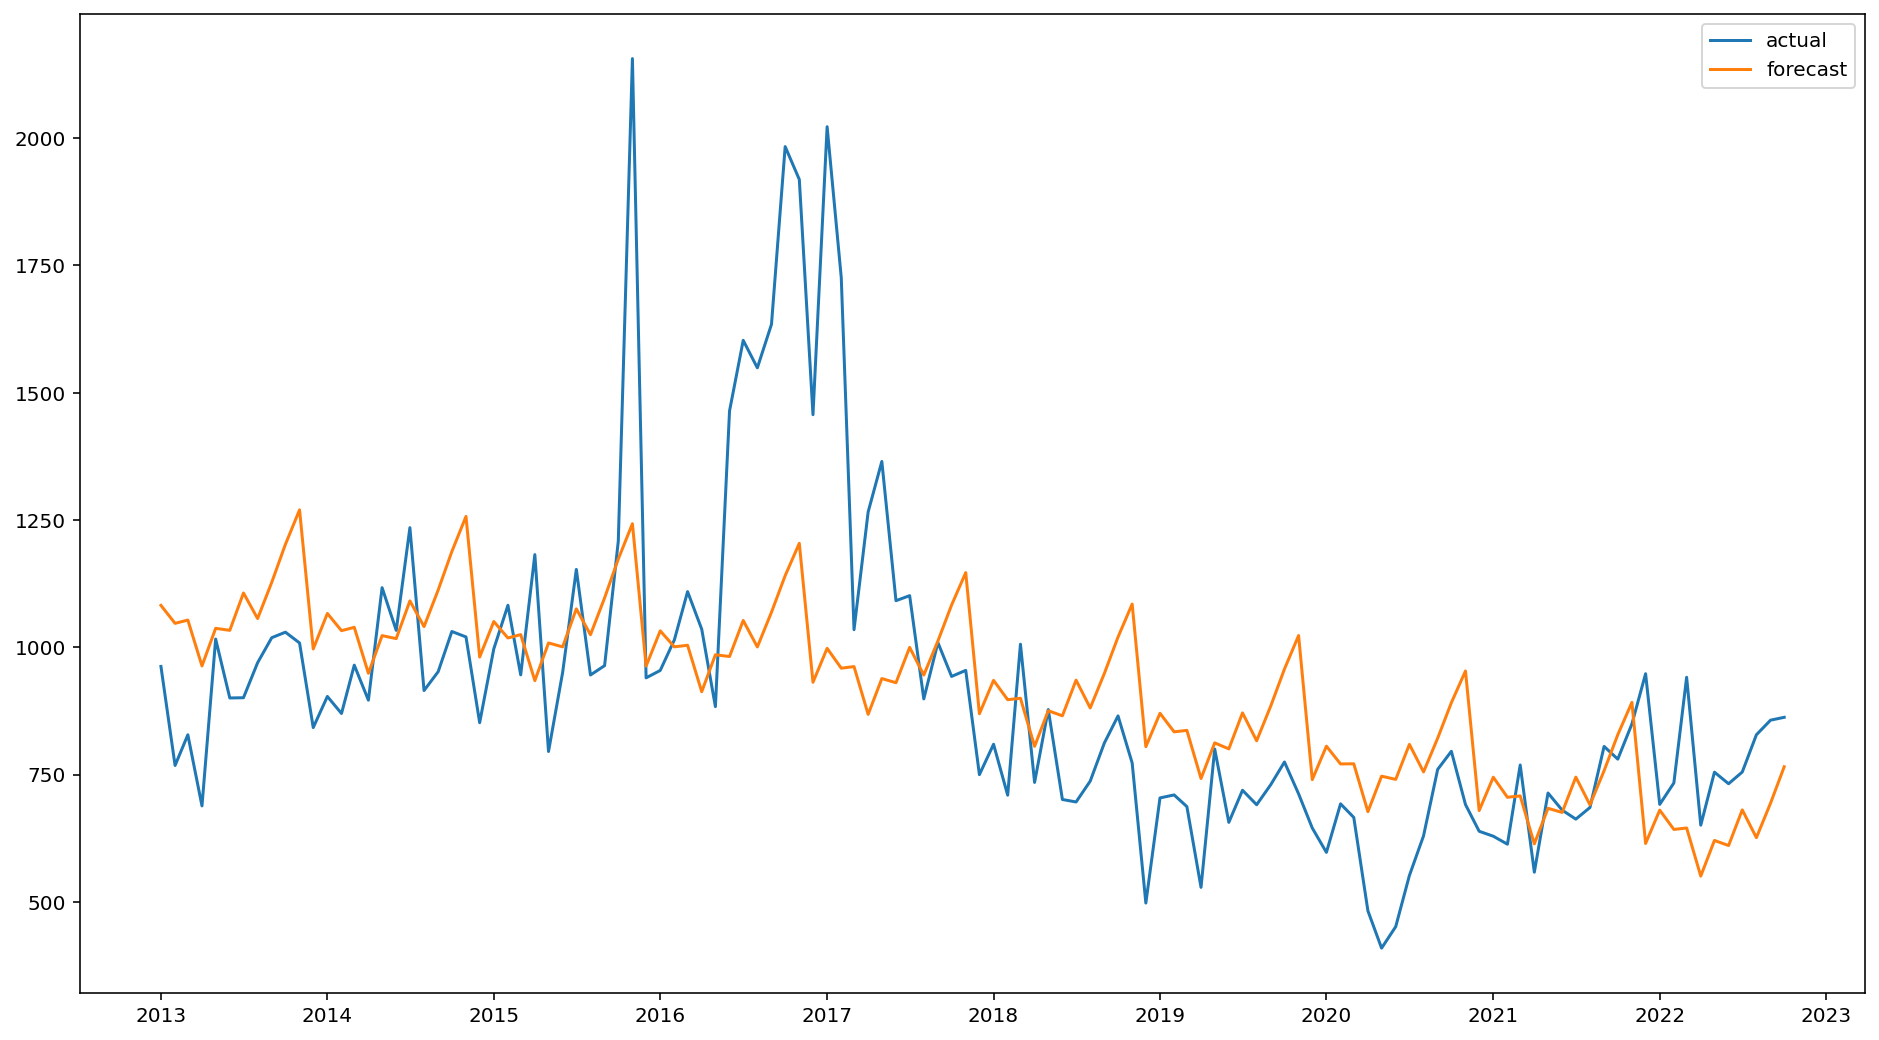

In [24]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [25]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.3209890124383935

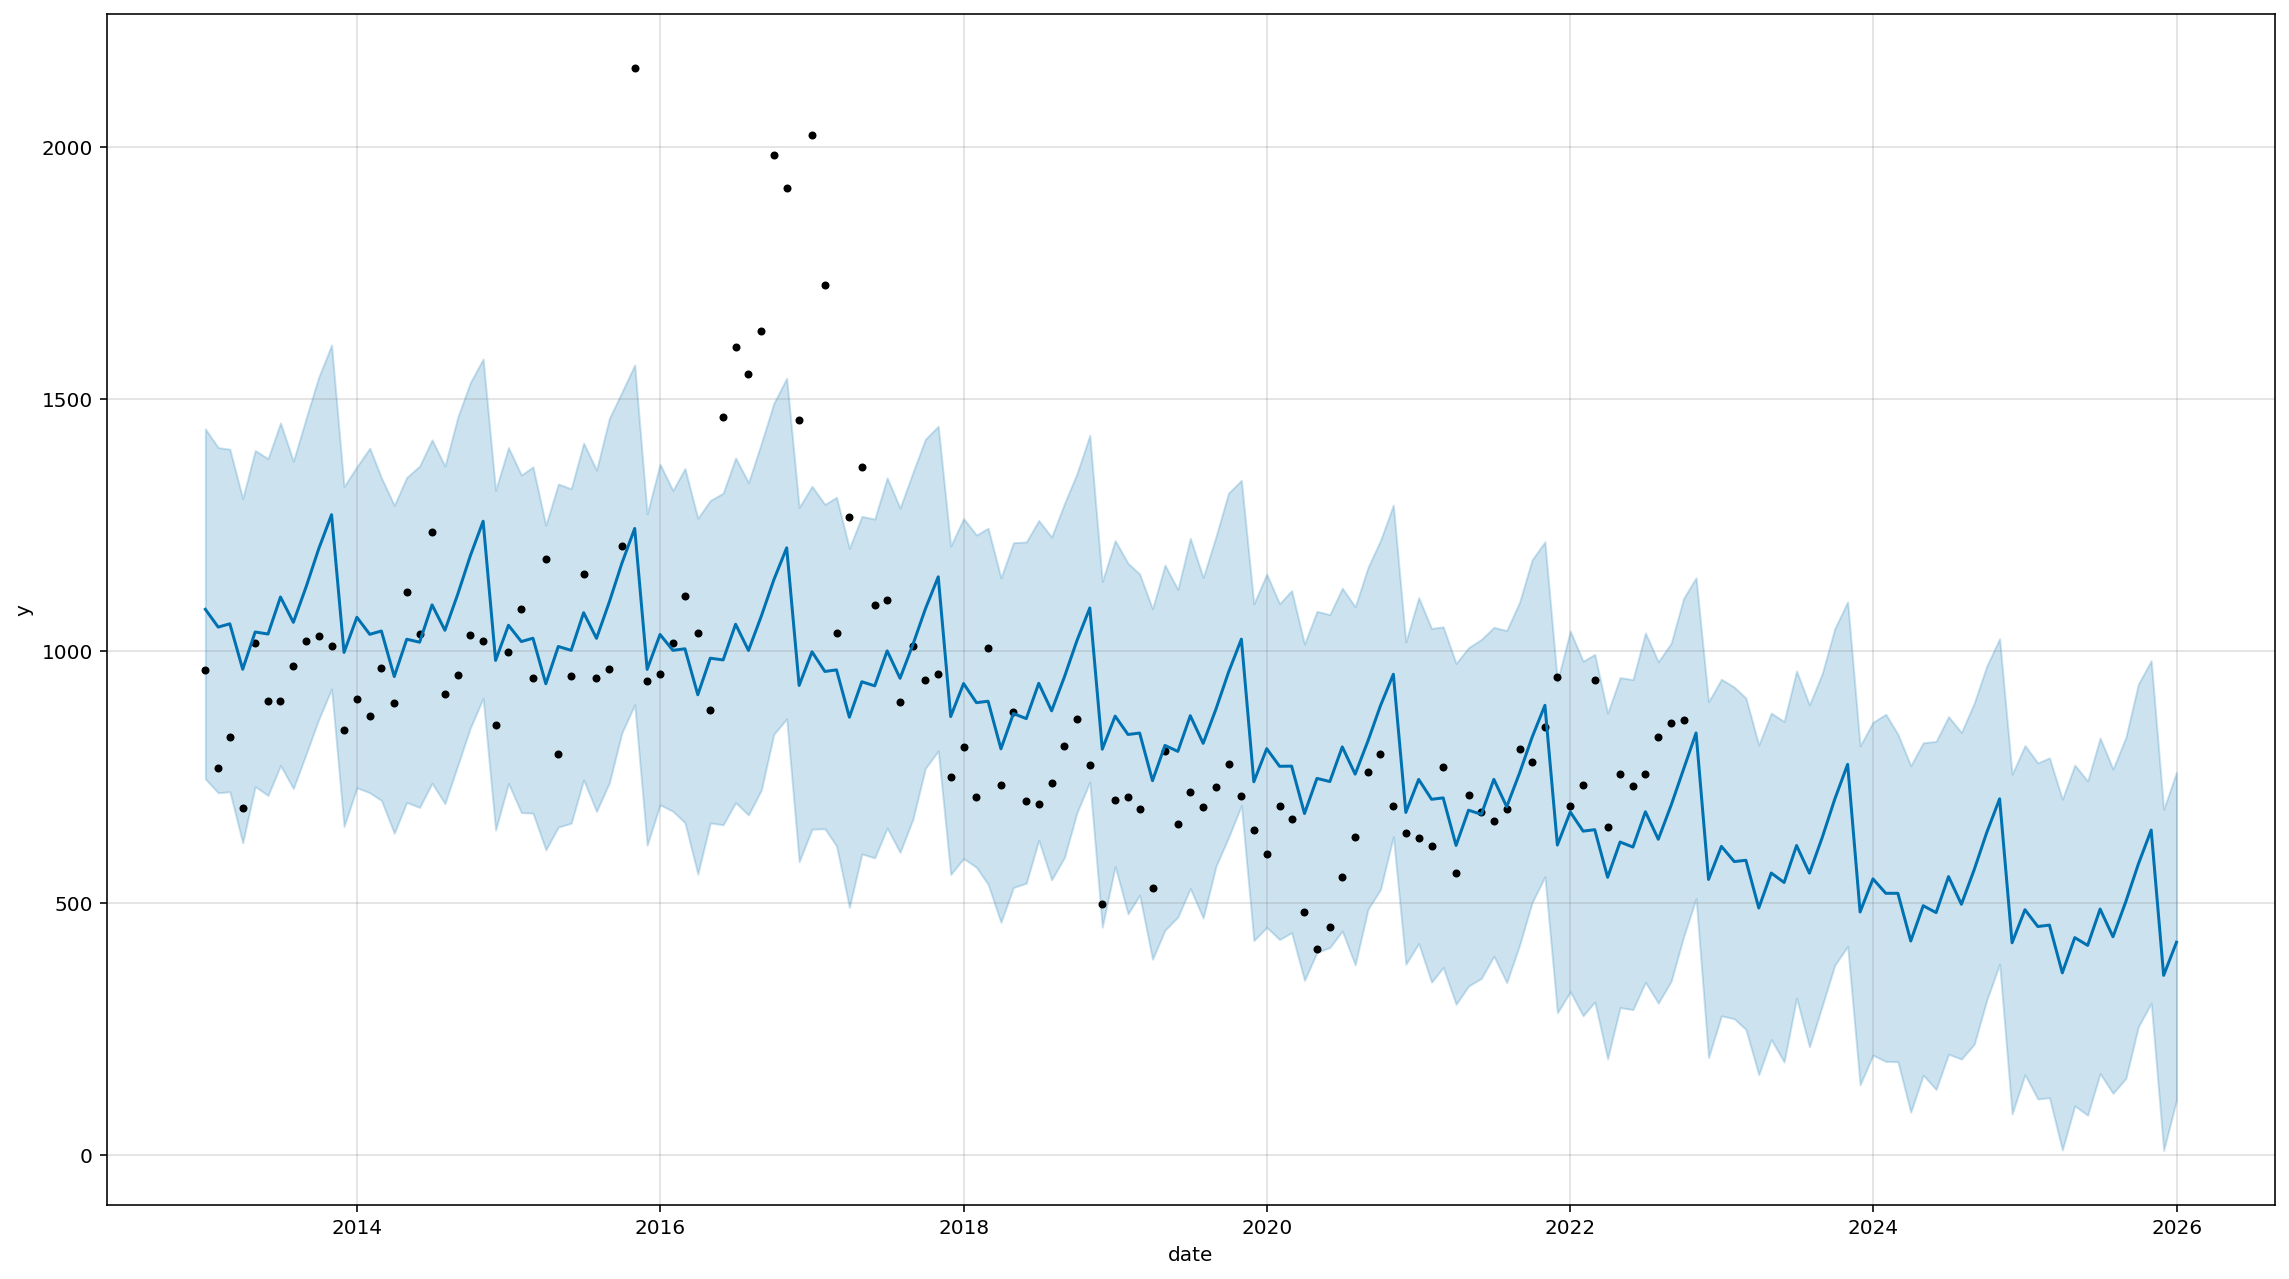

In [26]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

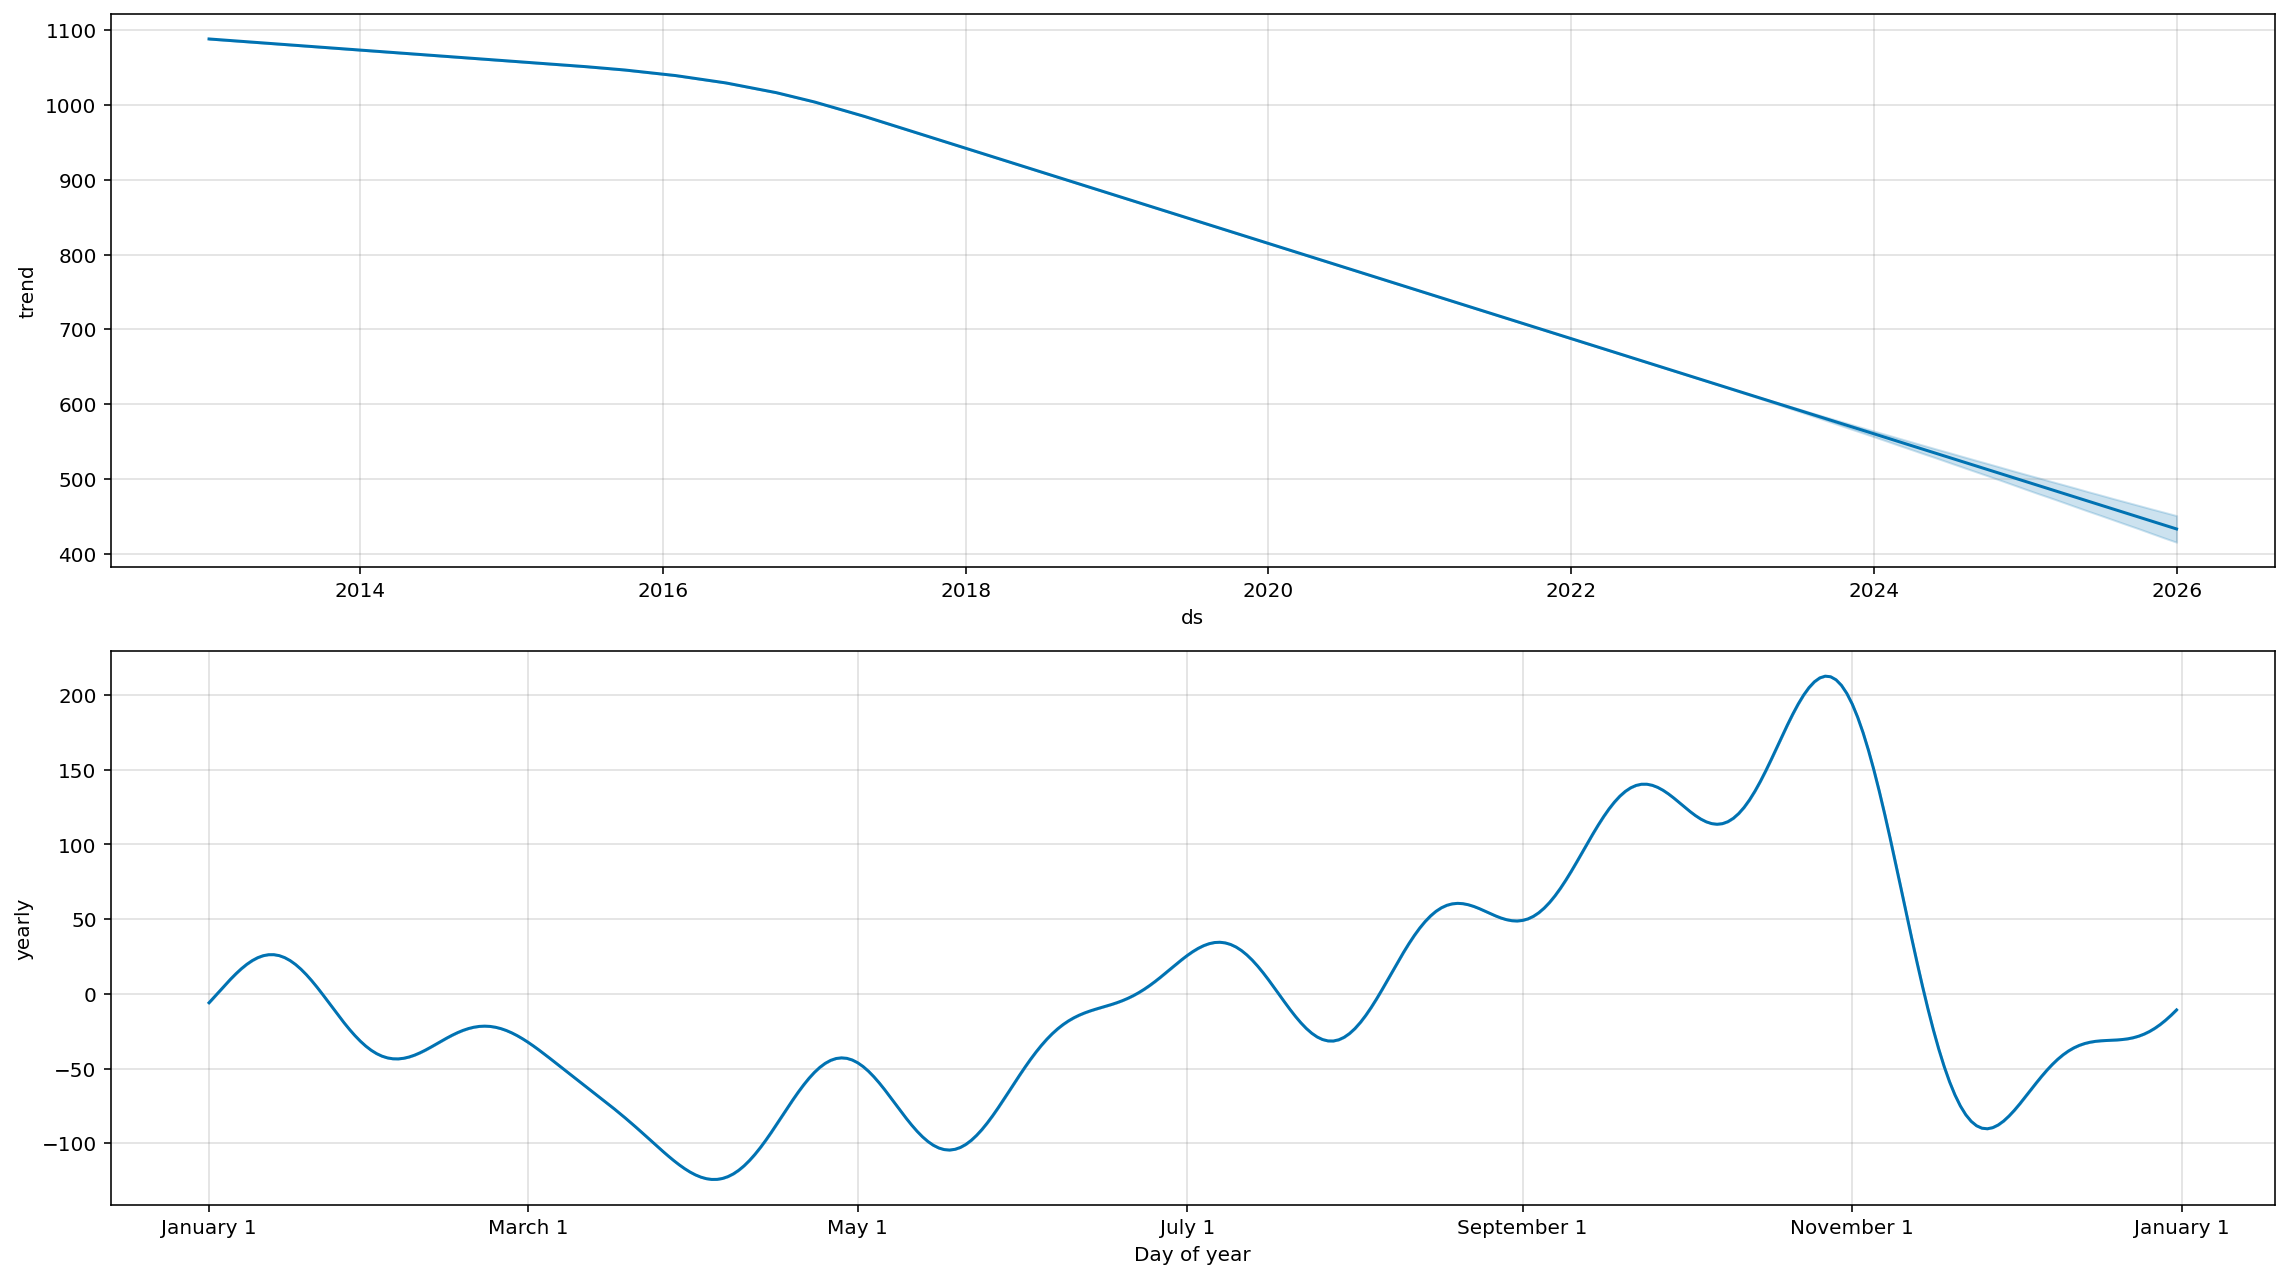

In [27]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [29]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

67801.2510042581

In [30]:
RMSE = math.sqrt(mse)
RMSE

260.38673354120425

In [31]:
mean_absolute_error(s['y'].values,s['yhat'].values)

183.66161785482856

# Singapore

In [ ]:
data = pd.read_csv('export data singapore.csv')
data.head()

ปี  เดือน มูลค่า(ล้านบาท)
0  2013      1          170.84
1  2013      2          170.94
2  2013      3          204.87
3  2013      4        2,654.95
4  2013      5        2,291.04

In [ ]:
data['วัน']= 1

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี มูลค่า(ล้านบาท)
0    1      1  2013          170.84
1    1      2  2013          170.94
2    1      3  2013          204.87
3    1      4  2013        2,654.95
4    1      5  2013        2,291.04

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year value(MBAHT)
0    1      1  2013       170.84
1    1      2  2013       170.94
2    1      3  2013       204.87
3    1      4  2013     2,654.95
4    1      5  2013     2,291.04

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date value(MBAHT)
0 2013-01-01       170.84
1 2013-02-01       170.94
2 2013-03-01       204.87
3 2013-04-01     2,654.95
4 2013-05-01     2,291.04

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-12-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01        170.84
1 2013-02-01        170.94
2 2013-03-01        204.87
3 2013-04-01       2654.95
4 2013-05-01       2291.04

In [ ]:
t2.columns=['ds','y']
t2.head()

ds        y
0 2013-01-01   170.84
1 2013-02-01   170.94
2 2013-03-01   204.87
3 2013-04-01  2654.95
4 2013-05-01  2291.04

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds        trend   yhat_lower    yhat_upper  trend_lower  \
0   2013-01-01   821.580338 -5199.331622   6766.582258   821.580338   
1   2013-02-01   872.389091 -2201.037284   9566.029121   872.389091   
2   2013-03-01   918.280868 -4551.770681   7127.025984   918.280868   
3   2013-04-01   969.089620 -4173.241869   7238.599885   969.089620   
4   2013-05-01  1018.259381 -4774.904132   6936.019808  1018.259381   
..         ...          ...          ...           ...          ...   
152 2025-08-31  8403.238782  1566.211315  12790.691003  8403.182686   
153 2025-09-30  8452.422693  1537.590209  13340.098449  8452.364143   
154 2025-10-31  8503.246067   992.616321  13098.756900  8503.184855   
155 2025-11-30  8552.429978  1304.597519  13191.701891  8552.365948   
156 2025-12-31  8603.253352  2415.084531  14563.807341  8603.187135   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     821.580338       21.379525             21.379525             21.379525   
1     872.389091     2275.728218           2275.728218           2275.728218   
2     918.280868      275.764633            275.764633            275.764633   
3     969.089620      658.111489            658.111489            658.111489   
4    1018.259381        8.673477              8.673477              8.673477   
..           ...             ...                   ...                   ...   
152  8403.297007    -1072.683902          -1072.683902          -1072.683902   
153  8452.483620    -1168.068622          -1168.068622          -1168.068622   
154  8503.308761    -1672.714512          -1672.714512          -1672.714512   
155  8552.494398    -1508.309746          -1508.309746          -1508.309746   
156  8603.320500      109.551666            109.551666            109.551666   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0      21.379525     21.379525     21.379525                   0.0   
1    2275.728218   2275.728218   2275.728218                   0.0   
2     275.764633    275.764633    275.764633                   0.0   
3     658.111489    658.111489    658.111489                   0.0   
4       8.673477      8.673477      8.673477                   0.0   
..           ...           ...           ...                   ...   
152 -1072.683902  -1072.683902  -1072.683902                   0.0   
153 -1168.068622  -1168.068622  -1168.068622                   0.0   
154 -1672.714512  -1672.714512  -1672.714512                   0.0   
155 -1508.309746  -1508.309746  -1508.309746                   0.0   
156   109.551666    109.551666    109.551666                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0   842.959863  
1                           0.0                         0.0  3148.117309  
2                           0.0                         0.0  1194.045501  
3                           0.0                         0.0  1627.201110  
4                           0.0                         0.0  1026.932858  
..                          ...                         ...          ...  
152                         0.0                         0.0  7330.554880  
153                         0.0                         0.0  7284.354071  
154                         0.0                         0.0  6830.531555  
155                         0.0                         0.0  7044.120232  
156                         0.0                         0.0  8712.805018  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds         yhat   yhat_lower    yhat_upper
0   2013-01-01   842.959863 -5199.331622   6766.582258
1   2013-02-01  3148.117309 -2201.037284   9566.029121
2   2013-03-01  1194.045501 -4551.770681   7127.025984
3   2013-04-01  1627.201110 -4173.241869   7238.599885
4   2013-05-01  1026.932858 -4774.904132   6936.019808
..         ...          ...          ...           ...
152 2025-08-31  7330.554880  1566.211315  12790.691003
153 2025-09-30  7284.354071  1537.590209  13340.098449
154 2025-10-31  6830.531555   992.616321  13098.756900
155 2025-11-30  7044.120232  1304.597519  13191.701891
156 2025-12-31  8712.805018  2415.084531  14563.807341

[157 rows x 4 columns]

In [ ]:
t2.head()

ds        y
0 2013-01-01   170.84
1 2013-02-01   170.94
2 2013-03-01   204.87
3 2013-04-01  2654.95
4 2013-05-01  2291.04

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds        y         yhat   yhat_lower   yhat_upper
0 2013-01-01   170.84   842.959863 -5199.331622  6766.582258
1 2013-02-01   170.94  3148.117309 -2201.037284  9566.029121
2 2013-03-01   204.87  1194.045501 -4551.770681  7127.025984
3 2013-04-01  2654.95  1627.201110 -4173.241869  7238.599885
4 2013-05-01  2291.04  1026.932858 -4774.904132  6936.019808

In [ ]:
s.describe()

y         yhat   yhat_lower    yhat_upper
count    118.000000   118.000000   118.000000    118.000000
mean    3776.875339  3761.113420 -2107.749070   9629.966364
std     5014.640698  2001.476802  2024.215100   1977.375666
min      170.840000  -336.985733 -6275.192572   5707.803787
25%      707.070000  2212.369870 -3772.609172   8064.086100
50%     1965.170000  3753.373122 -2030.610463   9681.086803
75%     4817.182500  5204.829159  -619.637687  11085.764487
max    26608.880000  8541.581839  3039.832002  14125.697805

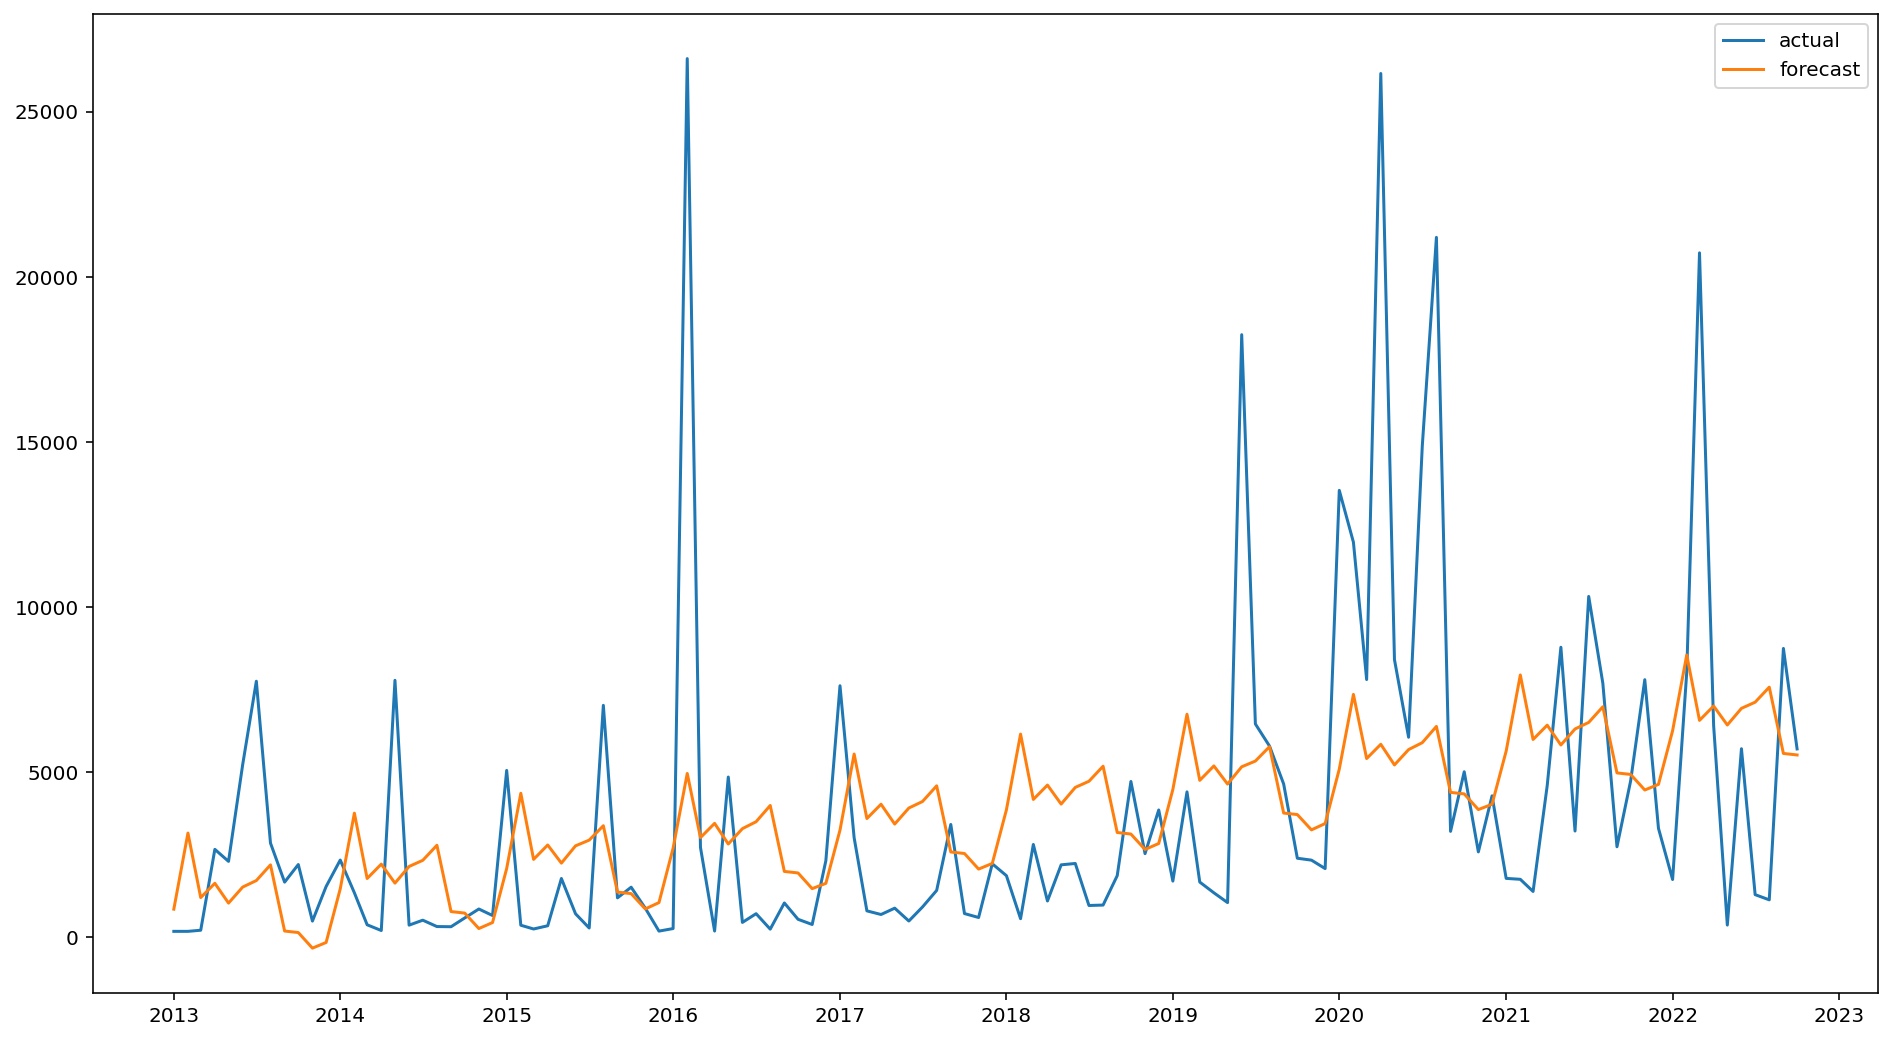

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.17255478567449023

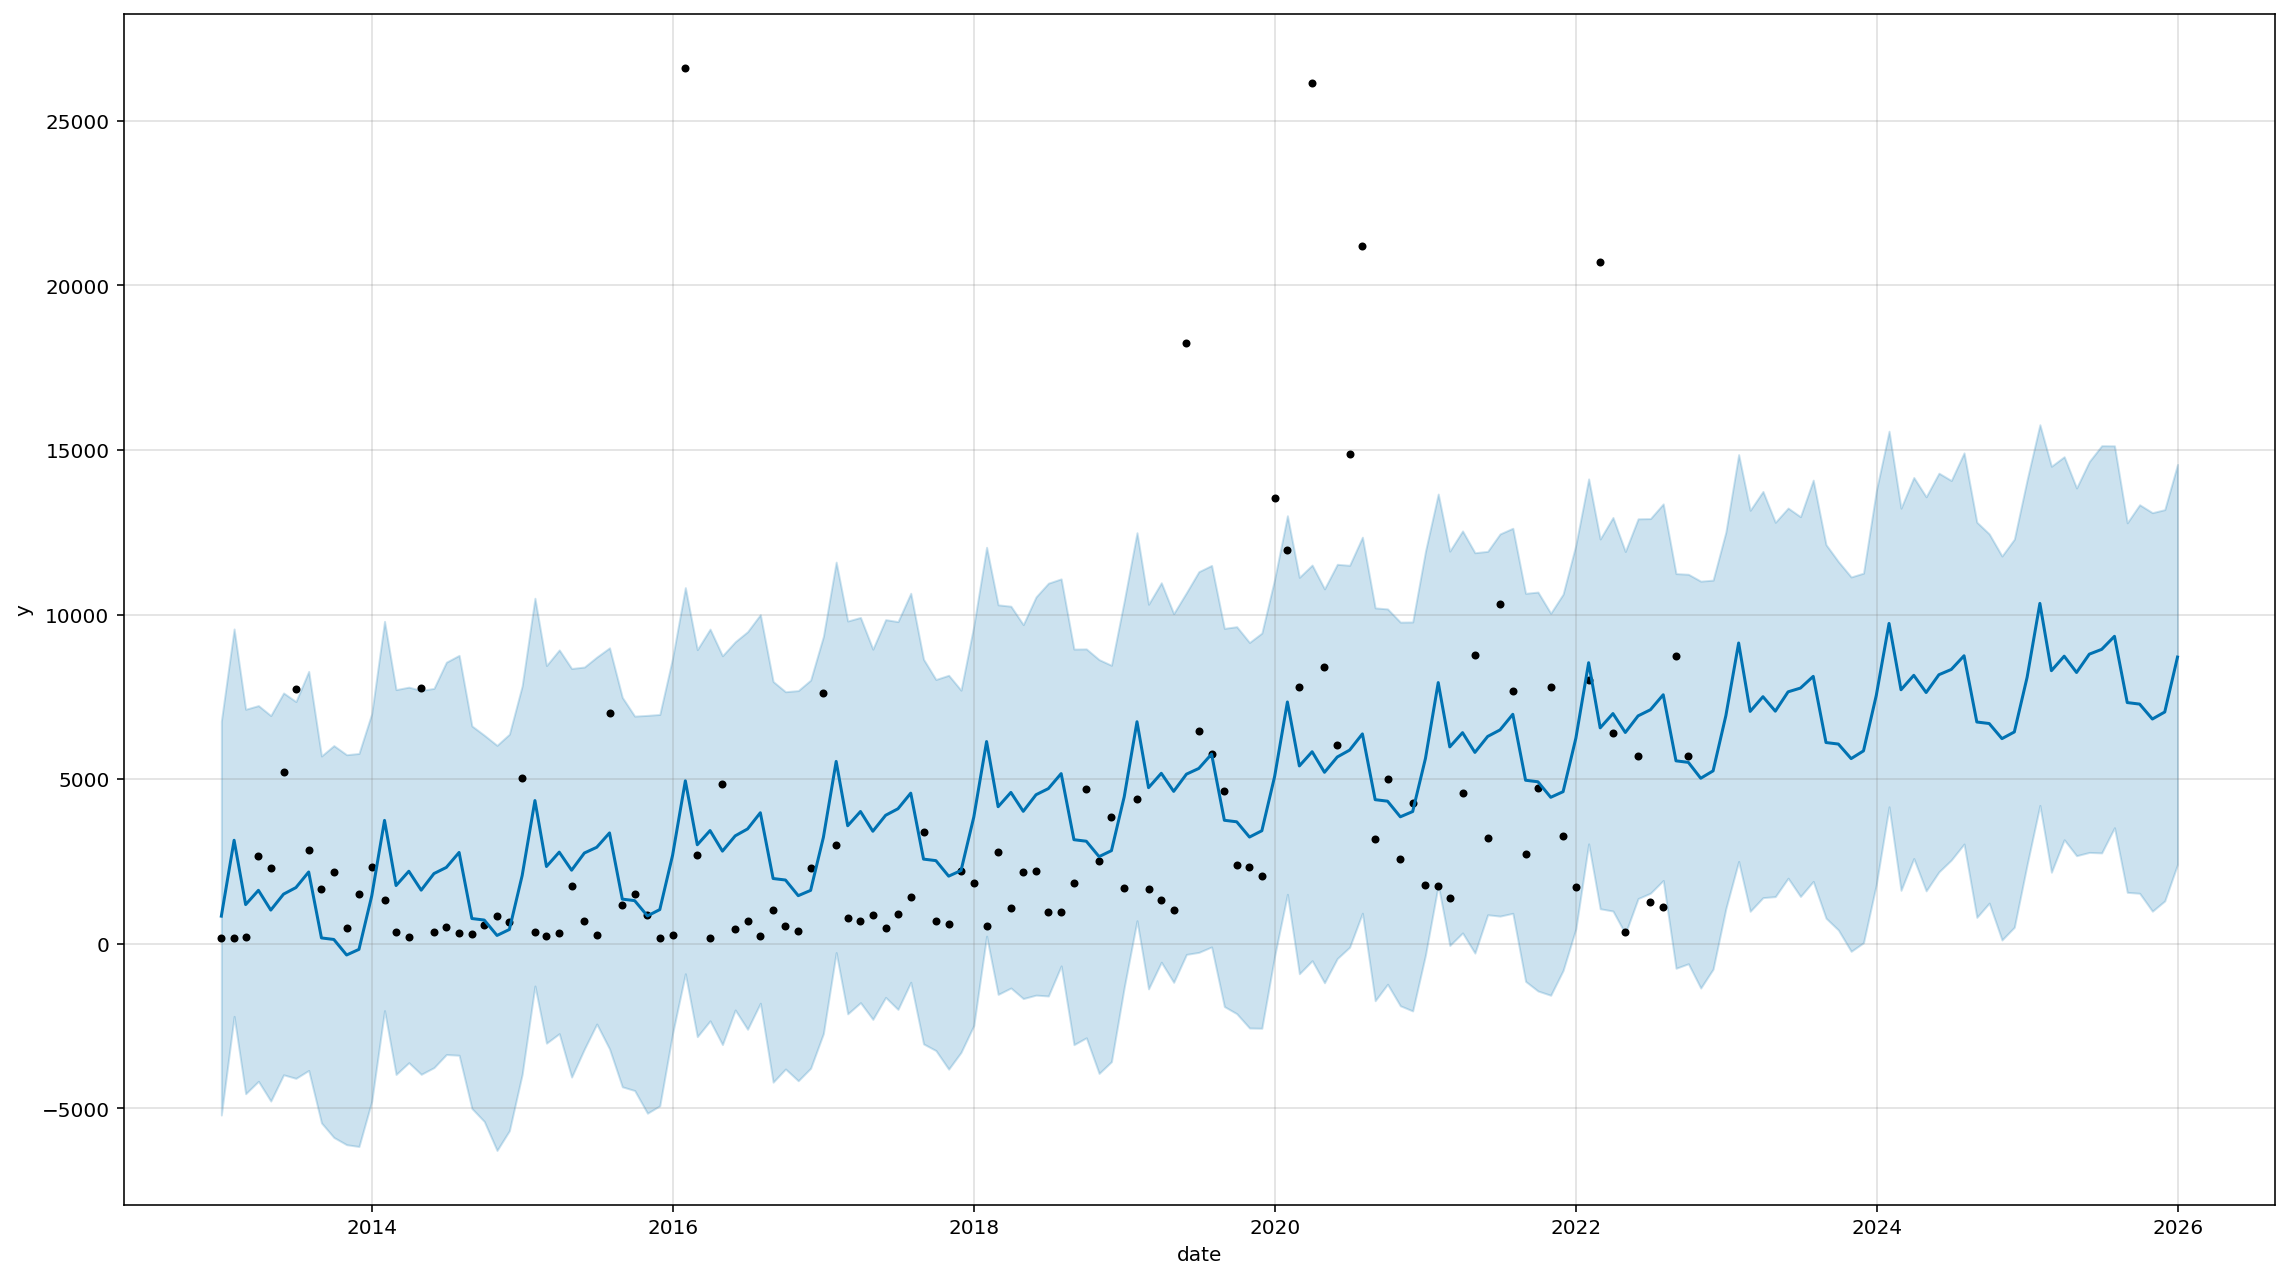

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

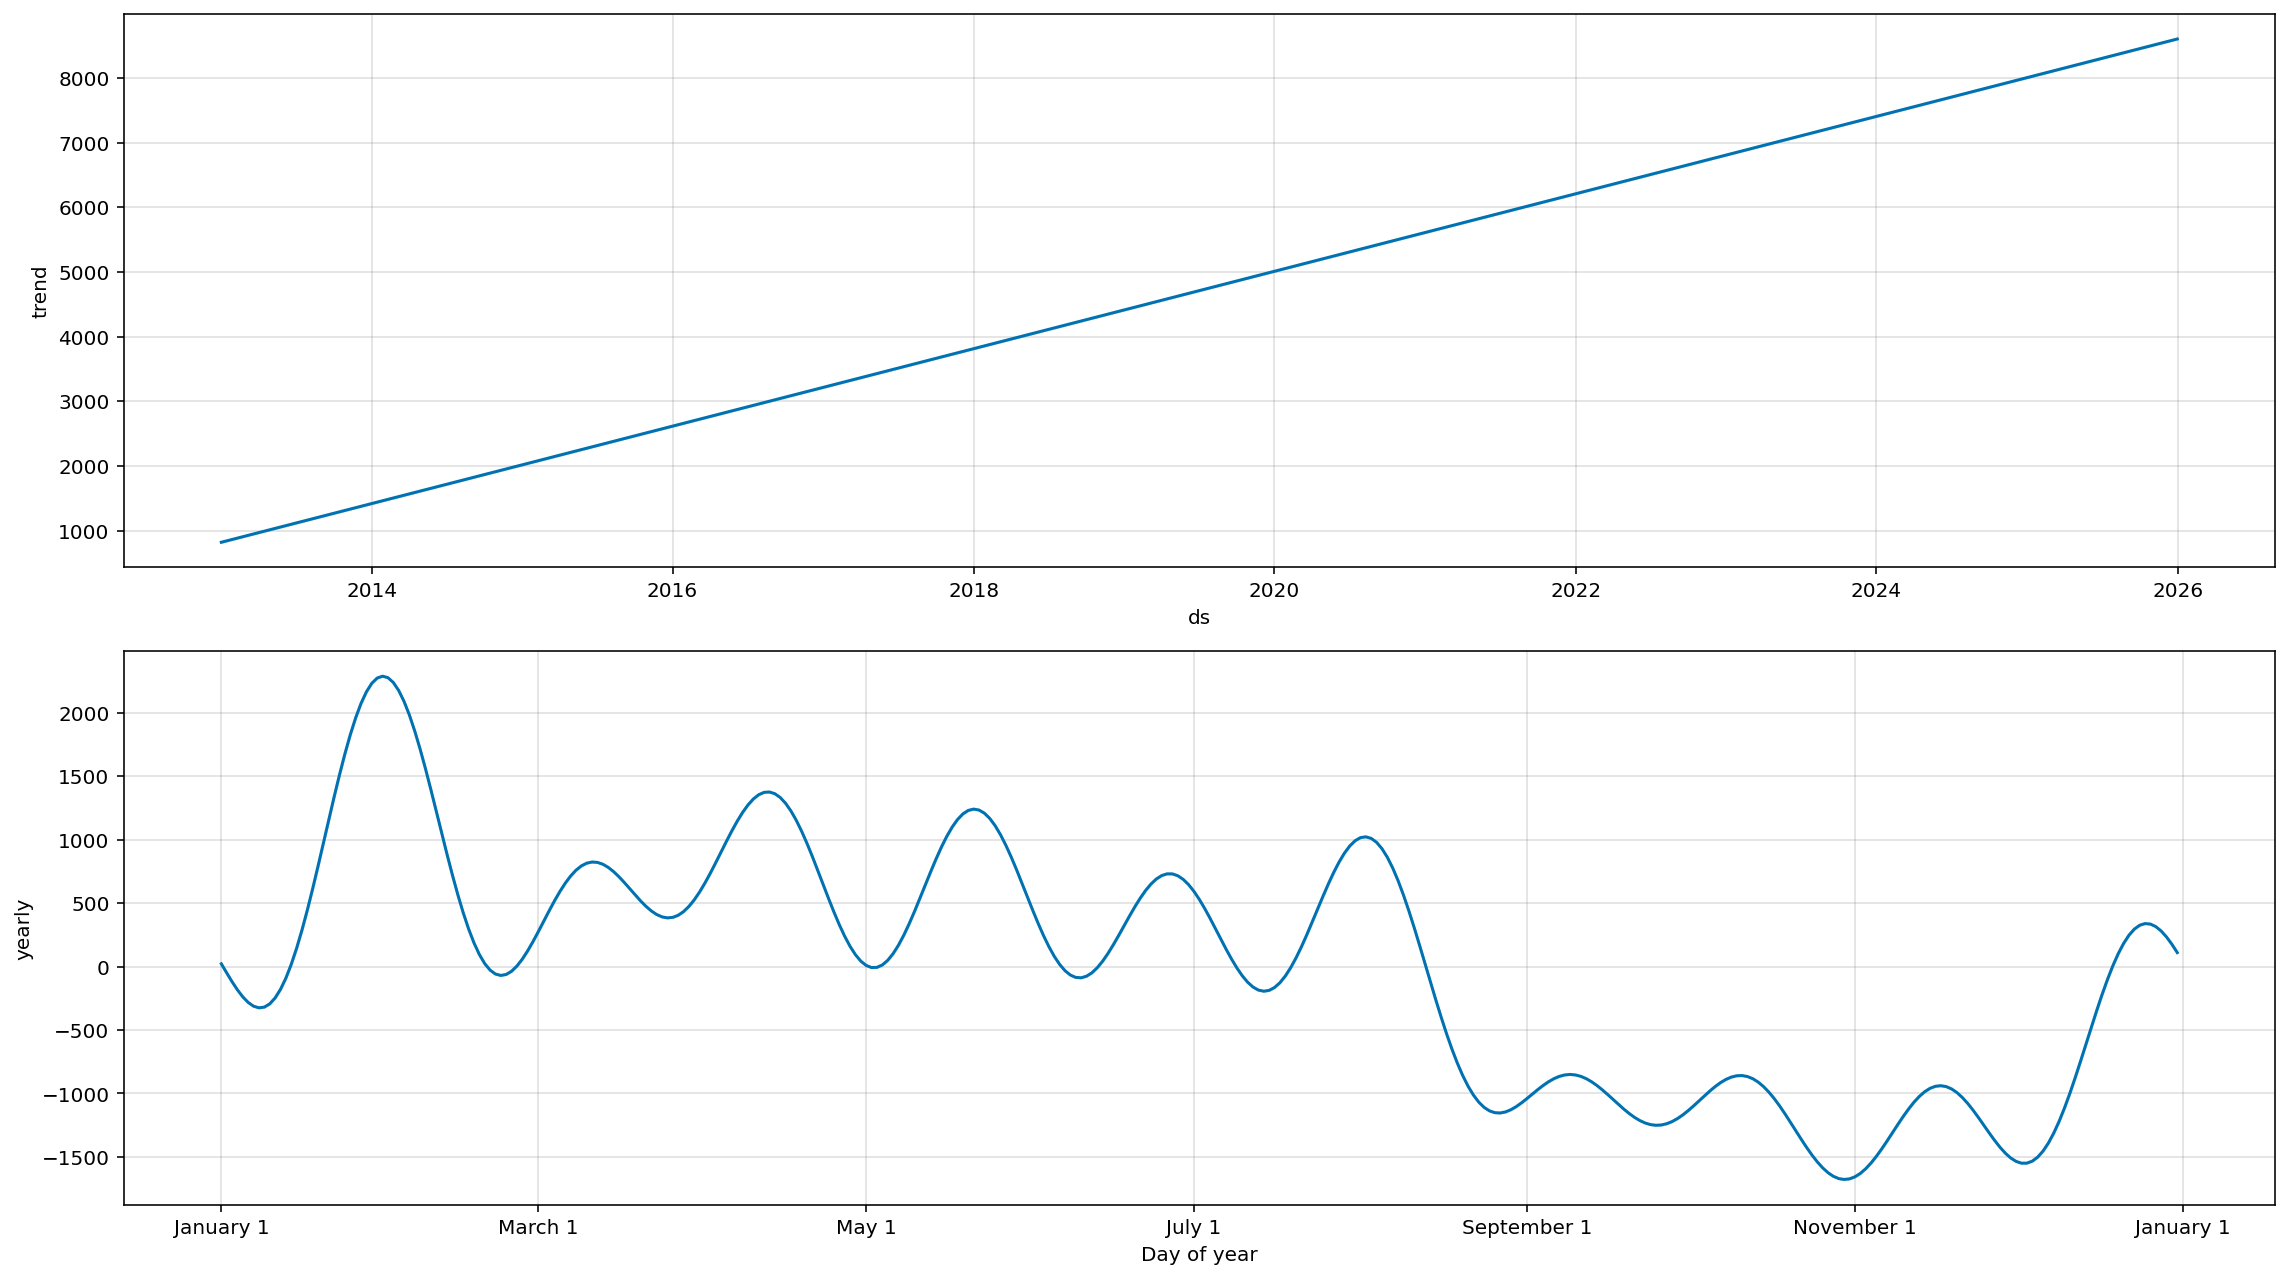

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

20631117.14069249

In [ ]:
RMSE = math.sqrt(mse)
RMSE

4542.148956242242

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

2918.4135574164025

# Australia

In [ ]:
data = pd.read_csv('export data australia.csv')
data.head()

ปี  เดือน มูลค่า(ล้านบาท)
0  2013      1          324.88
1  2013      2          302.52
2  2013      3          402.28
3  2013      4           316.2
4  2013      5          360.46

In [ ]:
data['วัน']= 1

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี มูลค่า(ล้านบาท)
0    1      1  2013          324.88
1    1      2  2013          302.52
2    1      3  2013          402.28
3    1      4  2013           316.2
4    1      5  2013          360.46

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year value(MBAHT)
0    1      1  2013       324.88
1    1      2  2013       302.52
2    1      3  2013       402.28
3    1      4  2013        316.2
4    1      5  2013       360.46

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date value(MBAHT)
0 2013-01-01       324.88
1 2013-02-01       302.52
2 2013-03-01       402.28
3 2013-04-01        316.2
4 2013-05-01       360.46

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-37-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01        324.88
1 2013-02-01        302.52
2 2013-03-01        402.28
3 2013-04-01        316.20
4 2013-05-01        360.46

In [ ]:
t2.columns=['ds','y']
t2.head()

ds       y
0 2013-01-01  324.88
1 2013-02-01  302.52
2 2013-03-01  402.28
3 2013-04-01  316.20
4 2013-05-01  360.46

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2013-01-01   848.602360 -2338.614118  2728.134596   848.602360   
1   2013-02-01   857.770377 -1619.473612  3127.535460   857.770377   
2   2013-03-01   866.051167 -1405.248579  3602.704272   866.051167   
3   2013-04-01   875.219184 -2174.835867  2630.318483   875.219184   
4   2013-05-01   884.091459 -1025.153952  3920.848480   884.091459   
..         ...          ...          ...          ...          ...   
152 2025-08-31  2223.458172  -593.531093  4649.214782  2223.294763   
153 2025-09-30  2232.377387  -729.238439  3921.175916  2232.205298   
154 2025-10-31  2241.593909  -759.034547  4069.705164  2241.413958   
155 2025-11-30  2250.513124  -697.020463  4098.616189  2250.327352   
156 2025-12-31  2259.729645  -796.444436  3880.526375  2259.535087   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     848.602360     -711.875656           -711.875656           -711.875656   
1     857.770377     -151.756911           -151.756911           -151.756911   
2     866.051167      355.635719            355.635719            355.635719   
3     875.219184     -588.890517           -588.890517           -588.890517   
4     884.091459      576.655637            576.655637            576.655637   
..           ...             ...                   ...                   ...   
152  2223.635850     -314.513384           -314.513384           -314.513384   
153  2232.563292     -535.672679           -535.672679           -535.672679   
154  2241.786739     -550.134361           -550.134361           -550.134361   
155  2250.713590     -656.134940           -656.134940           -656.134940   
156  2259.938328     -685.375588           -685.375588           -685.375588   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   -711.875656   -711.875656   -711.875656                   0.0   
1   -151.756911   -151.756911   -151.756911                   0.0   
2    355.635719    355.635719    355.635719                   0.0   
3   -588.890517   -588.890517   -588.890517                   0.0   
4    576.655637    576.655637    576.655637                   0.0   
..          ...           ...           ...                   ...   
152 -314.513384   -314.513384   -314.513384                   0.0   
153 -535.672679   -535.672679   -535.672679                   0.0   
154 -550.134361   -550.134361   -550.134361                   0.0   
155 -656.134940   -656.134940   -656.134940                   0.0   
156 -685.375588   -685.375588   -685.375588                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0   136.726704  
1                           0.0                         0.0   706.013466  
2                           0.0                         0.0  1221.686886  
3                           0.0                         0.0   286.328667  
4                           0.0                         0.0  1460.747096  
..                          ...                         ...          ...  
152                         0.0                         0.0  1908.944788  
153                         0.0                         0.0  1696.704708  
154                         0.0                         0.0  1691.459548  
155                         0.0                         0.0  1594.378184  
156                         0.0                         0.0  1574.354057  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds         yhat   yhat_lower   yhat_upper
0   2013-01-01   136.726704 -2338.614118  2728.134596
1   2013-02-01   706.013466 -1619.473612  3127.535460
2   2013-03-01  1221.686886 -1405.248579  3602.704272
3   2013-04-01   286.328667 -2174.835867  2630.318483
4   2013-05-01  1460.747096 -1025.153952  3920.848480
..         ...          ...          ...          ...
152 2025-08-31  1908.944788  -593.531093  4649.214782
153 2025-09-30  1696.704708  -729.238439  3921.175916
154 2025-10-31  1691.459548  -759.034547  4069.705164
155 2025-11-30  1594.378184  -697.020463  4098.616189
156 2025-12-31  1574.354057  -796.444436  3880.526375

[157 rows x 4 columns]

In [ ]:
t2.head()

ds       y
0 2013-01-01  324.88
1 2013-02-01  302.52
2 2013-03-01  402.28
3 2013-04-01  316.20
4 2013-05-01  360.46

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds       y         yhat   yhat_lower   yhat_upper
0 2013-01-01  324.88   136.726704 -2338.614118  2728.134596
1 2013-02-01  302.52   706.013466 -1619.473612  3127.535460
2 2013-03-01  402.28  1221.686886 -1405.248579  3602.704272
3 2013-04-01  316.20   286.328667 -2174.835867  2630.318483
4 2013-05-01  360.46  1460.747096 -1025.153952  3920.848480

In [ ]:
s.describe()

y         yhat   yhat_lower   yhat_upper
count    118.000000   118.000000   118.000000   118.000000
mean    1390.764661  1380.747606 -1070.247983  3813.670090
std     2082.648319   805.433802   824.041932   818.826914
min      211.180000   136.726704 -2338.614118  2586.140964
25%      422.992500   811.739729 -1634.825741  3245.651430
50%      645.390000  1168.617696 -1242.804564  3603.967621
75%     1379.350000  1783.197853  -657.720025  4292.896583
max    13261.470000  3687.411897  1300.001854  6111.644630

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.1618156939643841

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

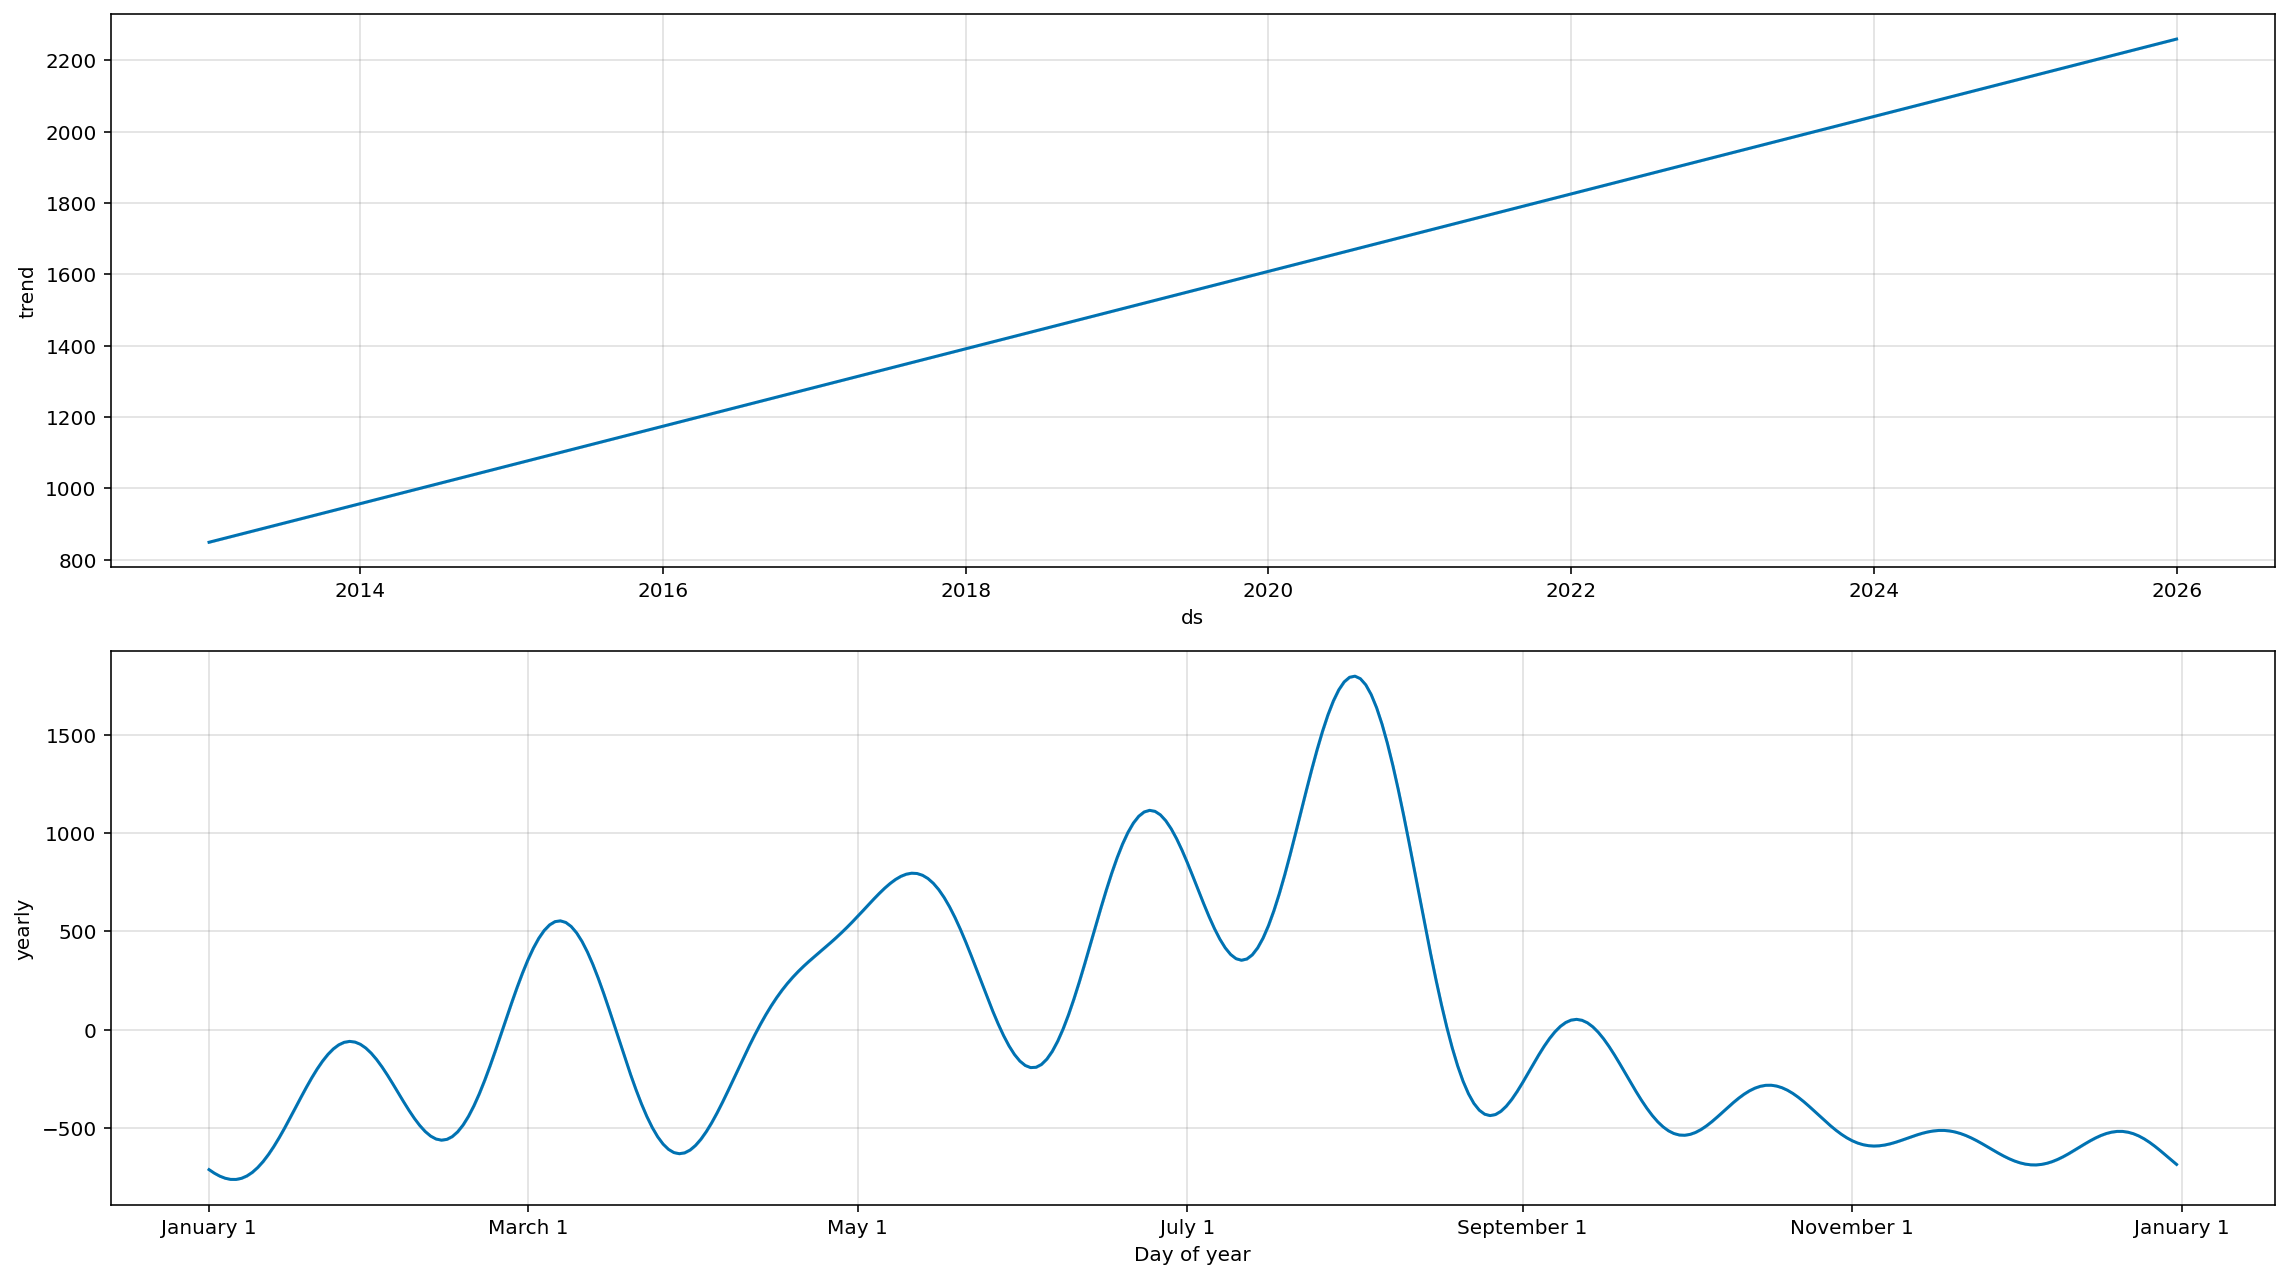

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

3604750.90533329

In [ ]:
RMSE = math.sqrt(mse)
RMSE

1898.6181568007007

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

1098.7379605505885

# Hongkong

In [ ]:
data = pd.read_csv('export data hk.csv')
data.head()

ปี  เดือน มูลค่า(ล้านบาท)
0  2013      1        1,706.47
1  2013      2        1,856.90
2  2013      3       12,151.71
3  2013      4        2,531.55
4  2013      5        2,968.50

In [ ]:
data['วัน']= 1

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี มูลค่า(ล้านบาท)
0    1      1  2013        1,706.47
1    1      2  2013        1,856.90
2    1      3  2013       12,151.71
3    1      4  2013        2,531.55
4    1      5  2013        2,968.50

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year value(MBAHT)
0    1      1  2013     1,706.47
1    1      2  2013     1,856.90
2    1      3  2013    12,151.71
3    1      4  2013     2,531.55
4    1      5  2013     2,968.50

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date value(MBAHT)
0 2013-01-01     1,706.47
1 2013-02-01     1,856.90
2 2013-03-01    12,151.71
3 2013-04-01     2,531.55
4 2013-05-01     2,968.50

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-12-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01       1706.47
1 2013-02-01       1856.90
2 2013-03-01      12151.71
3 2013-04-01       2531.55
4 2013-05-01       2968.50

In [ ]:
t2.columns=['ds','y']
t2.head()

ds         y
0 2013-01-01   1706.47
1 2013-02-01   1856.90
2 2013-03-01  12151.71
3 2013-04-01   2531.55
4 2013-05-01   2968.50

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds        trend   yhat_lower    yhat_upper  trend_lower  \
0   2013-01-01  7628.704268  -255.599102   8632.830689  7628.704268   
1   2013-02-01  7600.024867  7615.742632  16762.137238  7600.024867   
2   2013-03-01  7574.120892  3805.346711  12418.657355  7574.120892   
3   2013-04-01  7545.441490   938.332891   9798.265078  7545.441490   
4   2013-05-01  7517.687231   521.272817   9350.256415  7517.687231   
..         ...          ...          ...           ...          ...   
152 2025-08-31  3349.912810  7681.980797  16566.890890  3349.912336   
153 2025-09-30  3322.158470 -4106.512497   4640.994086  3322.157975   
154 2025-10-31  3293.478984 -2745.770683   5828.581821  3293.478471   
155 2025-11-30  3265.724643 -3792.792675   4779.003901  3265.724105   
156 2025-12-31  3237.045158 -3764.018622   4775.466887  3237.044599   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    7628.704268    -3315.284240          -3315.284240          -3315.284240   
1    7600.024867     4589.846631           4589.846631           4589.846631   
2    7574.120892      489.052338            489.052338            489.052338   
3    7545.441490    -2265.192971          -2265.192971          -2265.192971   
4    7517.687231    -2798.057670          -2798.057670          -2798.057670   
..           ...             ...                   ...                   ...   
152  3349.913290     8642.413227           8642.413227           8642.413227   
153  3322.158971    -2901.655184          -2901.655184          -2901.655184   
154  3293.479510    -1731.747019          -1731.747019          -1731.747019   
155  3265.725198    -2891.466470          -2891.466470          -2891.466470   
156  3237.045740    -3085.916218          -3085.916218          -3085.916218   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   -3315.284240  -3315.284240  -3315.284240                   0.0   
1    4589.846631   4589.846631   4589.846631                   0.0   
2     489.052338    489.052338    489.052338                   0.0   
3   -2265.192971  -2265.192971  -2265.192971                   0.0   
4   -2798.057670  -2798.057670  -2798.057670                   0.0   
..           ...           ...           ...                   ...   
152  8642.413227   8642.413227   8642.413227                   0.0   
153 -2901.655184  -2901.655184  -2901.655184                   0.0   
154 -1731.747019  -1731.747019  -1731.747019                   0.0   
155 -2891.466470  -2891.466470  -2891.466470                   0.0   
156 -3085.916218  -3085.916218  -3085.916218                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0   4313.420029  
1                           0.0                         0.0  12189.871498  
2                           0.0                         0.0   8063.173230  
3                           0.0                         0.0   5280.248519  
4                           0.0                         0.0   4719.629561  
..                          ...                         ...           ...  
152                         0.0                         0.0  11992.326037  
153                         0.0                         0.0    420.503286  
154                         0.0                         0.0   1561.731965  
155                         0.0                         0.0    374.258174  
156                         0.0                         0.0    151.128940  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds          yhat   yhat_lower    yhat_upper
0   2013-01-01   4313.420029  -255.599102   8632.830689
1   2013-02-01  12189.871498  7615.742632  16762.137238
2   2013-03-01   8063.173230  3805.346711  12418.657355
3   2013-04-01   5280.248519   938.332891   9798.265078
4   2013-05-01   4719.629561   521.272817   9350.256415
..         ...           ...          ...           ...
152 2025-08-31  11992.326037  7681.980797  16566.890890
153 2025-09-30    420.503286 -4106.512497   4640.994086
154 2025-10-31   1561.731965 -2745.770683   5828.581821
155 2025-11-30    374.258174 -3792.792675   4779.003901
156 2025-12-31    151.128940 -3764.018622   4775.466887

[157 rows x 4 columns]

In [ ]:
t2.head()

ds         y
0 2013-01-01   1706.47
1 2013-02-01   1856.90
2 2013-03-01  12151.71
3 2013-04-01   2531.55
4 2013-05-01   2968.50

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds         y          yhat   yhat_lower    yhat_upper
0 2013-01-01   1706.47   4313.420029  -255.599102   8632.830689
1 2013-02-01   1856.90  12189.871498  7615.742632  16762.137238
2 2013-03-01  12151.71   8063.173230  3805.346711  12418.657355
3 2013-04-01   2531.55   5280.248519   938.332891   9798.265078
4 2013-05-01   2968.50   4719.629561   521.272817   9350.256415

In [ ]:
s.describe()

y          yhat    yhat_lower    yhat_upper
count    118.000000    118.000000    118.000000    118.000000
mean    5893.375169   5904.142022   1545.867103  10242.499874
std     5170.503798   3713.358945   3727.848006   3734.174692
min      983.300000   1310.989312  -3056.076607   5613.796051
25%     2645.062500   3238.665110  -1033.253188   7481.482286
50%     3858.150000   4445.870398    114.591043   8827.832495
75%     5929.257500   7970.277550   3613.708574  12302.788327
max    23259.560000  15833.164748  11544.131373  20348.906083

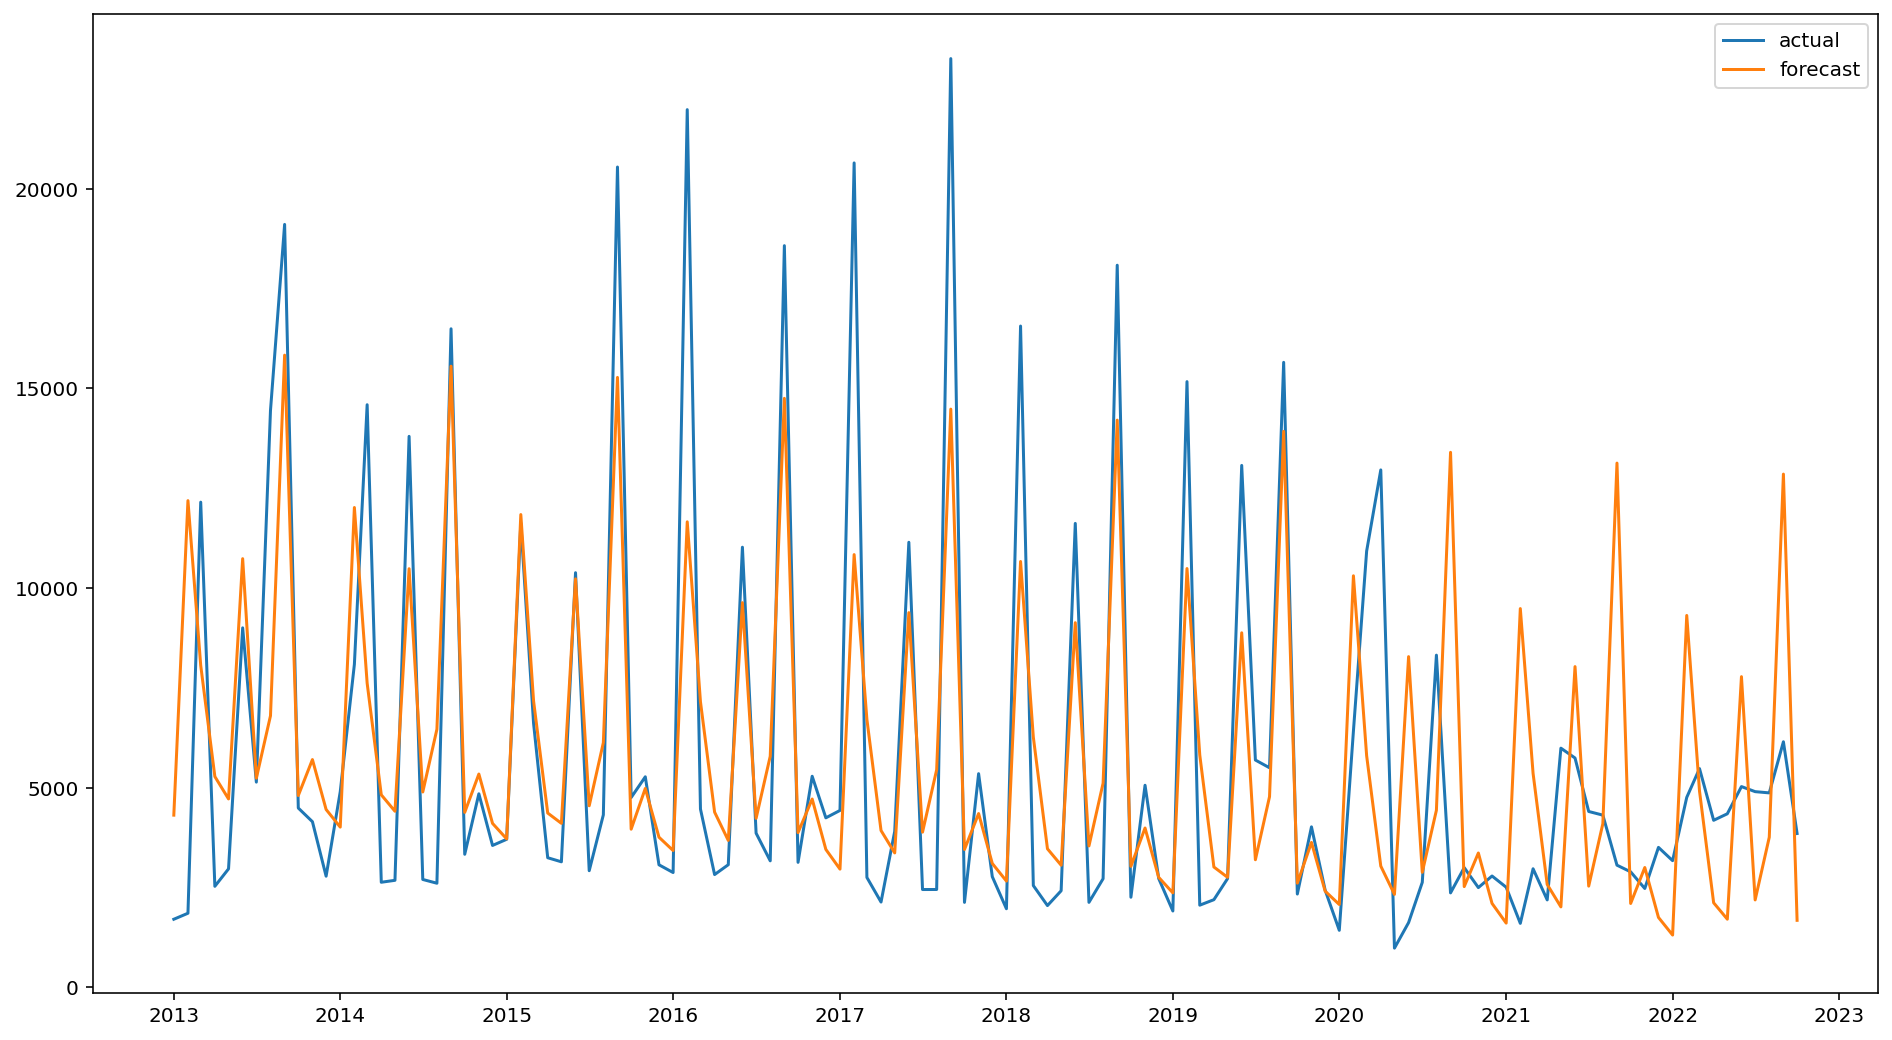

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.5246286089331074

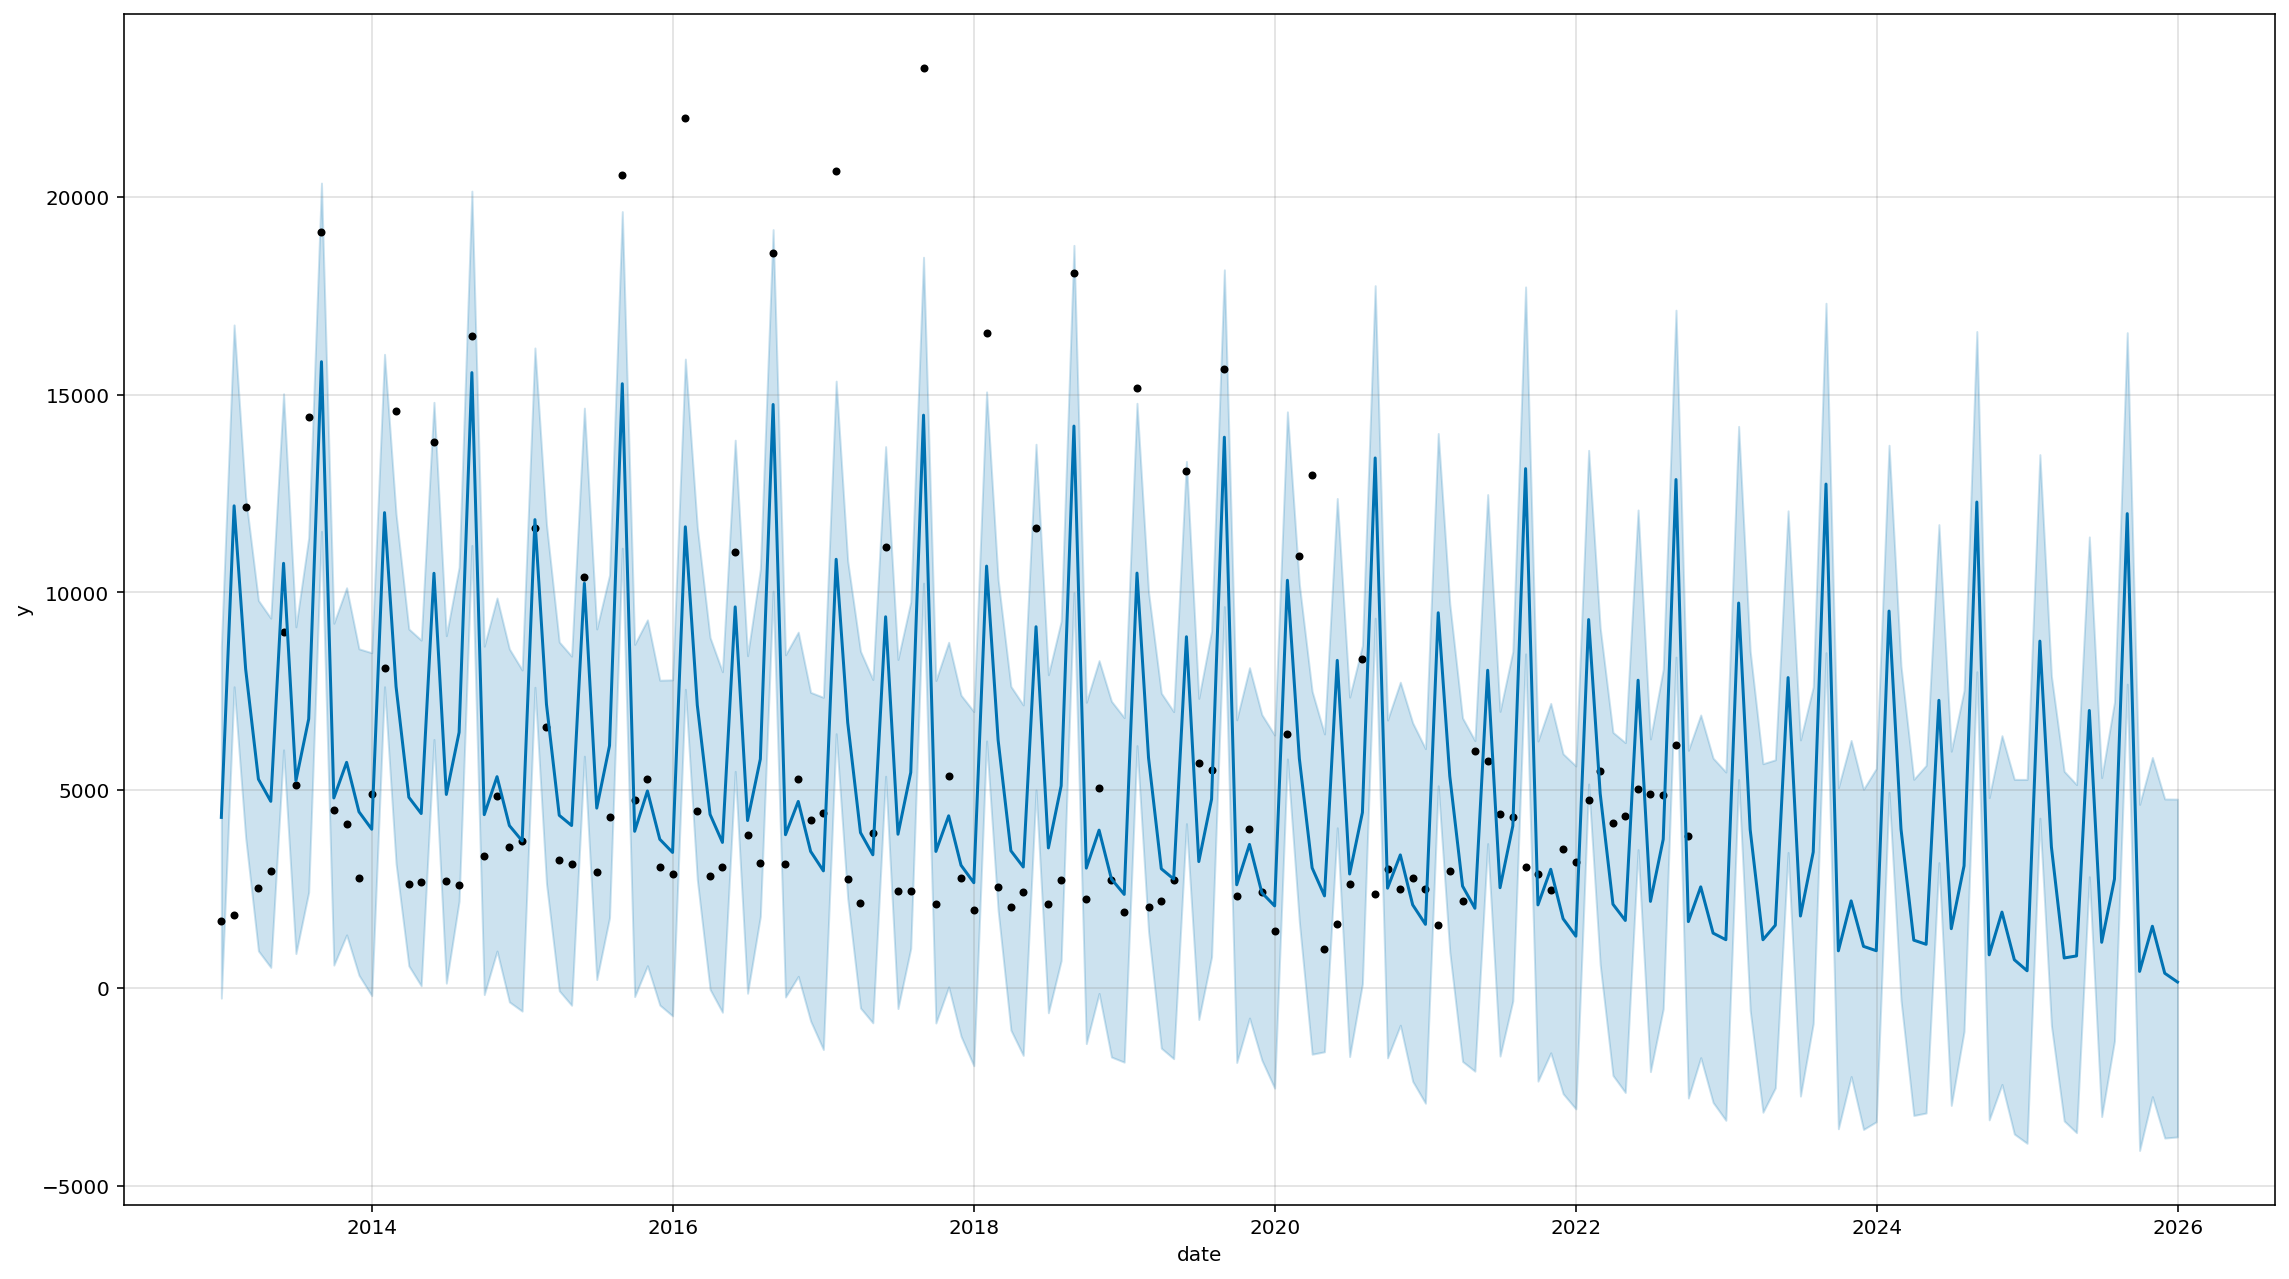

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

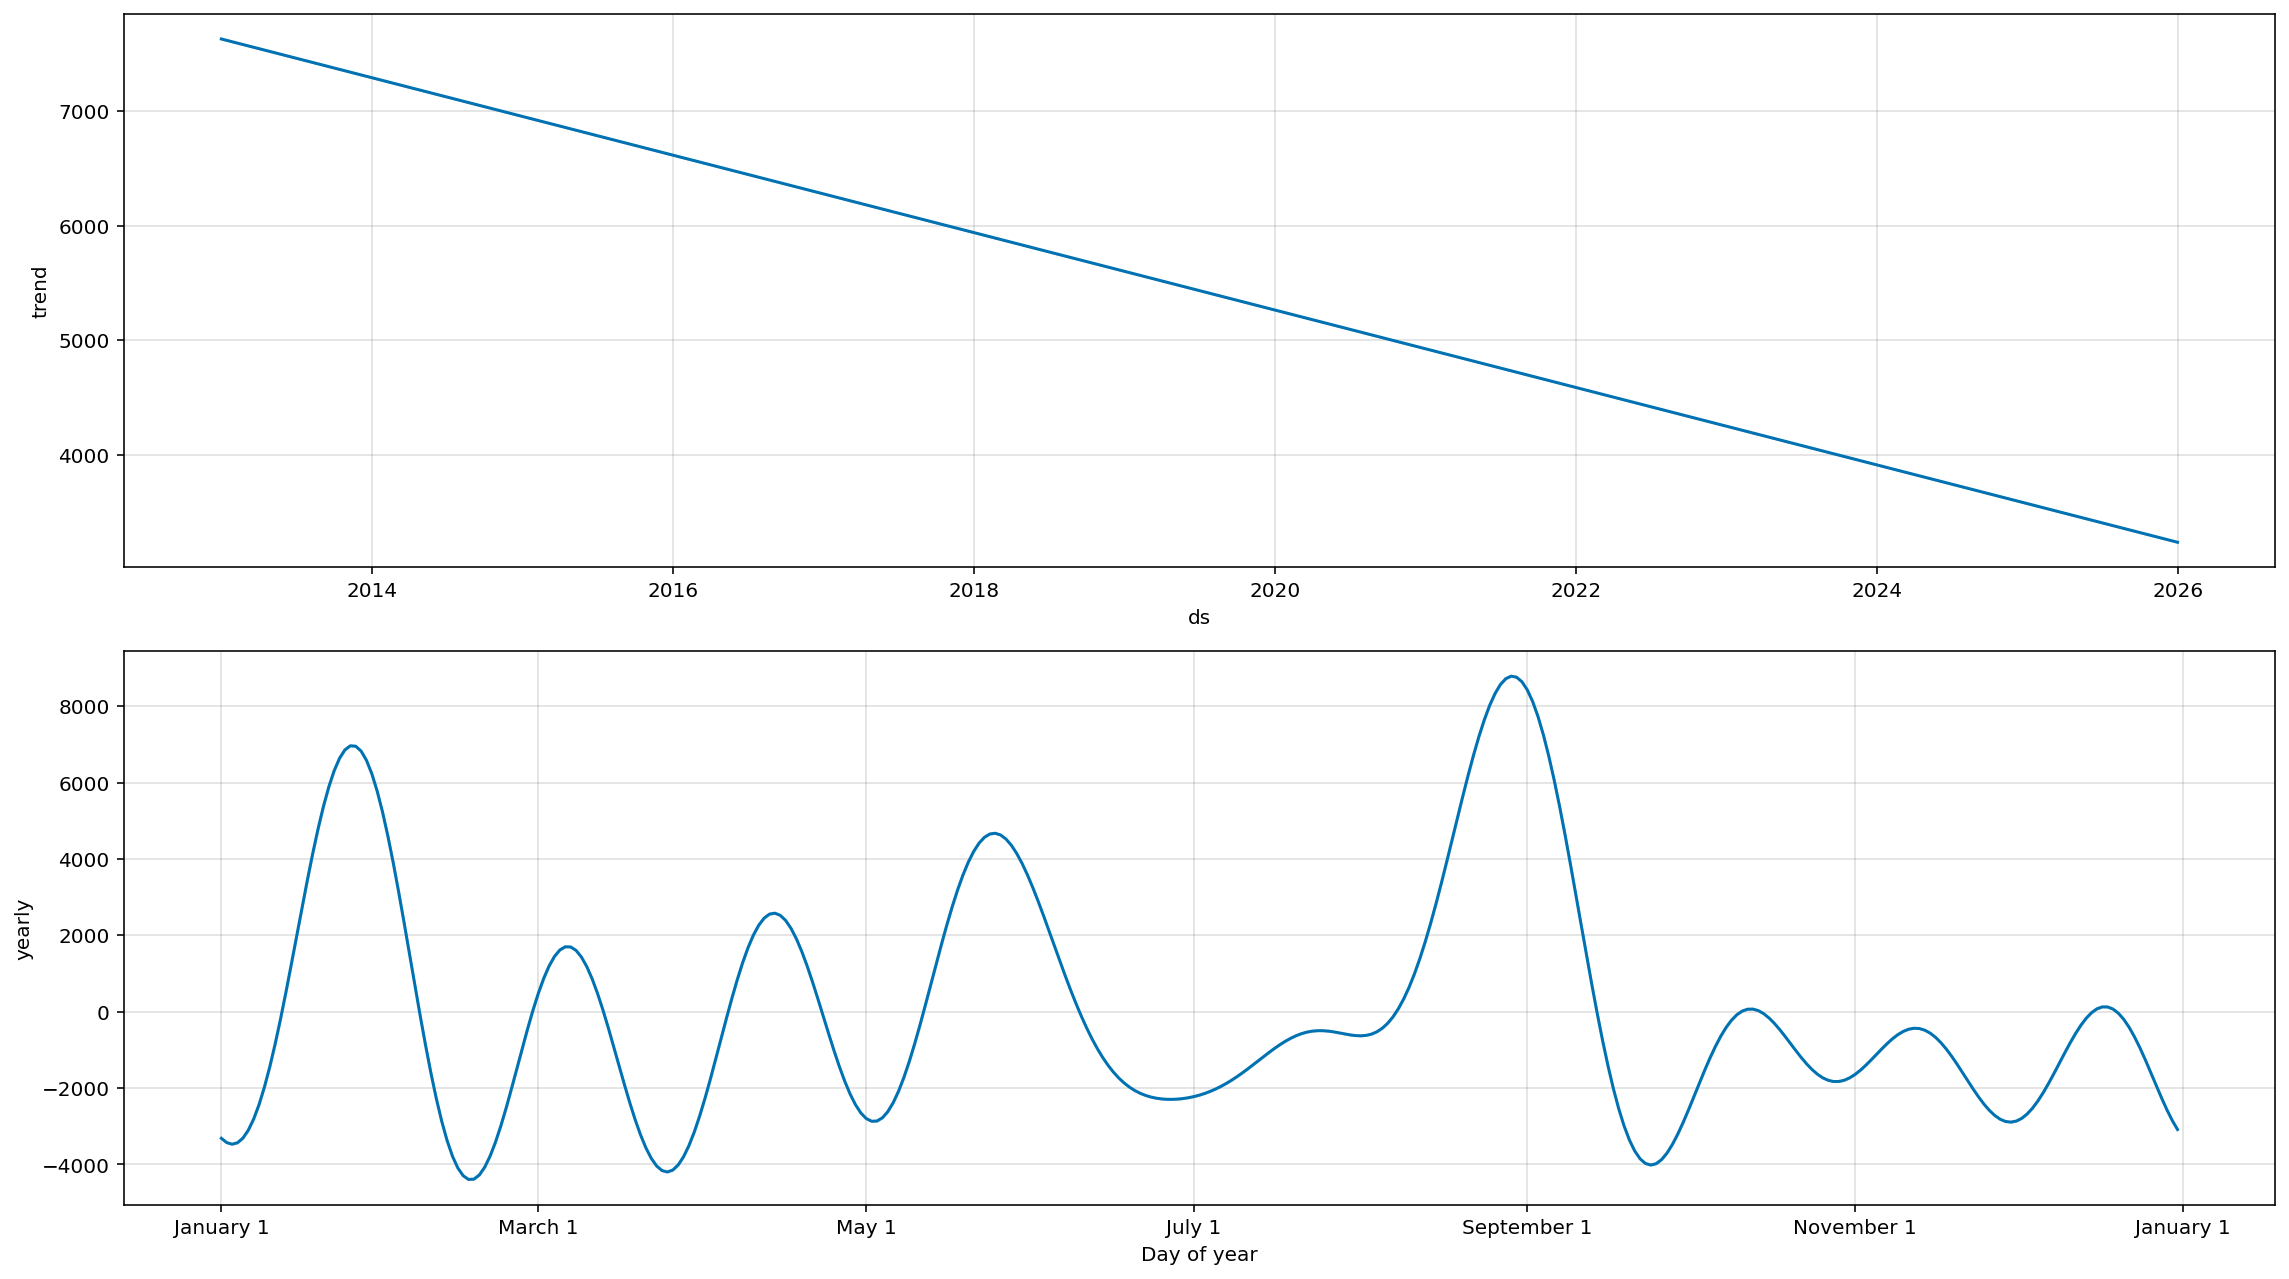

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

12600930.571846774

In [ ]:
RMSE = math.sqrt(mse)
RMSE

3549.7789468989154

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

2454.3109637691186

# China

In [ ]:
data = pd.read_csv('export data china.csv')
data.head()

ปี  เดือน มูลค่า(ล้านบาท)
0  2013      1           50.15
1  2013      2           57.92
2  2013      3           30.82
3  2013      4           71.73
4  2013      5           200.8

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี มูลค่า(ล้านบาท)
0    1      1  2013           50.15
1    1      2  2013           57.92
2    1      3  2013           30.82
3    1      4  2013           71.73
4    1      5  2013           200.8

In [ ]:
data['วัน']= 1

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year value(MBAHT)
0    1      1  2013        50.15
1    1      2  2013        57.92
2    1      3  2013        30.82
3    1      4  2013        71.73
4    1      5  2013        200.8

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date value(MBAHT)
0 2013-01-01        50.15
1 2013-02-01        57.92
2 2013-03-01        30.82
3 2013-04-01        71.73
4 2013-05-01        200.8

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-62-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01         50.15
1 2013-02-01         57.92
2 2013-03-01         30.82
3 2013-04-01         71.73
4 2013-05-01        200.80

In [ ]:
t2.columns=['ds','y']
t2.head()

ds       y
0 2013-01-01   50.15
1 2013-02-01   57.92
2 2013-03-01   30.82
3 2013-04-01   71.73
4 2013-05-01  200.80

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds       trend   yhat_lower   yhat_upper  trend_lower  \
0   2013-01-01  488.027703 -2103.271041  2427.589824   488.027703   
1   2013-02-01  493.572834 -1946.868468  2226.846428   493.572834   
2   2013-03-01  498.581339 -1954.724241  2469.264682   498.581339   
3   2013-04-01  504.126470 -1747.694508  2654.946844   504.126470   
4   2013-05-01  509.492726 -1844.547458  2384.311749   509.492726   
..         ...         ...          ...          ...          ...   
152 2025-08-31  982.630168   414.994287  4795.567916   967.920082   
153 2025-09-30  984.037739  -946.344743  3185.449209   968.733983   
154 2025-10-31  985.492230  -906.377263  3192.329063   969.564880   
155 2025-11-30  986.899802 -1384.093727  2881.049569   970.495068   
156 2025-12-31  988.354293 -1398.821031  2805.139233   971.249640   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     488.027703     -246.547652           -246.547652           -246.547652   
1     493.572834     -356.233572           -356.233572           -356.233572   
2     498.581339     -159.331817           -159.331817           -159.331817   
3     504.126470      -40.062737            -40.062737            -40.062737   
4     509.492726     -309.938350           -309.938350           -309.938350   
..           ...             ...                   ...                   ...   
152   998.885857     1684.363041           1684.363041           1684.363041   
153  1001.035699      124.364136            124.364136            124.364136   
154  1003.333498      227.391942            227.391942            227.391942   
155  1005.428107     -145.164061           -145.164061           -145.164061   
156  1007.919712     -240.832772           -240.832772           -240.832772   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -246.547652   -246.547652   -246.547652                   0.0   
1    -356.233572   -356.233572   -356.233572                   0.0   
2    -159.331817   -159.331817   -159.331817                   0.0   
3     -40.062737    -40.062737    -40.062737                   0.0   
4    -309.938350   -309.938350   -309.938350                   0.0   
..           ...           ...           ...                   ...   
152  1684.363041   1684.363041   1684.363041                   0.0   
153   124.364136    124.364136    124.364136                   0.0   
154   227.391942    227.391942    227.391942                   0.0   
155  -145.164061   -145.164061   -145.164061                   0.0   
156  -240.832772   -240.832772   -240.832772                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0   241.480051  
1                           0.0                         0.0   137.339262  
2                           0.0                         0.0   339.249522  
3                           0.0                         0.0   464.063734  
4                           0.0                         0.0   199.554376  
..                          ...                         ...          ...  
152                         0.0                         0.0  2666.993209  
153                         0.0                         0.0  1108.401876  
154                         0.0                         0.0  1212.884172  
155                         0.0                         0.0   841.735741  
156                         0.0                         0.0   747.521521  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds         yhat   yhat_lower   yhat_upper
0   2013-01-01   241.480051 -2103.271041  2427.589824
1   2013-02-01   137.339262 -1946.868468  2226.846428
2   2013-03-01   339.249522 -1954.724241  2469.264682
3   2013-04-01   464.063734 -1747.694508  2654.946844
4   2013-05-01   199.554376 -1844.547458  2384.311749
..         ...          ...          ...          ...
152 2025-08-31  2666.993209   414.994287  4795.567916
153 2025-09-30  1108.401876  -946.344743  3185.449209
154 2025-10-31  1212.884172  -906.377263  3192.329063
155 2025-11-30   841.735741 -1384.093727  2881.049569
156 2025-12-31   747.521521 -1398.821031  2805.139233

[157 rows x 4 columns]

In [ ]:
t2.head()

ds       y
0 2013-01-01   50.15
1 2013-02-01   57.92
2 2013-03-01   30.82
3 2013-04-01   71.73
4 2013-05-01  200.80

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds       y        yhat   yhat_lower   yhat_upper
0 2013-01-01   50.15  241.480051 -2103.271041  2427.589824
1 2013-02-01   57.92  137.339262 -1946.868468  2226.846428
2 2013-03-01   30.82  339.249522 -1954.724241  2469.264682
3 2013-04-01   71.73  464.063734 -1747.694508  2654.946844
4 2013-05-01  200.80  199.554376 -1844.547458  2384.311749

In [ ]:
s.describe()

y         yhat   yhat_lower   yhat_upper
count    118.000000   118.000000   118.000000   118.000000
mean     748.981695   760.022378 -1358.534919  2910.140412
std     1754.412380   563.663973   578.477868   574.245670
min       30.820000   137.339262 -2123.563030  2226.846428
25%      272.352500   463.199302 -1674.659096  2601.581794
50%      402.510000   599.622568 -1523.140696  2749.676863
75%      666.430000   806.088818 -1272.743740  2997.689194
max    18085.400000  2599.309569   557.312562  4873.144566

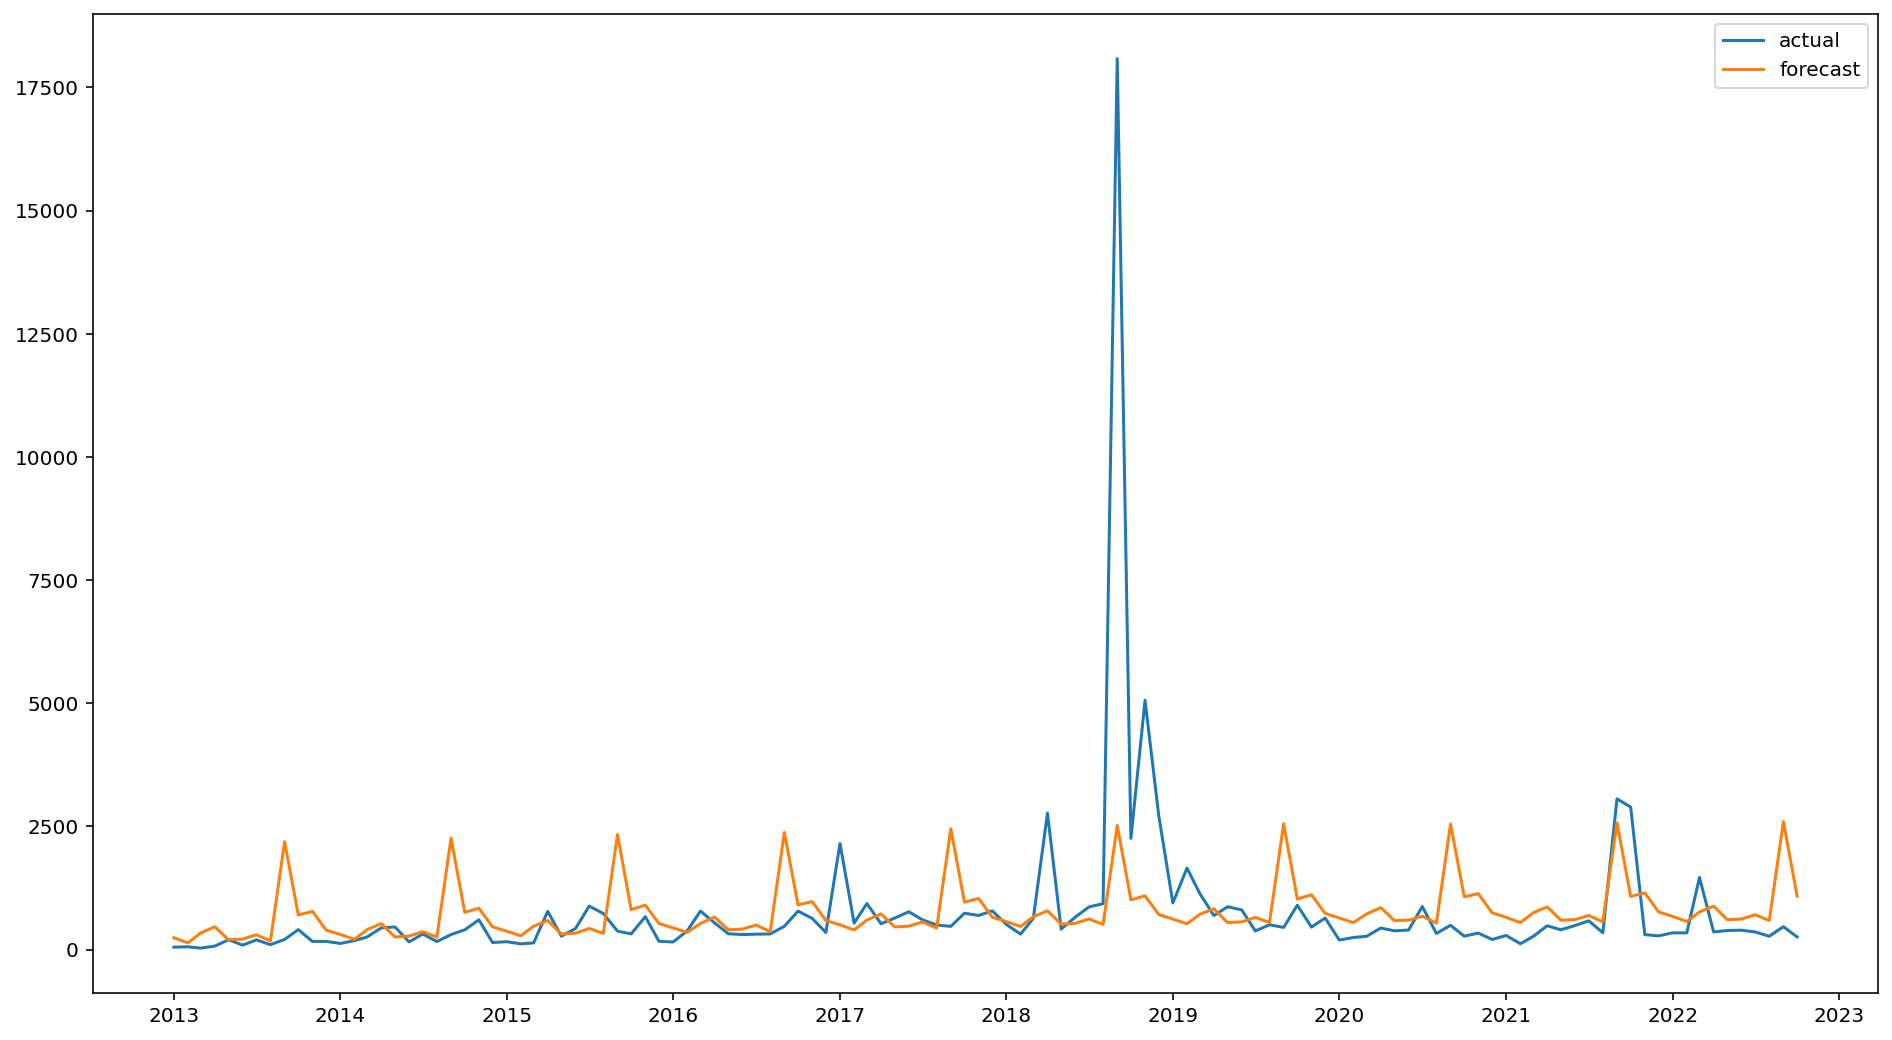

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.11686661593941394

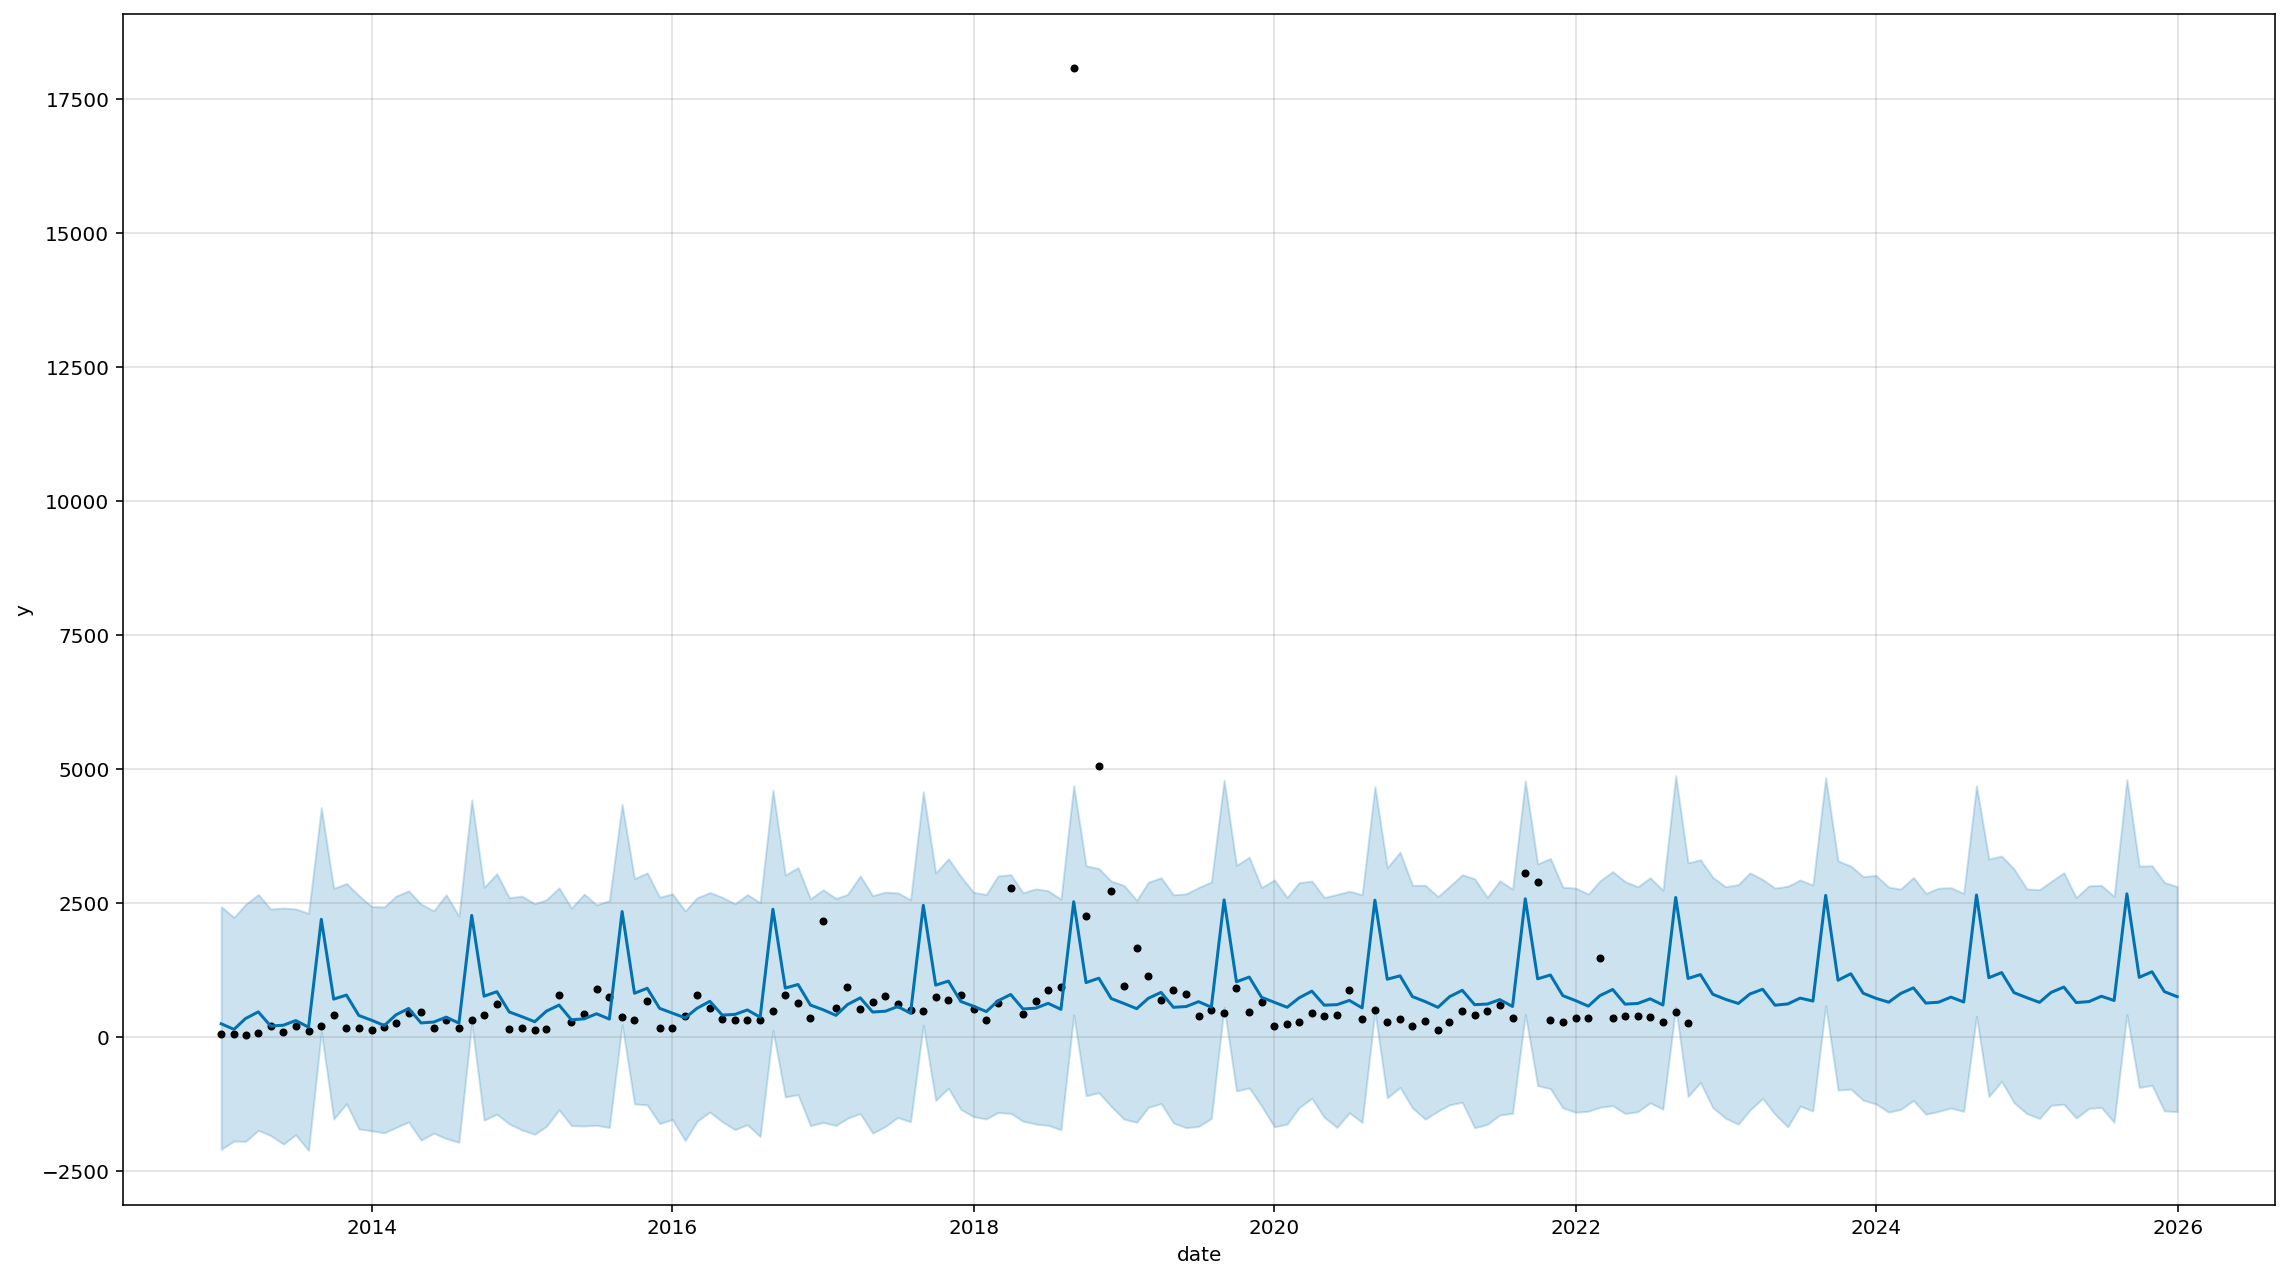

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

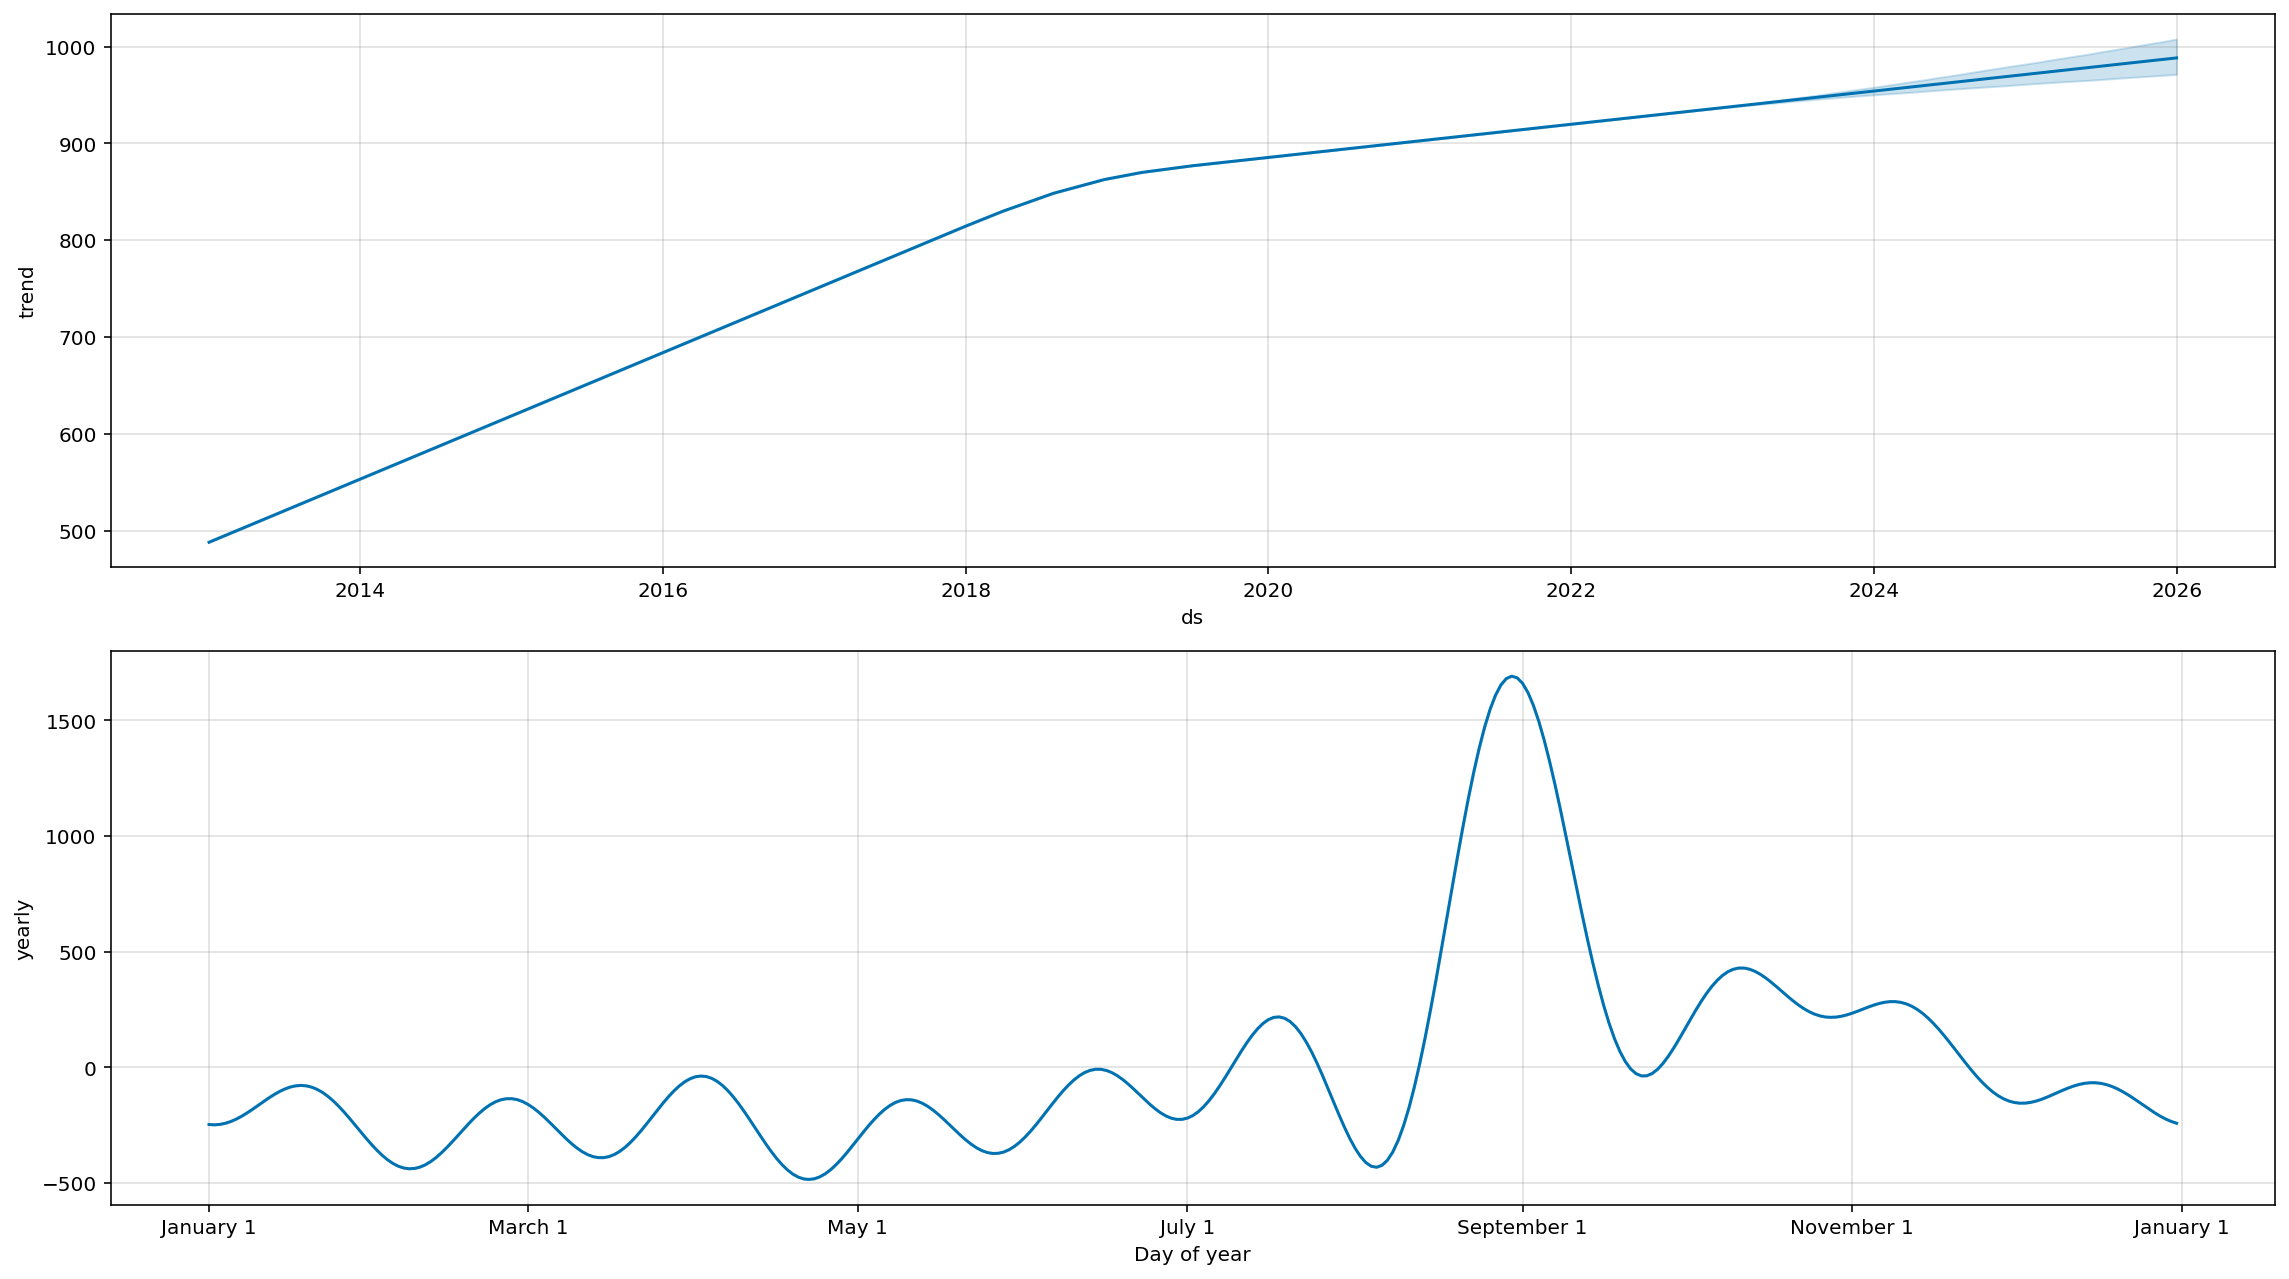

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

2695215.6726054354

In [ ]:
RMSE = math.sqrt(mse)
RMSE

1641.7112025583049

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

615.5715210516602

# Korea

In [ ]:
data = pd.read_csv('export data korea.csv')
data.head()

ปี  เดือน มูลค่า(ล้านบาท)
0  2013      1           53.94
1  2013      2           51.85
2  2013      3            36.9
3  2013      4           41.88
4  2013      5           42.41

In [ ]:
data['วัน']= 1

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี มูลค่า(ล้านบาท)
0    1      1  2013           53.94
1    1      2  2013           51.85
2    1      3  2013            36.9
3    1      4  2013           41.88
4    1      5  2013           42.41

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year value(MBAHT)
0    1      1  2013        53.94
1    1      2  2013        51.85
2    1      3  2013         36.9
3    1      4  2013        41.88
4    1      5  2013        42.41

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date value(MBAHT)
0 2013-01-01        53.94
1 2013-02-01        51.85
2 2013-03-01         36.9
3 2013-04-01        41.88
4 2013-05-01        42.41

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-87-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01         53.94
1 2013-02-01         51.85
2 2013-03-01         36.90
3 2013-04-01         41.88
4 2013-05-01         42.41

In [ ]:
t2.columns=['ds','y']
t2.head()

ds      y
0 2013-01-01  53.94
1 2013-02-01  51.85
2 2013-03-01  36.90
3 2013-04-01  41.88
4 2013-05-01  42.41

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2013-01-01  271.098149 -132.890050  609.276245   271.098149   271.098149   
1   2013-02-01  272.718681 -107.941512  624.994654   272.718681   272.718681   
2   2013-03-01  274.182388 -205.612324  521.442432   274.182388   274.182388   
3   2013-04-01  275.802921 -201.758377  493.681225   275.802921   275.802921   
4   2013-05-01  277.371178 -219.735942  493.027174   277.371178   277.371178   
..         ...         ...         ...         ...          ...          ...   
152 2025-08-31  159.681932 -170.111423  571.983293   146.366440   172.289105   
153 2025-09-30  157.950659 -258.301351  479.489434   144.137643   171.105851   
154 2025-10-31  156.161678  -38.806476  682.822833   141.705294   169.877258   
155 2025-11-30  154.430405 -171.709240  572.955204   139.279248   168.617096   
156 2025-12-31  152.641423 -235.870330  462.977508   136.849645   167.381386   

     additive_terms  additive_terms_lower  additive_terms_upper      yearly  \
0        -33.137489            -33.137489            -33.137489  -33.137489   
1        -23.771156            -23.771156            -23.771156  -23.771156   
2        -99.631176            -99.631176            -99.631176  -99.631176   
3       -116.343645           -116.343645           -116.343645 -116.343645   
4       -138.422762           -138.422762           -138.422762 -138.422762   
..              ...                   ...                   ...         ...   
152       44.190097             44.190097             44.190097   44.190097   
153      -22.434822            -22.434822            -22.434822  -22.434822   
154      173.861928            173.861928            173.861928  173.861928   
155       47.960137             47.960137             47.960137   47.960137   
156      -31.511444            -31.511444            -31.511444  -31.511444   

     yearly_lower  yearly_upper  multiplicative_terms  \
0      -33.137489    -33.137489                   0.0   
1      -23.771156    -23.771156                   0.0   
2      -99.631176    -99.631176                   0.0   
3     -116.343645   -116.343645                   0.0   
4     -138.422762   -138.422762                   0.0   
..            ...           ...                   ...   
152     44.190097     44.190097                   0.0   
153    -22.434822    -22.434822                   0.0   
154    173.861928    173.861928                   0.0   
155     47.960137     47.960137                   0.0   
156    -31.511444    -31.511444                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                           0.0                         0.0  237.960660  
1                           0.0                         0.0  248.947525  
2                           0.0                         0.0  174.551212  
3                           0.0                         0.0  159.459276  
4                           0.0                         0.0  138.948416  
..                          ...                         ...         ...  
152                         0.0                         0.0  203.872029  
153                         0.0                         0.0  135.515837  
154                         0.0                         0.0  330.023605  
155                         0.0                         0.0  202.390543  
156                         0.0                         0.0  121.129979  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds        yhat  yhat_lower  yhat_upper
0   2013-01-01  237.960660 -132.890050  609.276245
1   2013-02-01  248.947525 -107.941512  624.994654
2   2013-03-01  174.551212 -205.612324  521.442432
3   2013-04-01  159.459276 -201.758377  493.681225
4   2013-05-01  138.948416 -219.735942  493.027174
..         ...         ...         ...         ...
152 2025-08-31  203.872029 -170.111423  571.983293
153 2025-09-30  135.515837 -258.301351  479.489434
154 2025-10-31  330.023605  -38.806476  682.822833
155 2025-11-30  202.390543 -171.709240  572.955204
156 2025-12-31  121.129979 -235.870330  462.977508

[157 rows x 4 columns]

In [ ]:
t2.head()

ds      y
0 2013-01-01  53.94
1 2013-02-01  51.85
2 2013-03-01  36.90
3 2013-04-01  41.88
4 2013-05-01  42.41

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds      y        yhat  yhat_lower  yhat_upper
0 2013-01-01  53.94  237.960660 -132.890050  609.276245
1 2013-02-01  51.85  248.947525 -107.941512  624.994654
2 2013-03-01  36.90  174.551212 -205.612324  521.442432
3 2013-04-01  41.88  159.459276 -201.758377  493.681225
4 2013-05-01  42.41  138.948416 -219.735942  493.027174

In [ ]:
s.describe()

y        yhat  yhat_lower  yhat_upper
count   118.000000  118.000000  118.000000  118.000000
mean    289.519068  289.265444  -71.974250  652.865043
std     308.284970   91.514284   92.077411   94.079552
min      28.830000   92.741099 -256.099639  449.854496
25%      71.902500  214.630973 -142.467043  575.186591
50%     155.070000  293.516965  -67.661650  660.353074
75%     412.357500  357.041471   -4.370002  718.933969
max    1597.360000  498.077810  148.409032  872.102392

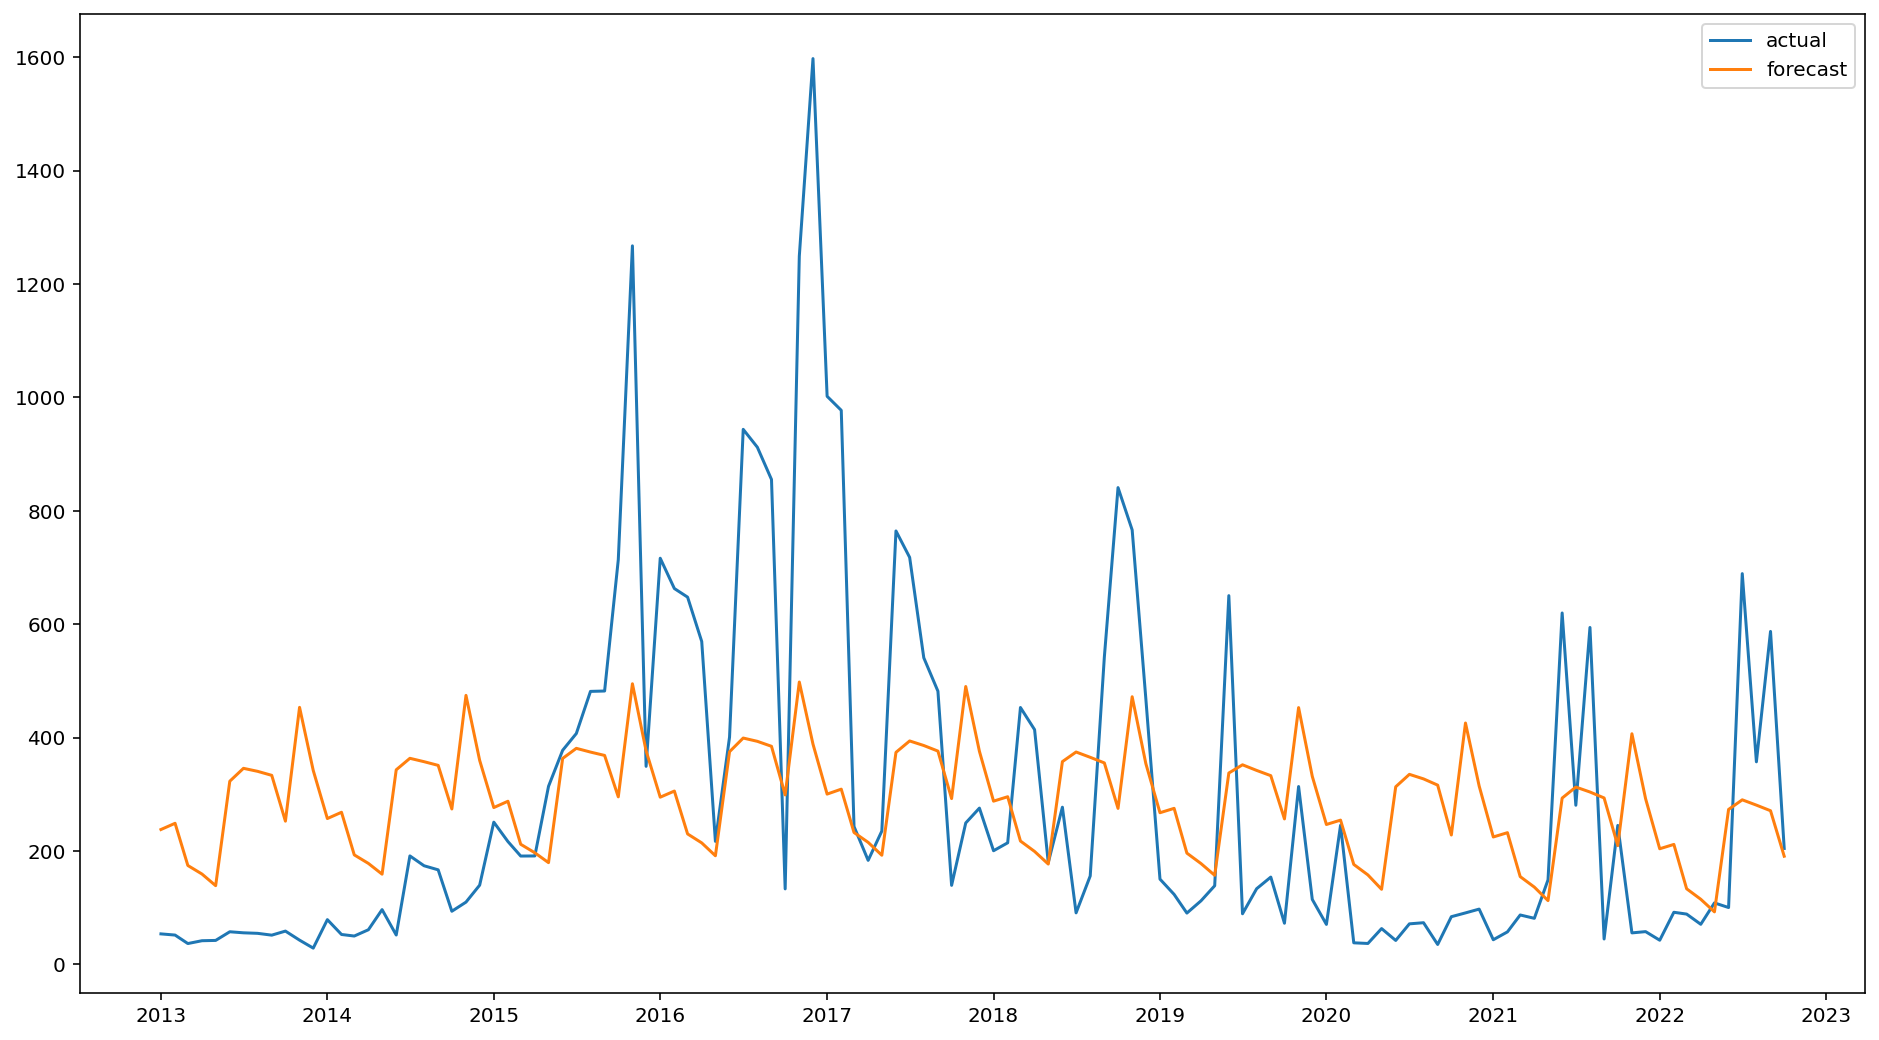

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.16224637831489286

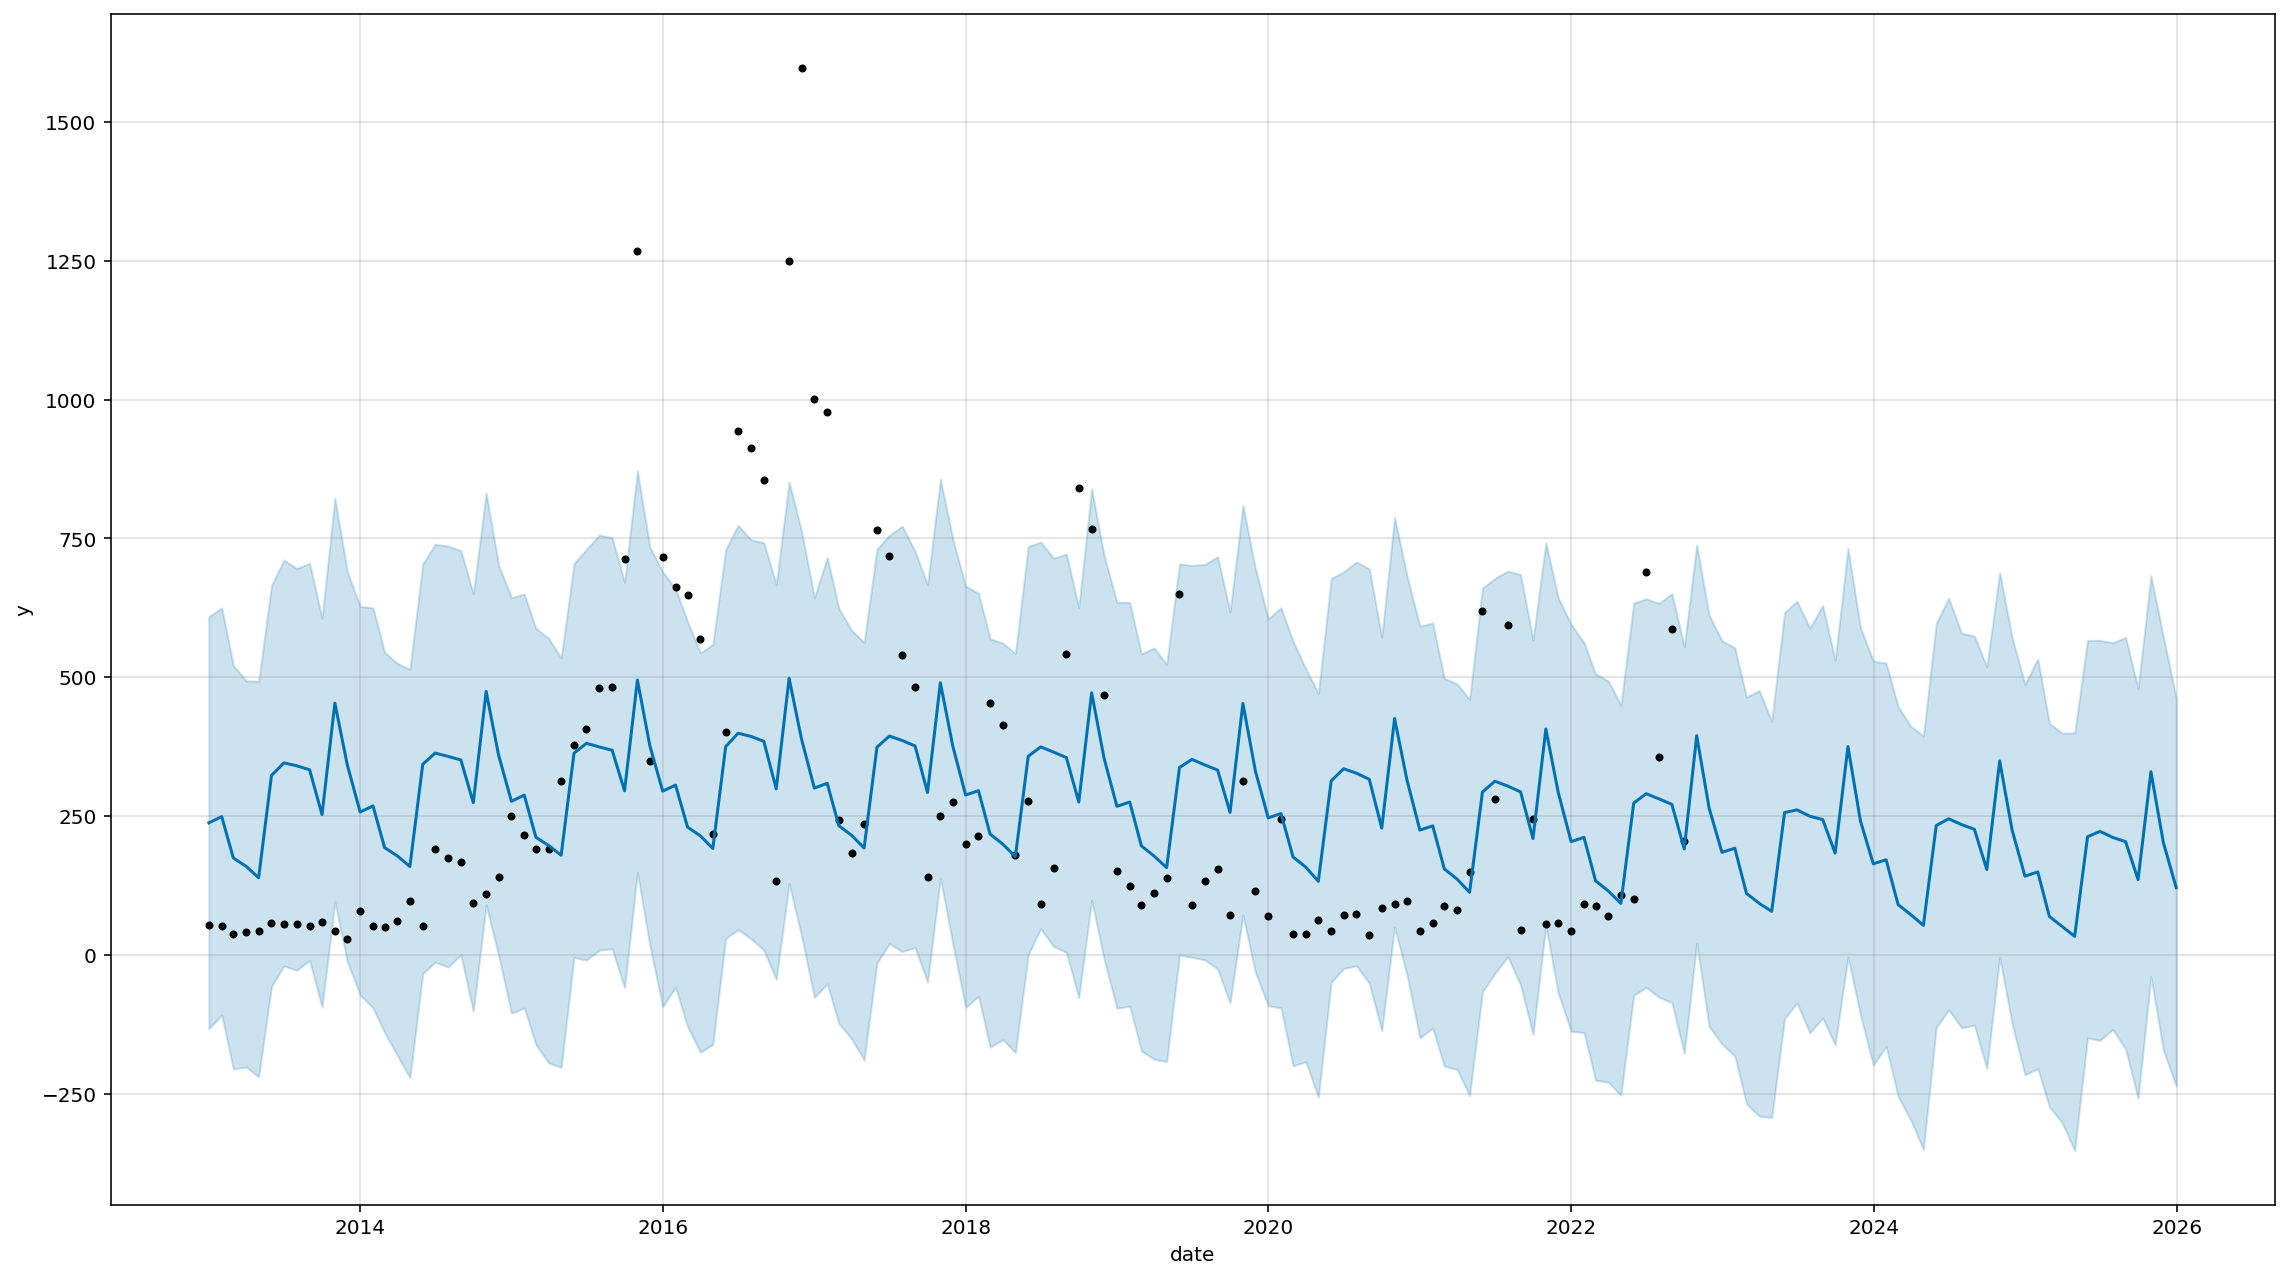

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

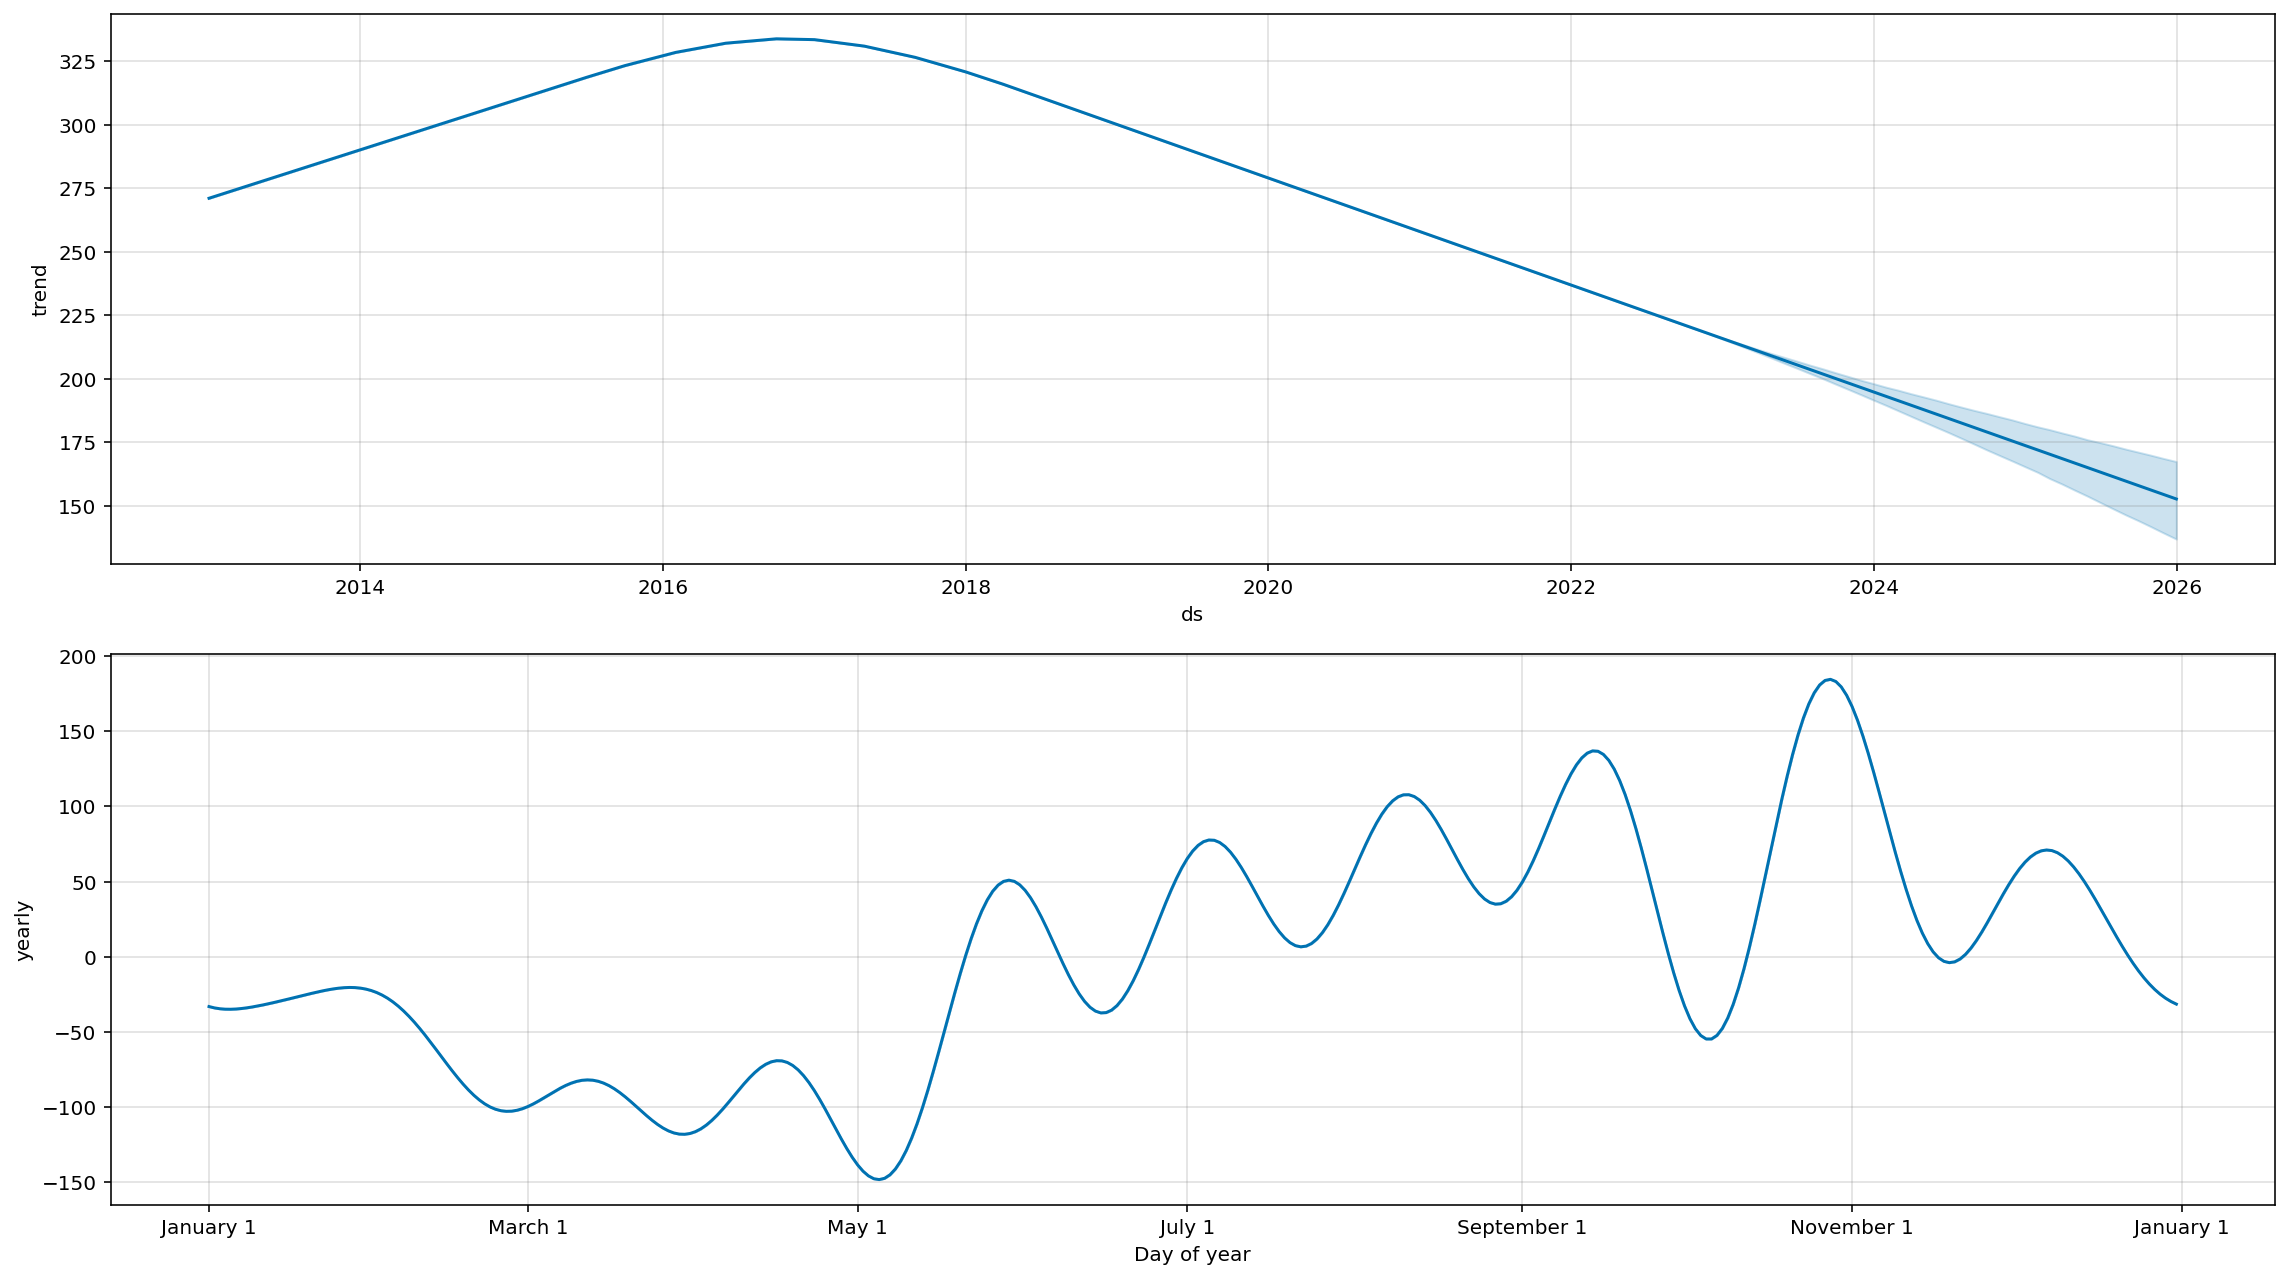

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

78945.04437132801

In [ ]:
RMSE = math.sqrt(mse)
RMSE

280.97160776727605

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

211.85642960819675

# Malaysia

In [ ]:
data = pd.read_csv('export data malaysia.csv')
data.head()

ปี  เดือน  มูลค่า(ล้านบาท)
0  2013      1            96.35
1  2013      2            28.85
2  2013      3            68.42
3  2013      4            55.01
4  2013      5            51.86

In [ ]:
data['วัน']= 1

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี  มูลค่า(ล้านบาท)
0    1      1  2013            96.35
1    1      2  2013            28.85
2    1      3  2013            68.42
3    1      4  2013            55.01
4    1      5  2013            51.86

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year  value(MBAHT)
0    1      1  2013         96.35
1    1      2  2013         28.85
2    1      3  2013         68.42
3    1      4  2013         55.01
4    1      5  2013         51.86

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date  value(MBAHT)
0 2013-01-01         96.35
1 2013-02-01         28.85
2 2013-03-01         68.42
3 2013-04-01         55.01
4 2013-05-01         51.86

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-112-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01         96.35
1 2013-02-01         28.85
2 2013-03-01         68.42
3 2013-04-01         55.01
4 2013-05-01         51.86

In [ ]:
t2.columns=['ds','y']
t2.head()

ds      y
0 2013-01-01  96.35
1 2013-02-01  28.85
2 2013-03-01  68.42
3 2013-04-01  55.01
4 2013-05-01  51.86

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2013-01-01  104.732315  -63.237207  219.606638   104.732315   104.732315   
1   2013-02-01  104.851956  -39.945997  229.761029   104.851956   104.851956   
2   2013-03-01  104.960018  -40.222698  234.979105   104.960018   104.960018   
3   2013-04-01  105.079659  -64.213994  207.928827   105.079659   105.079659   
4   2013-05-01  105.195441  -44.703888  236.210173   105.195441   105.195441   
..         ...         ...         ...         ...          ...          ...   
152 2025-08-31  258.866495  182.309646  454.934639   251.532176   265.942904   
153 2025-09-30  260.818575  163.100082  449.971090   253.121205   268.272520   
154 2025-10-31  262.835725   94.217110  368.963466   254.830586   270.627216   
155 2025-11-30  264.787805   88.241610  368.657401   256.442810   272.858297   
156 2025-12-31  266.804954   95.547609  379.352291   258.003057   275.145636   

     additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0        -28.405684            -28.405684            -28.405684 -28.405684   
1         -9.477147             -9.477147             -9.477147  -9.477147   
2         -5.852462             -5.852462             -5.852462  -5.852462   
3        -29.992776            -29.992776            -29.992776 -29.992776   
4         -4.268771             -4.268771             -4.268771  -4.268771   
..              ...                   ...                   ...        ...   
152       49.958633             49.958633             49.958633  49.958633   
153       46.044206             46.044206             46.044206  46.044206   
154      -33.692662            -33.692662            -33.692662 -33.692662   
155      -31.264594            -31.264594            -31.264594 -31.264594   
156      -24.297941            -24.297941            -24.297941 -24.297941   

     yearly_lower  yearly_upper  multiplicative_terms  \
0      -28.405684    -28.405684                   0.0   
1       -9.477147     -9.477147                   0.0   
2       -5.852462     -5.852462                   0.0   
3      -29.992776    -29.992776                   0.0   
4       -4.268771     -4.268771                   0.0   
..            ...           ...                   ...   
152     49.958633     49.958633                   0.0   
153     46.044206     46.044206                   0.0   
154    -33.692662    -33.692662                   0.0   
155    -31.264594    -31.264594                   0.0   
156    -24.297941    -24.297941                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                           0.0                         0.0   76.326631  
1                           0.0                         0.0   95.374809  
2                           0.0                         0.0   99.107556  
3                           0.0                         0.0   75.086883  
4                           0.0                         0.0  100.926669  
..                          ...                         ...         ...  
152                         0.0                         0.0  308.825128  
153                         0.0                         0.0  306.862781  
154                         0.0                         0.0  229.143062  
155                         0.0                         0.0  233.523210  
156                         0.0                         0.0  242.507013  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds        yhat  yhat_lower  yhat_upper
0   2013-01-01   76.326631  -63.237207  219.606638
1   2013-02-01   95.374809  -39.945997  229.761029
2   2013-03-01   99.107556  -40.222698  234.979105
3   2013-04-01   75.086883  -64.213994  207.928827
4   2013-05-01  100.926669  -44.703888  236.210173
..         ...         ...         ...         ...
152 2025-08-31  308.825128  182.309646  454.934639
153 2025-09-30  306.862781  163.100082  449.971090
154 2025-10-31  229.143062   94.217110  368.963466
155 2025-11-30  233.523210   88.241610  368.657401
156 2025-12-31  242.507013   95.547609  379.352291

[157 rows x 4 columns]

In [ ]:
t2.head()

ds      y
0 2013-01-01  96.35
1 2013-02-01  28.85
2 2013-03-01  68.42
3 2013-04-01  55.01
4 2013-05-01  51.86

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds      y        yhat  yhat_lower  yhat_upper
0 2013-01-01  96.35   76.326631  -63.237207  219.606638
1 2013-02-01  28.85   95.374809  -39.945997  229.761029
2 2013-03-01  68.42   99.107556  -40.222698  234.979105
3 2013-04-01  55.01   75.086883  -64.213994  207.928827
4 2013-05-01  51.86  100.926669  -44.703888  236.210173

In [ ]:
s.describe()

y        yhat  yhat_lower  yhat_upper
count  118.000000  118.000000  118.000000  118.000000
mean   123.164915  123.417729  -14.664758  261.467628
std    118.048626   37.534799   38.054782   38.123927
min     10.790000   74.497735  -76.480801  202.654566
25%     66.265000   96.566411  -44.507722  232.965447
50%     91.030000  114.330781  -24.031137  254.889128
75%    133.120000  146.016602   10.187196  286.378172
max    909.550000  243.353688   98.925057  381.665128

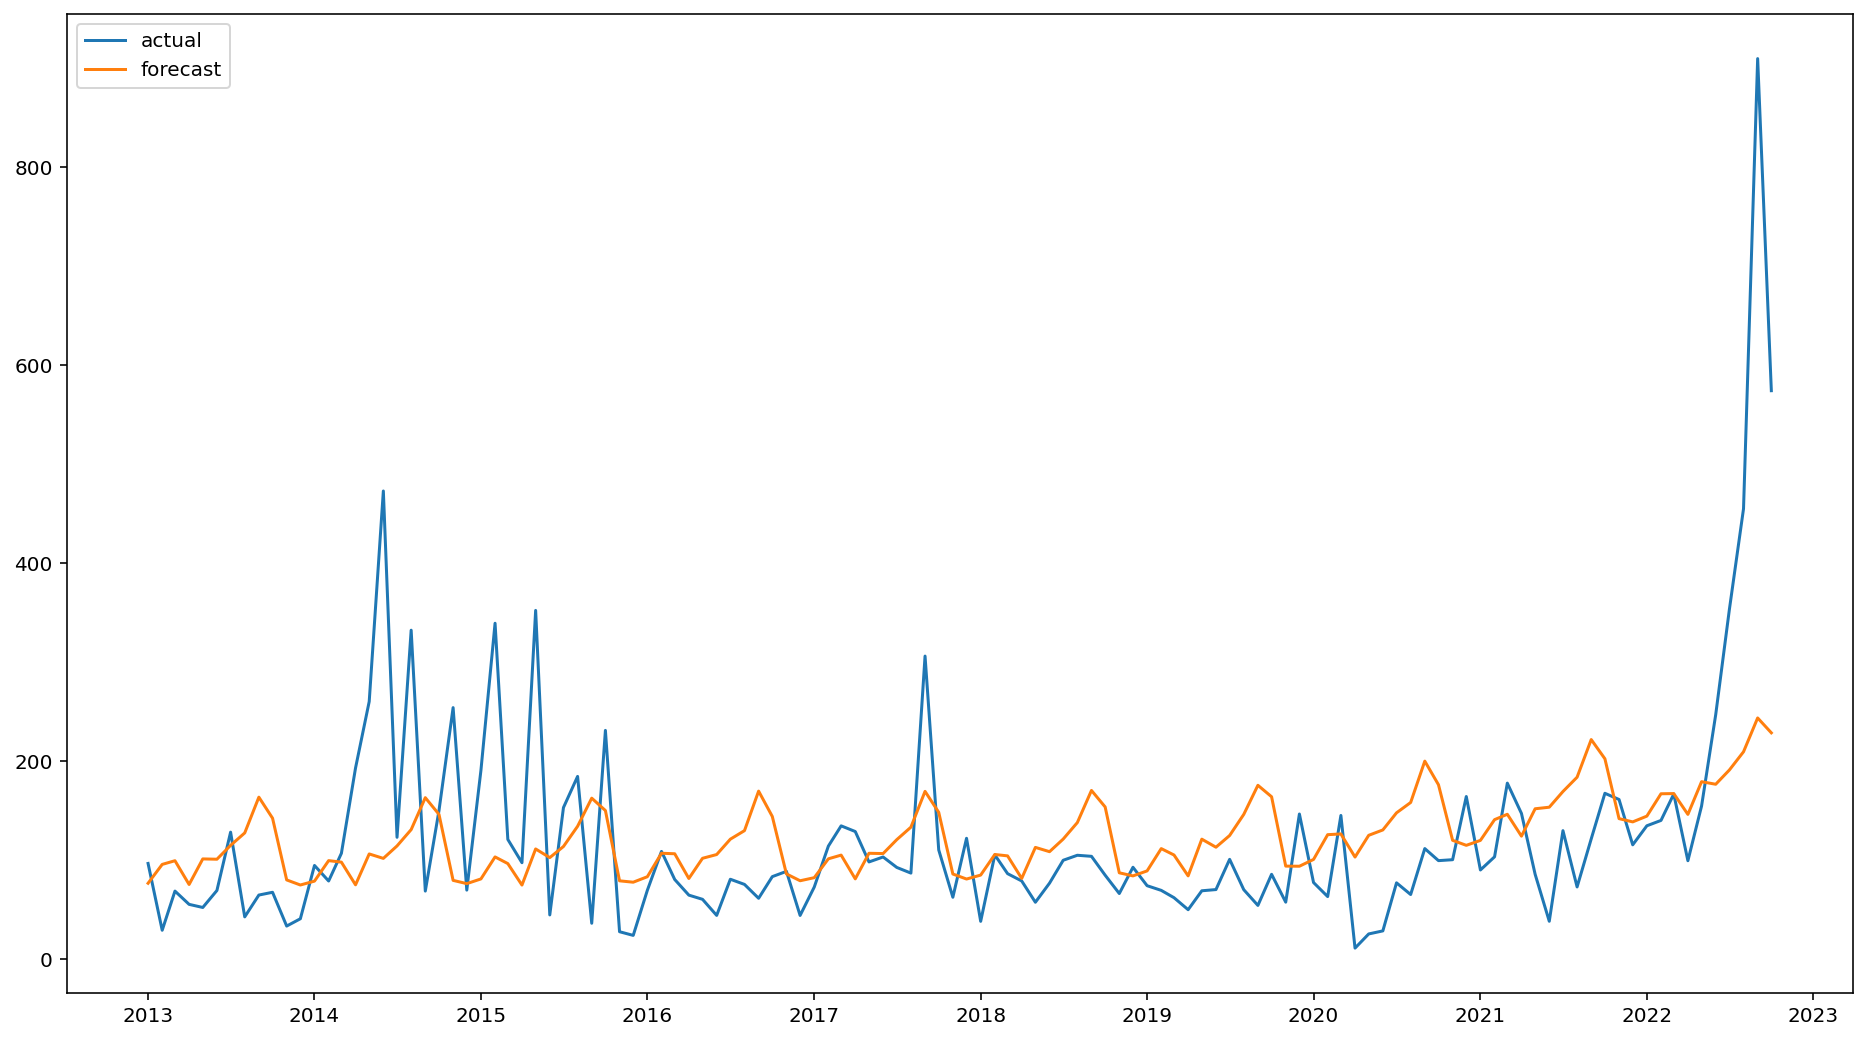

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.1782956872487368

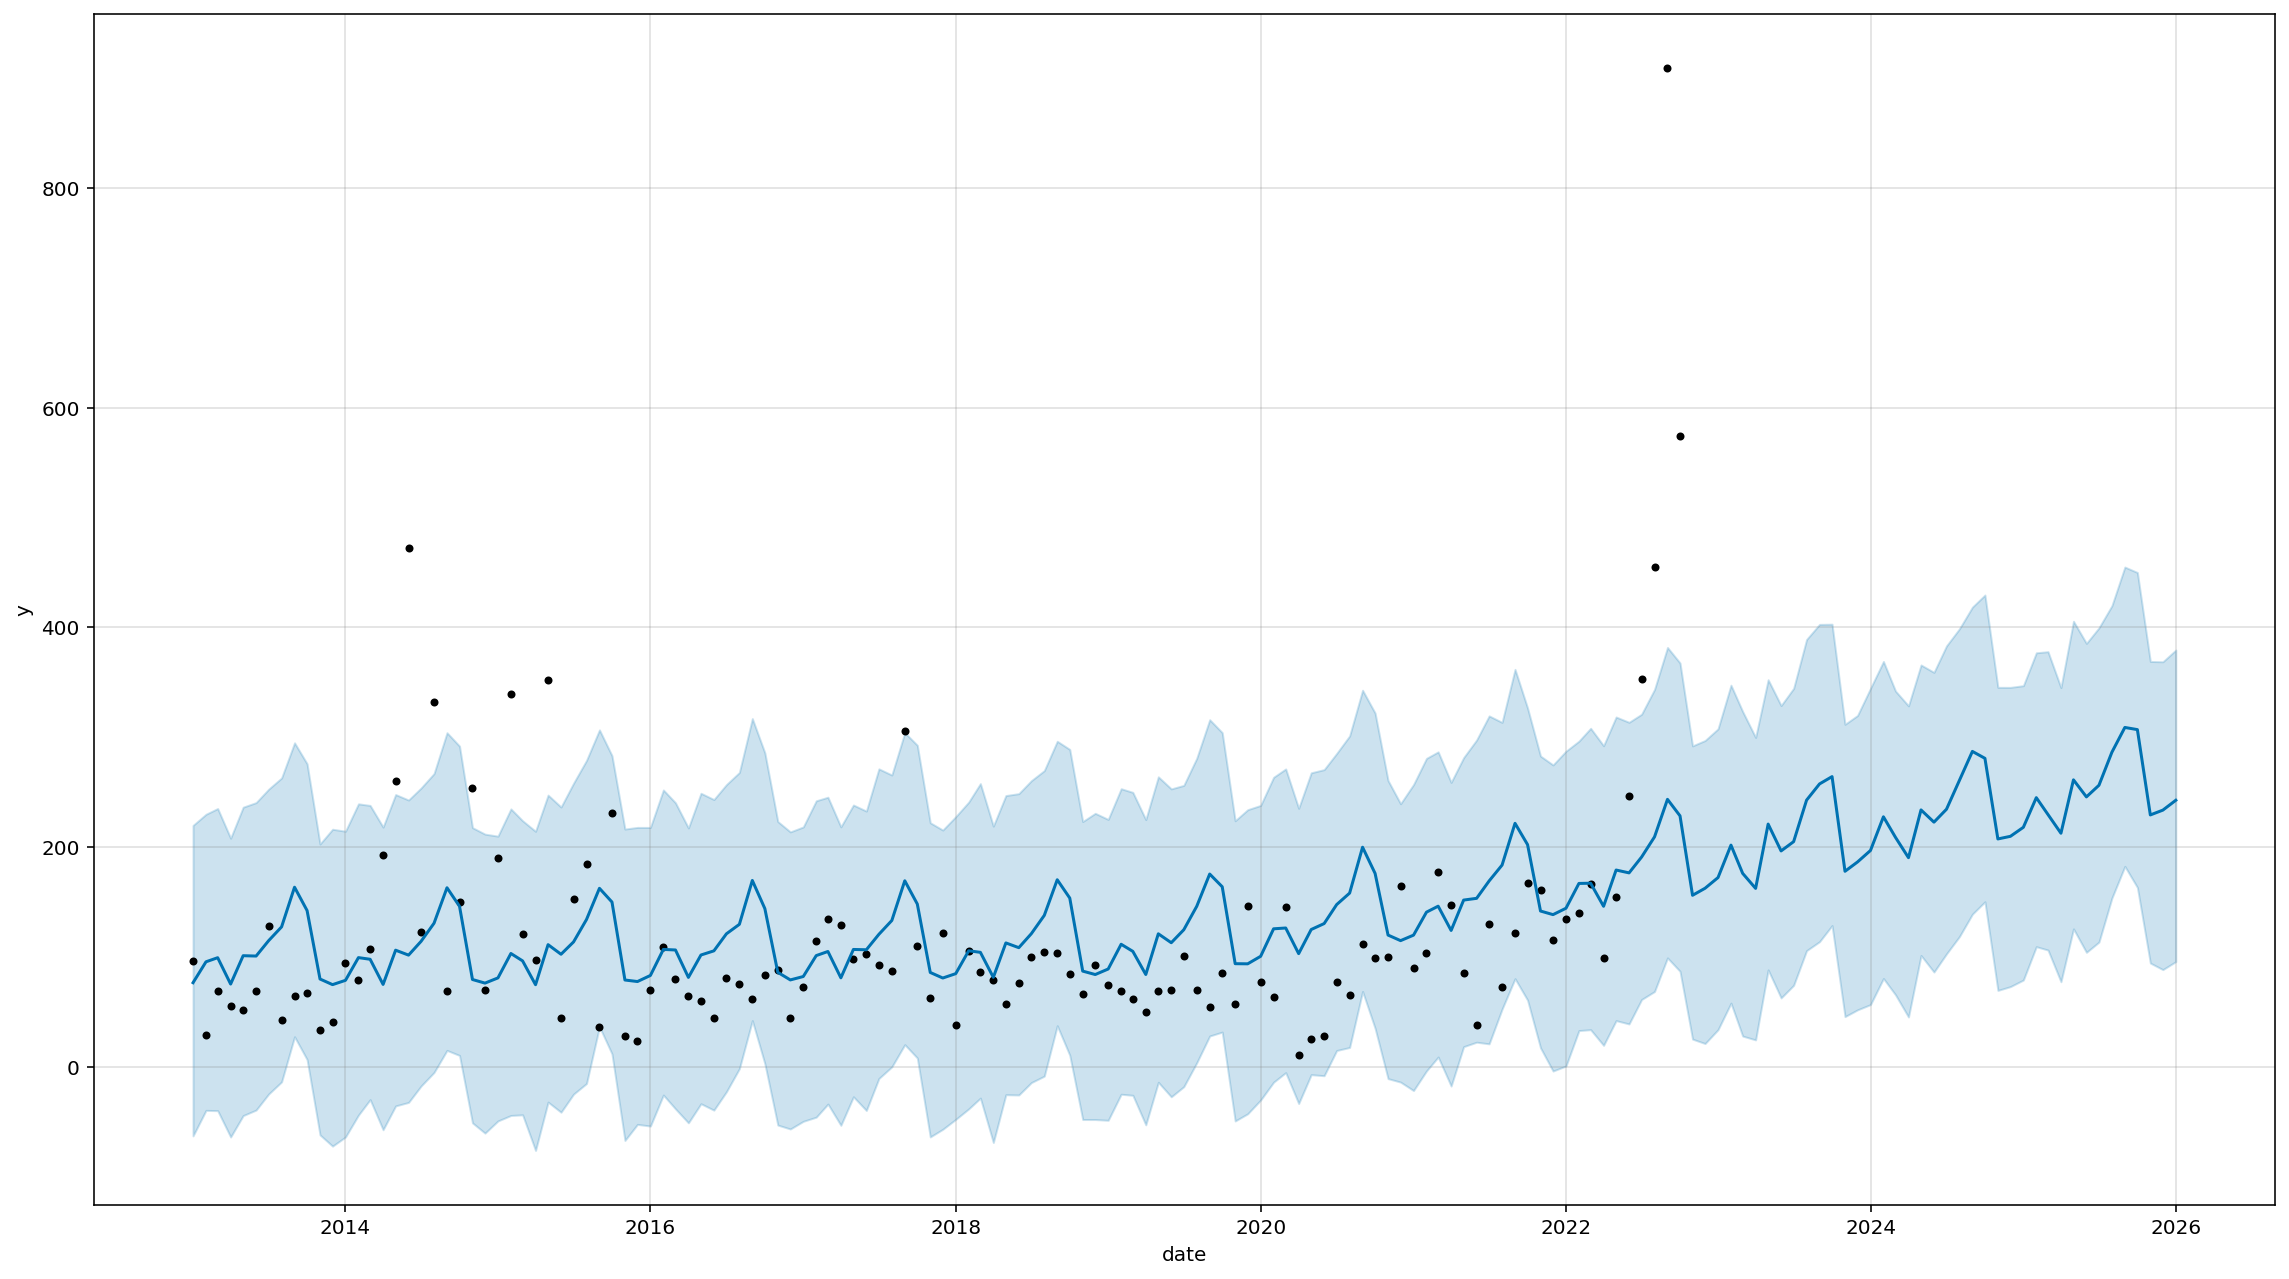

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

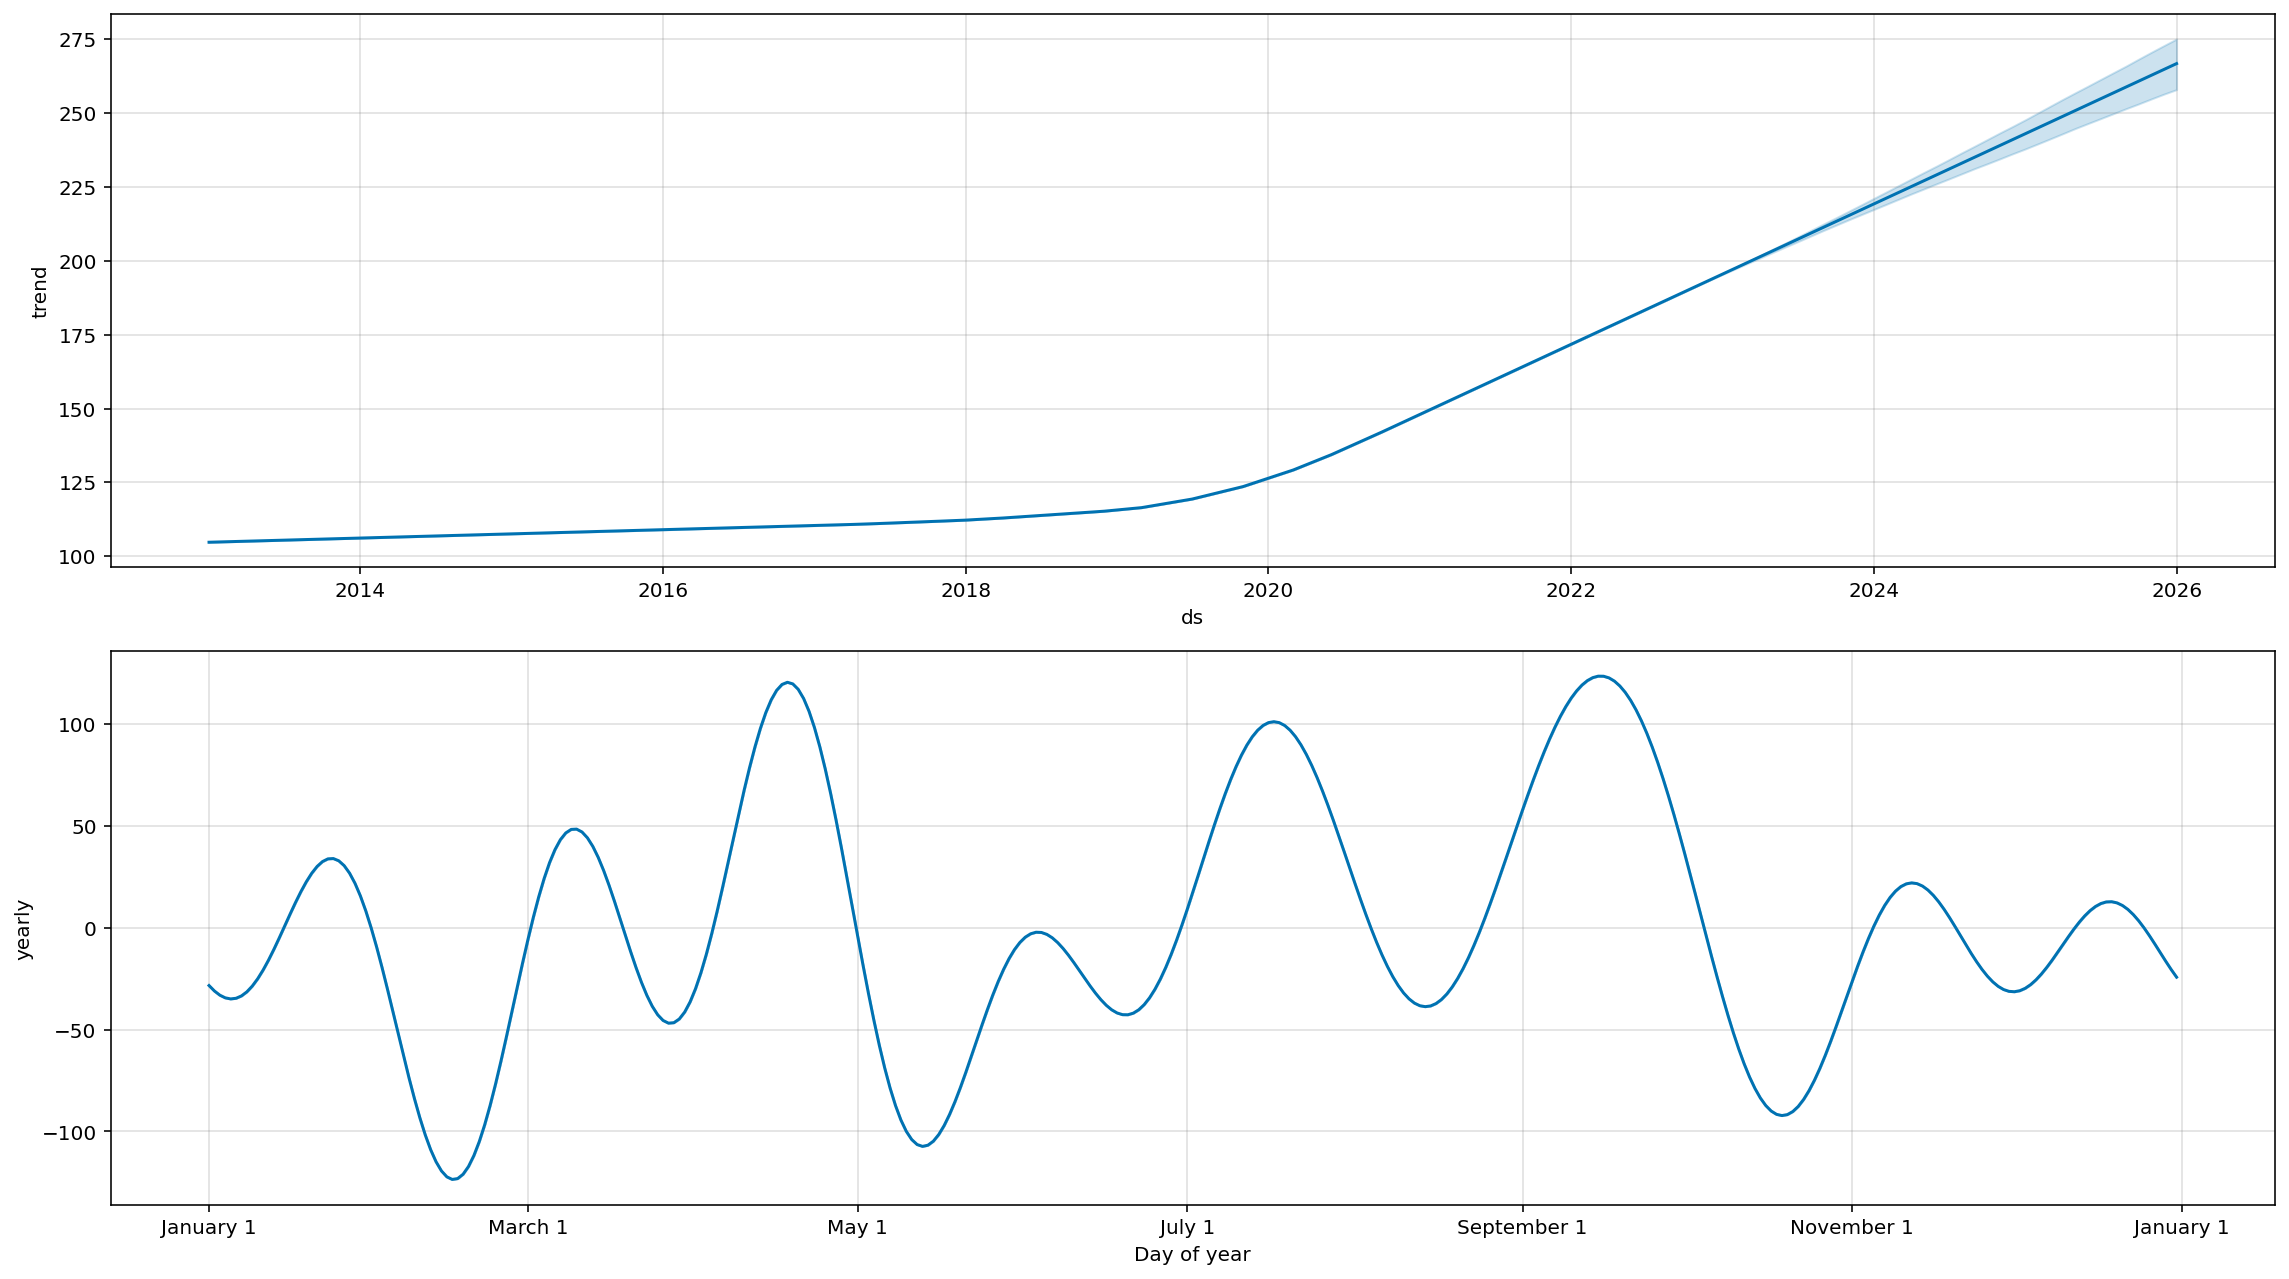

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

11353.801329867336

In [ ]:
RMSE = math.sqrt(mse)
RMSE

106.55421779482657

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

65.67909439876442

# New Zealand

In [ ]:
data = pd.read_csv('export data new zealand.csv')
data.head()

ปี  เดือน  มูลค่า(ล้านบาท)
0  2013      1            16.27
1  2013      2             9.87
2  2013      3            35.05
3  2013      4            16.36
4  2013      5            36.51

In [ ]:
data['วัน']= 1

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี  มูลค่า(ล้านบาท)
0    1      1  2013            16.27
1    1      2  2013             9.87
2    1      3  2013            35.05
3    1      4  2013            16.36
4    1      5  2013            36.51

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year  value(MBAHT)
0    1      1  2013         16.27
1    1      2  2013          9.87
2    1      3  2013         35.05
3    1      4  2013         16.36
4    1      5  2013         36.51

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date  value(MBAHT)
0 2013-01-01         16.27
1 2013-02-01          9.87
2 2013-03-01         35.05
3 2013-04-01         16.36
4 2013-05-01         36.51

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-137-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01         16.27
1 2013-02-01          9.87
2 2013-03-01         35.05
3 2013-04-01         16.36
4 2013-05-01         36.51

In [ ]:
t2.columns=['ds','y']
t2.head()

ds      y
0 2013-01-01  16.27
1 2013-02-01   9.87
2 2013-03-01  35.05
3 2013-04-01  16.36
4 2013-05-01  36.51

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2013-01-01   23.783414  -10.666898   46.929544    23.783414    23.783414   
1   2013-02-01   24.199786   -5.080533   53.435779    24.199786    24.199786   
2   2013-03-01   24.575863    4.653999   62.982845    24.575863    24.575863   
3   2013-04-01   24.992234   -3.114933   54.453642    24.992234    24.992234   
4   2013-05-01   25.395174   -4.424055   52.712420    25.395174    25.395174   
..         ...         ...         ...         ...          ...          ...   
152 2025-08-31  138.811481  110.763736  172.018111   136.117715   141.596654   
153 2025-09-30  139.926848  136.314453  196.163378   137.139171   142.849669   
154 2025-10-31  141.079394  130.301310  188.804072   138.189959   144.158299   
155 2025-11-30  142.194761  109.731136  164.894912   139.200463   145.380695   
156 2025-12-31  143.347308  105.014063  163.775866   140.257418   146.653613   

     additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0         -5.520707             -5.520707             -5.520707  -5.520707   
1          0.126249              0.126249              0.126249   0.126249   
2          9.572177              9.572177              9.572177   9.572177   
3          2.346385              2.346385              2.346385   2.346385   
4         -1.201632             -1.201632             -1.201632  -1.201632   
..              ...                   ...                   ...        ...   
152        3.717131              3.717131              3.717131   3.717131   
153       25.441992             25.441992             25.441992  25.441992   
154       18.604767             18.604767             18.604767  18.604767   
155       -5.893184             -5.893184             -5.893184  -5.893184   
156       -8.830016             -8.830016             -8.830016  -8.830016   

     yearly_lower  yearly_upper  multiplicative_terms  \
0       -5.520707     -5.520707                   0.0   
1        0.126249      0.126249                   0.0   
2        9.572177      9.572177                   0.0   
3        2.346385      2.346385                   0.0   
4       -1.201632     -1.201632                   0.0   
..            ...           ...                   ...   
152      3.717131      3.717131                   0.0   
153     25.441992     25.441992                   0.0   
154     18.604767     18.604767                   0.0   
155     -5.893184     -5.893184                   0.0   
156     -8.830016     -8.830016                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                           0.0                         0.0   18.262707  
1                           0.0                         0.0   24.326035  
2                           0.0                         0.0   34.148040  
3                           0.0                         0.0   27.338619  
4                           0.0                         0.0   24.193542  
..                          ...                         ...         ...  
152                         0.0                         0.0  142.528612  
153                         0.0                         0.0  165.368840  
154                         0.0                         0.0  159.684162  
155                         0.0                         0.0  136.301577  
156                         0.0                         0.0  134.517292  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds        yhat  yhat_lower  yhat_upper
0   2013-01-01   18.262707  -10.666898   46.929544
1   2013-02-01   24.326035   -5.080533   53.435779
2   2013-03-01   34.148040    4.653999   62.982845
3   2013-04-01   27.338619   -3.114933   54.453642
4   2013-05-01   24.193542   -4.424055   52.712420
..         ...         ...         ...         ...
152 2025-08-31  142.528612  110.763736  172.018111
153 2025-09-30  165.368840  136.314453  196.163378
154 2025-10-31  159.684162  130.301310  188.804072
155 2025-11-30  136.301577  109.731136  164.894912
156 2025-12-31  134.517292  105.014063  163.775866

[157 rows x 4 columns]

In [ ]:
t2.head()

ds      y
0 2013-01-01  16.27
1 2013-02-01   9.87
2 2013-03-01  35.05
3 2013-04-01  16.36
4 2013-05-01  36.51

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds      y       yhat  yhat_lower  yhat_upper
0 2013-01-01  16.27  18.262707  -10.666898   46.929544
1 2013-02-01   9.87  24.326035   -5.080533   53.435779
2 2013-03-01  35.05  34.148040    4.653999   62.982845
3 2013-04-01  16.36  27.338619   -3.114933   54.453642
4 2013-05-01  36.51  24.193542   -4.424055   52.712420

In [ ]:
s.describe()

y        yhat  yhat_lower  yhat_upper
count  118.000000  118.000000  118.000000  118.000000
mean    53.366186   53.359497   24.350755   82.566237
std     34.309123   24.200565   24.377157   24.150437
min      9.870000    7.233817  -22.880681   36.969079
25%     30.742500   34.083937    5.128205   62.898054
50%     45.645000   49.072473   19.304800   78.588689
75%     65.570000   69.539177   40.620438   97.930025
max    241.370000  125.818927   96.788673  153.627239

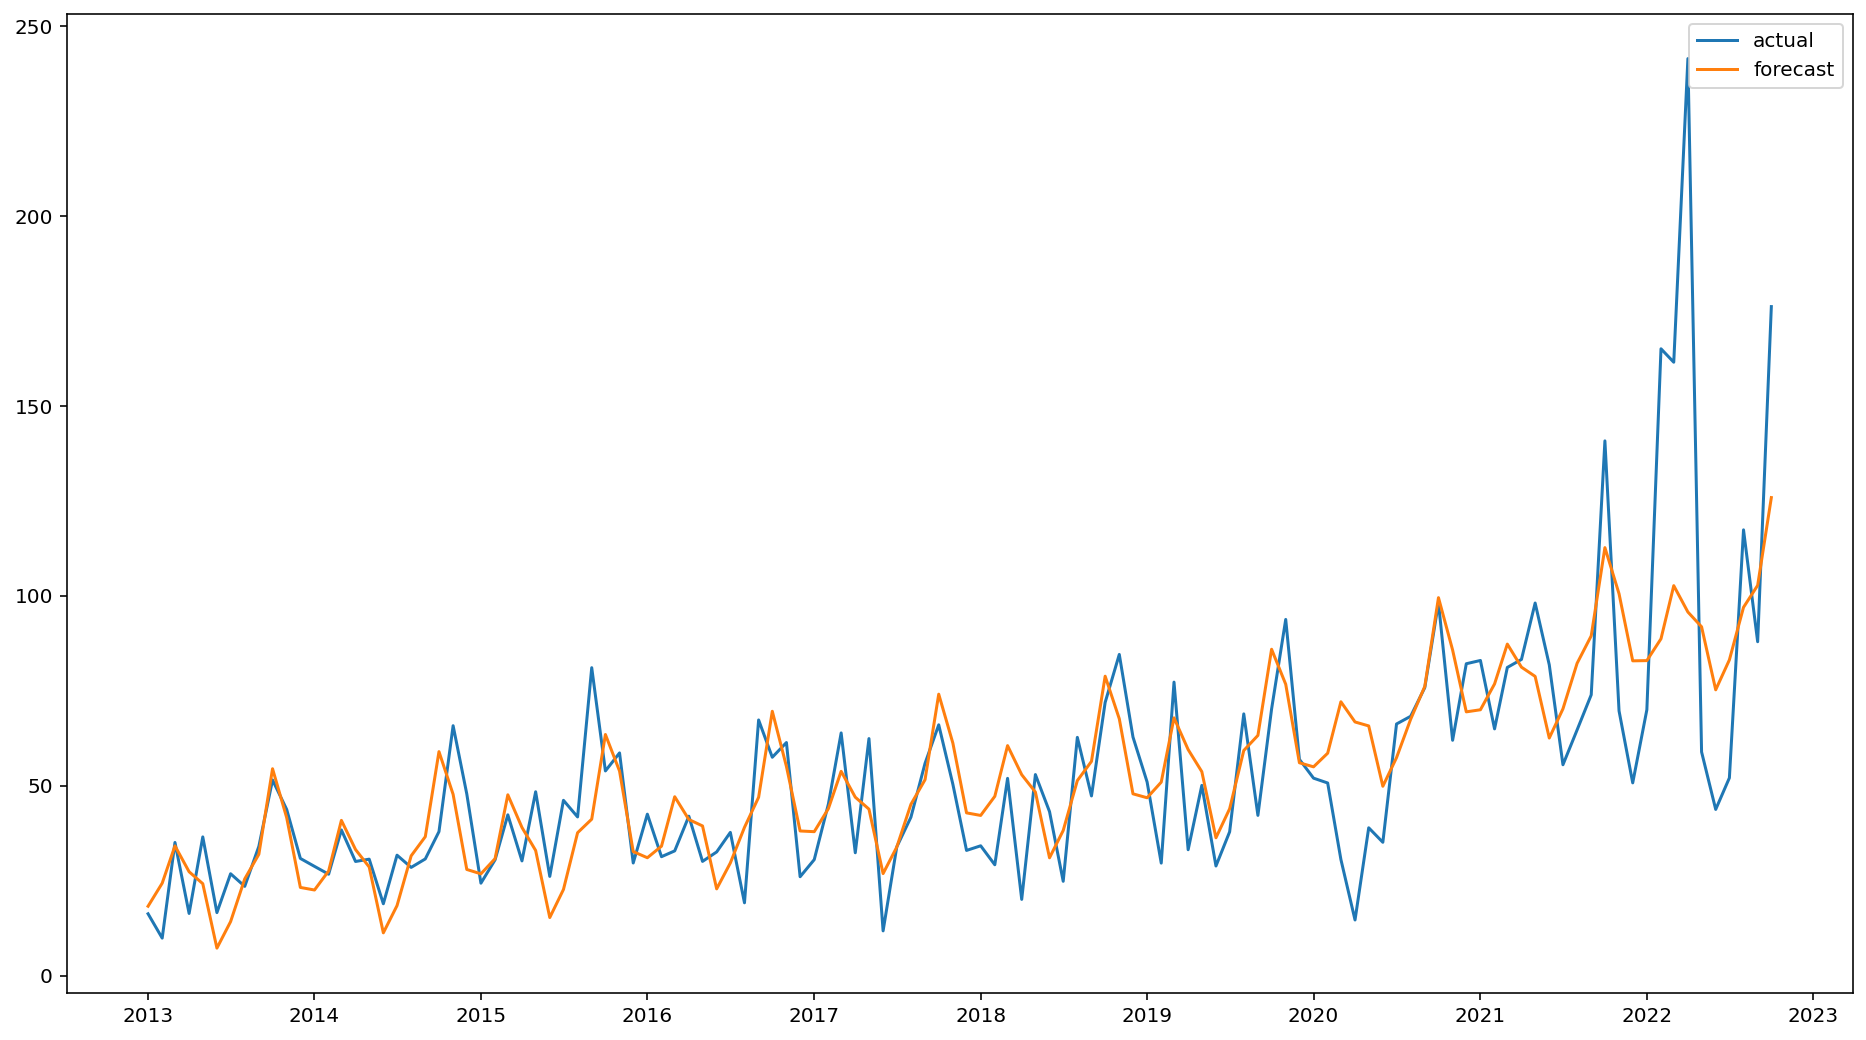

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.55777917354924

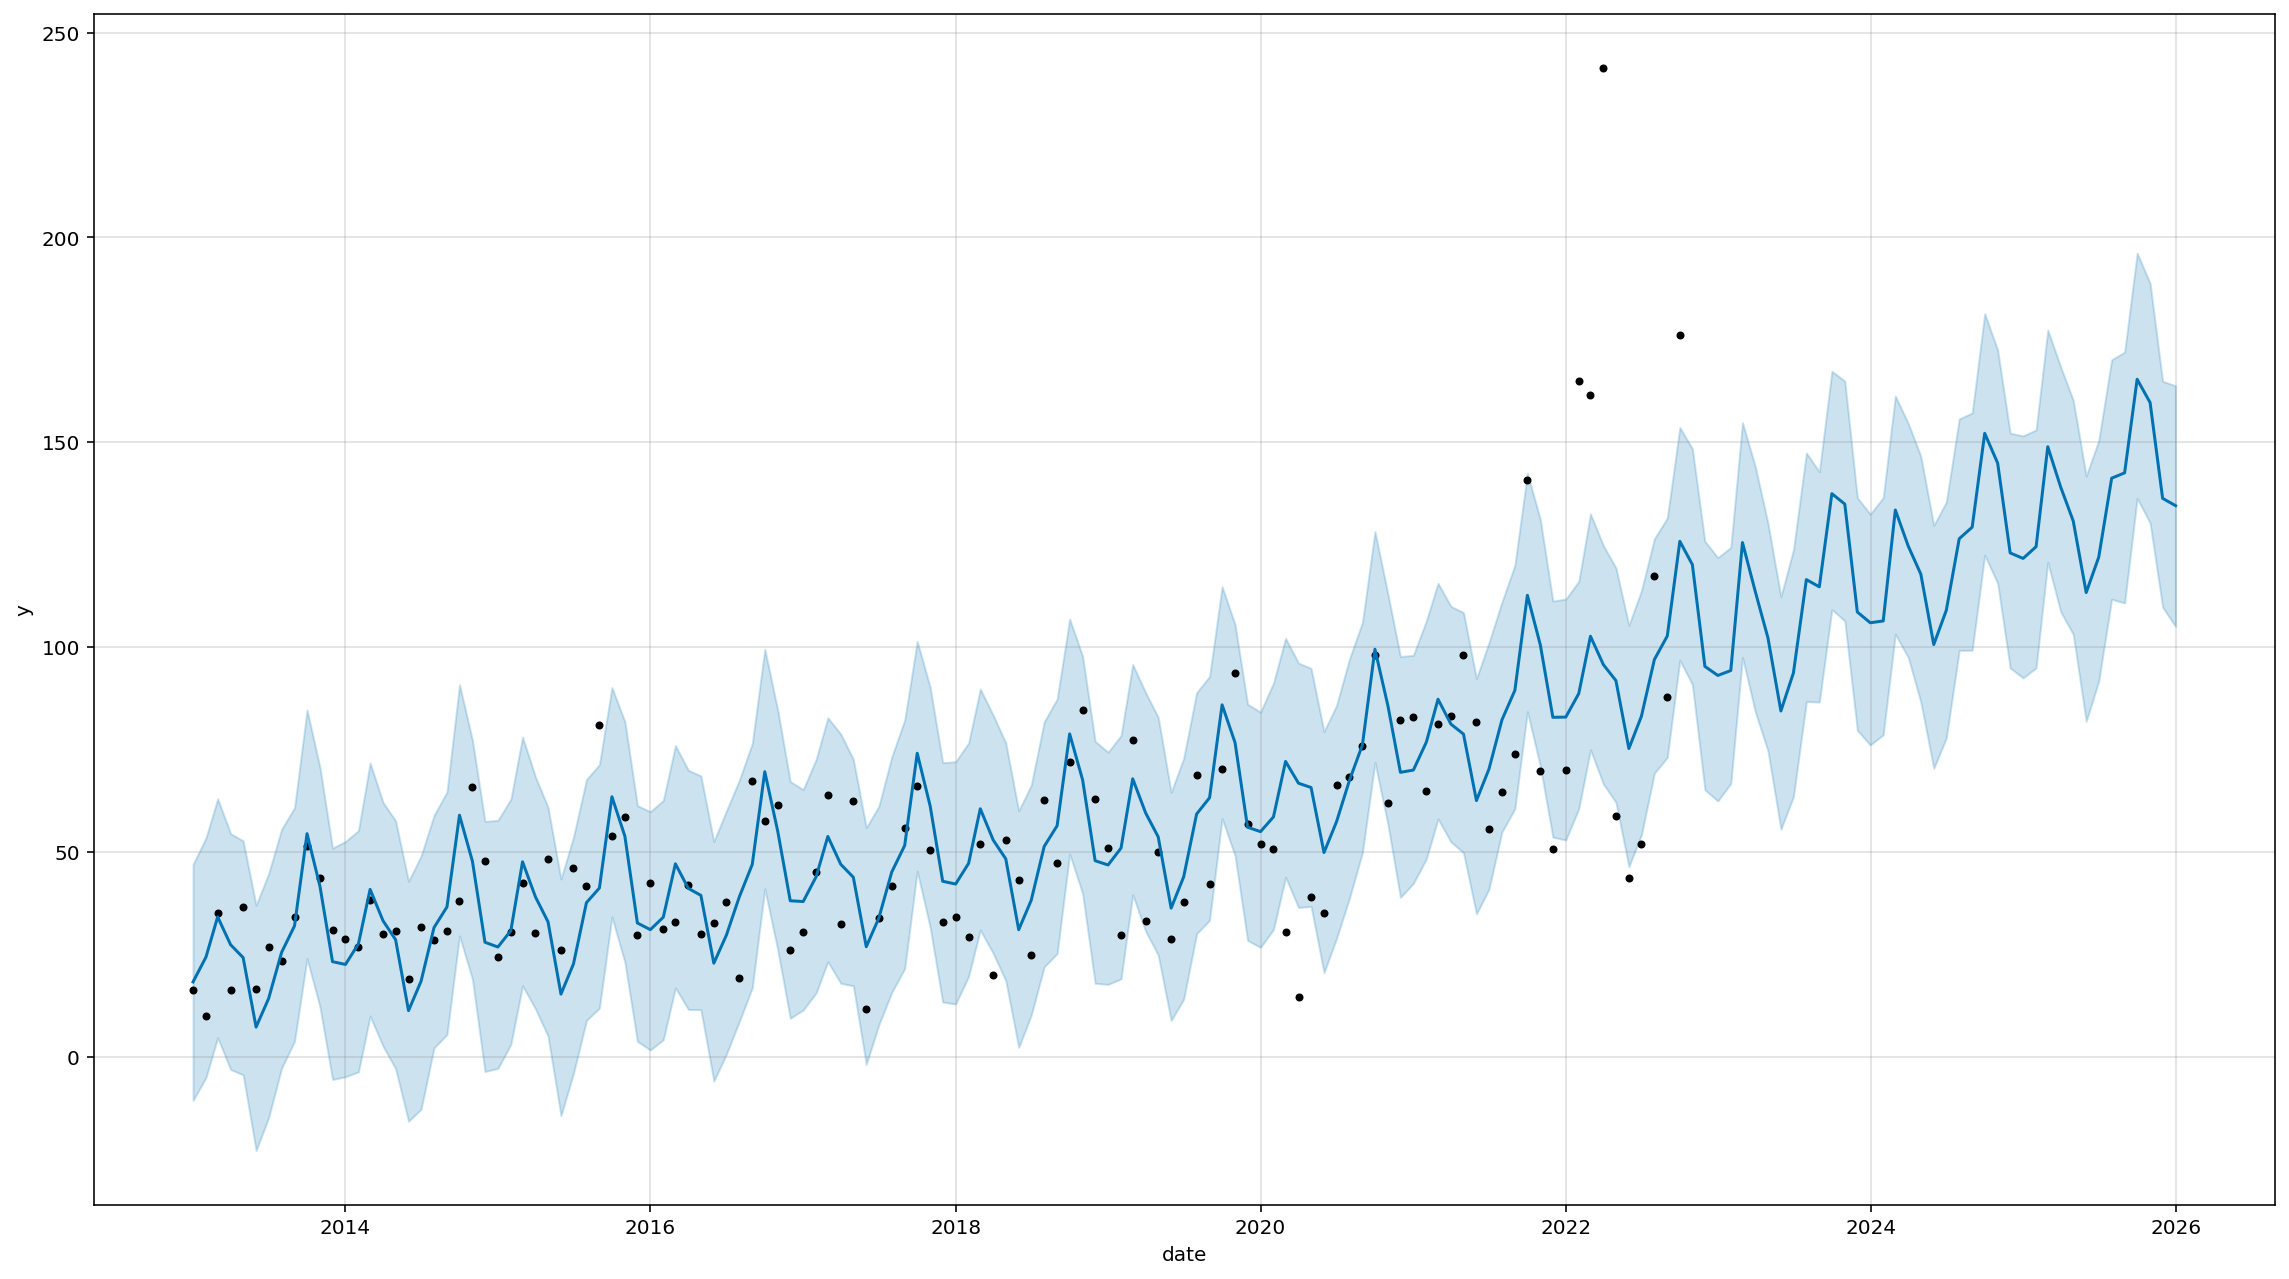

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

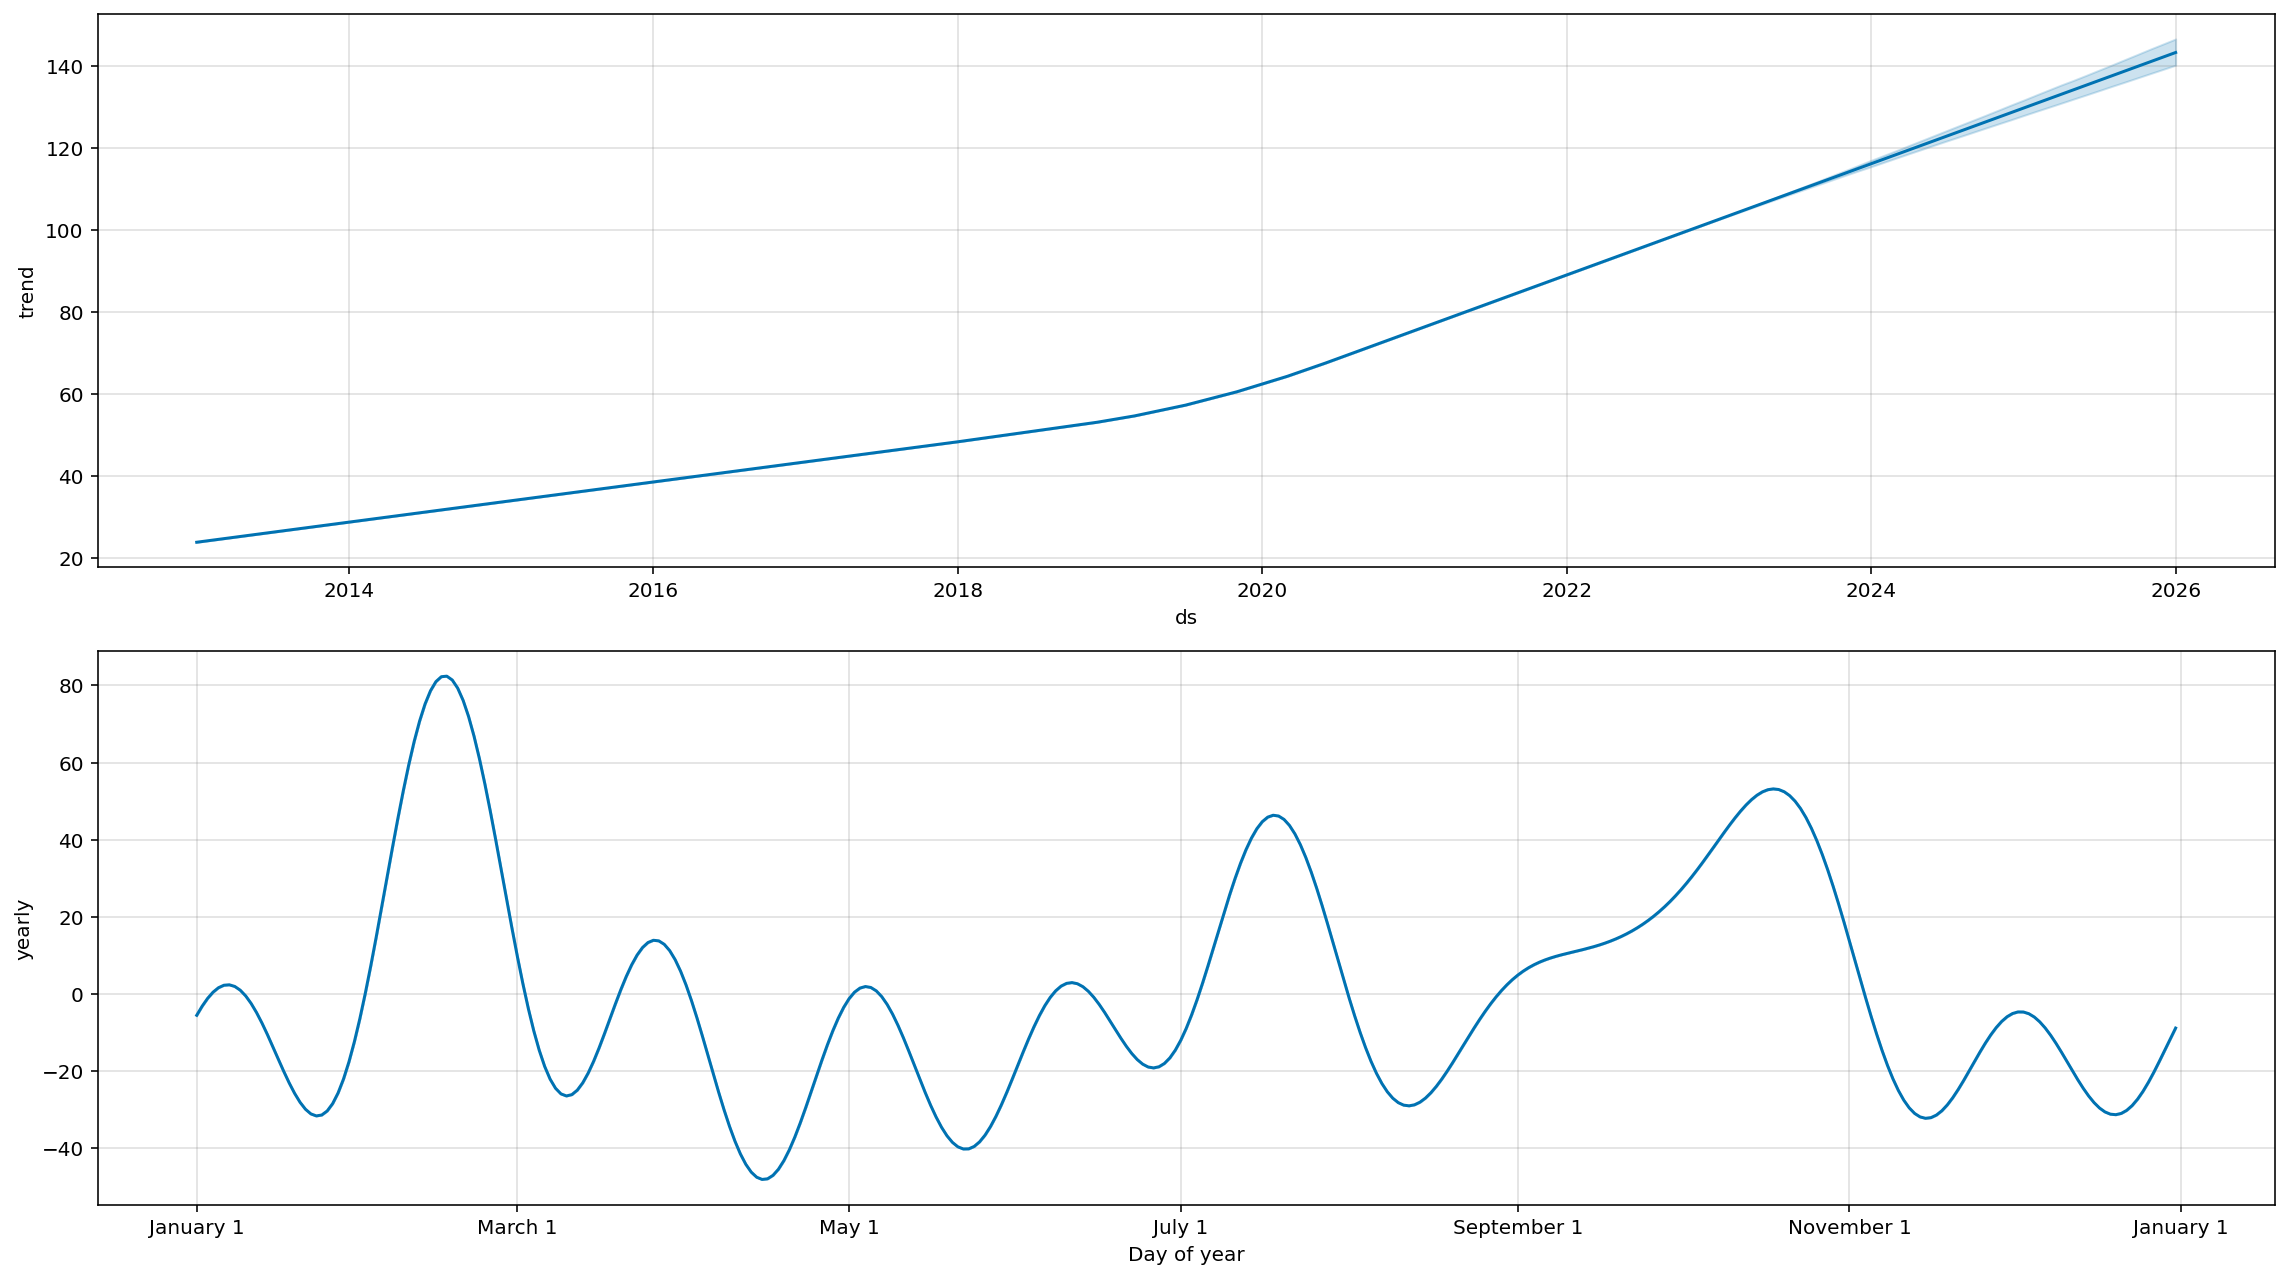

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

516.1337899631468

In [ ]:
RMSE = math.sqrt(mse)
RMSE

22.71857807969387

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

14.576703459160912

# Saudi

In [ ]:
data = pd.read_csv('export data saudi.csv')
data.head()

ปี  เดือน  มูลค่า(ล้านบาท)
0  2013      1            41.90
1  2013      2            31.31
2  2013      3            34.14
3  2013      4            19.92
4  2013      5            25.50

In [ ]:
data['วัน']= 1

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี  มูลค่า(ล้านบาท)
0    1      1  2013            41.90
1    1      2  2013            31.31
2    1      3  2013            34.14
3    1      4  2013            19.92
4    1      5  2013            25.50

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year  value(MBAHT)
0    1      1  2013         41.90
1    1      2  2013         31.31
2    1      3  2013         34.14
3    1      4  2013         19.92
4    1      5  2013         25.50

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date  value(MBAHT)
0 2013-01-01         41.90
1 2013-02-01         31.31
2 2013-03-01         34.14
3 2013-04-01         19.92
4 2013-05-01         25.50

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-162-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01         41.90
1 2013-02-01         31.31
2 2013-03-01         34.14
3 2013-04-01         19.92
4 2013-05-01         25.50

In [ ]:
t2.columns=['ds','y']
t2.head()

ds      y
0 2013-01-01  41.90
1 2013-02-01  31.31
2 2013-03-01  34.14
3 2013-04-01  19.92
4 2013-05-01  25.50

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2013-01-01  37.706920  -11.344056   61.464074    37.706920    37.706920   
1   2013-02-01  37.821889   -6.352309   66.261257    37.821889    37.821889   
2   2013-03-01  37.925731    0.553904   73.738432    37.925731    37.925731   
3   2013-04-01  38.040700   12.609768   84.252432    38.040700    38.040700   
4   2013-05-01  38.151960   19.794454   92.269087    38.151960    38.151960   
..         ...        ...         ...         ...          ...          ...   
152 2025-08-31  54.861306   10.610046   83.930472    54.861219    54.861398   
153 2025-09-30  54.972589   25.834462   97.613178    54.972497    54.972685   
154 2025-10-31  55.087581   19.293484   89.423585    55.087484    55.087682   
155 2025-11-30  55.198864   25.805774   98.378302    55.198761    55.198969   
156 2025-12-31  55.313857    5.085706   77.748890    55.313749    55.313966   

     additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0        -12.011079            -12.011079            -12.011079 -12.011079   
1         -8.782971             -8.782971             -8.782971  -8.782971   
2         -2.174276             -2.174276             -2.174276  -2.174276   
3         10.335413             10.335413             10.335413  10.335413   
4         17.946683             17.946683             17.946683  17.946683   
..              ...                   ...                   ...        ...   
152       -8.211146             -8.211146             -8.211146  -8.211146   
153        4.493257              4.493257              4.493257   4.493257   
154       -1.498181             -1.498181             -1.498181  -1.498181   
155        6.106831              6.106831              6.106831   6.106831   
156      -15.049242            -15.049242            -15.049242 -15.049242   

     yearly_lower  yearly_upper  multiplicative_terms  \
0      -12.011079    -12.011079                   0.0   
1       -8.782971     -8.782971                   0.0   
2       -2.174276     -2.174276                   0.0   
3       10.335413     10.335413                   0.0   
4       17.946683     17.946683                   0.0   
..            ...           ...                   ...   
152     -8.211146     -8.211146                   0.0   
153      4.493257      4.493257                   0.0   
154     -1.498181     -1.498181                   0.0   
155      6.106831      6.106831                   0.0   
156    -15.049242    -15.049242                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0  25.695841  
1                           0.0                         0.0  29.038918  
2                           0.0                         0.0  35.751455  
3                           0.0                         0.0  48.376113  
4                           0.0                         0.0  56.098642  
..                          ...                         ...        ...  
152                         0.0                         0.0  46.650160  
153                         0.0                         0.0  59.465846  
154                         0.0                         0.0  53.589401  
155                         0.0                         0.0  61.305695  
156                         0.0                         0.0  40.264615  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds       yhat  yhat_lower  yhat_upper
0   2013-01-01  25.695841  -11.344056   61.464074
1   2013-02-01  29.038918   -6.352309   66.261257
2   2013-03-01  35.751455    0.553904   73.738432
3   2013-04-01  48.376113   12.609768   84.252432
4   2013-05-01  56.098642   19.794454   92.269087
..         ...        ...         ...         ...
152 2025-08-31  46.650160   10.610046   83.930472
153 2025-09-30  59.465846   25.834462   97.613178
154 2025-10-31  53.589401   19.293484   89.423585
155 2025-11-30  61.305695   25.805774   98.378302
156 2025-12-31  40.264615    5.085706   77.748890

[157 rows x 4 columns]

In [ ]:
t2.head()

ds      y
0 2013-01-01  41.90
1 2013-02-01  31.31
2 2013-03-01  34.14
3 2013-04-01  19.92
4 2013-05-01  25.50

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds      y       yhat  yhat_lower  yhat_upper
0 2013-01-01  41.90  25.695841  -11.344056   61.464074
1 2013-02-01  31.31  29.038918   -6.352309   66.261257
2 2013-03-01  34.14  35.751455    0.553904   73.738432
3 2013-04-01  19.92  48.376113   12.609768   84.252432
4 2013-05-01  25.50  56.098642   19.794454   92.269087

In [ ]:
s.describe()

y        yhat  yhat_lower  yhat_upper
count  118.000000  118.000000  118.000000  118.000000
mean    44.294915   44.295389    7.582371   81.010898
std     31.676796   11.016365   11.161033   10.980843
min      3.580000   24.391616  -13.197238   59.553035
25%     23.597500   35.873556   -0.084082   72.064958
50%     38.910000   43.403524    6.571469   80.623612
75%     56.720000   52.704732   16.751843   89.627169
max    218.000000   68.655935   32.050123  104.277081

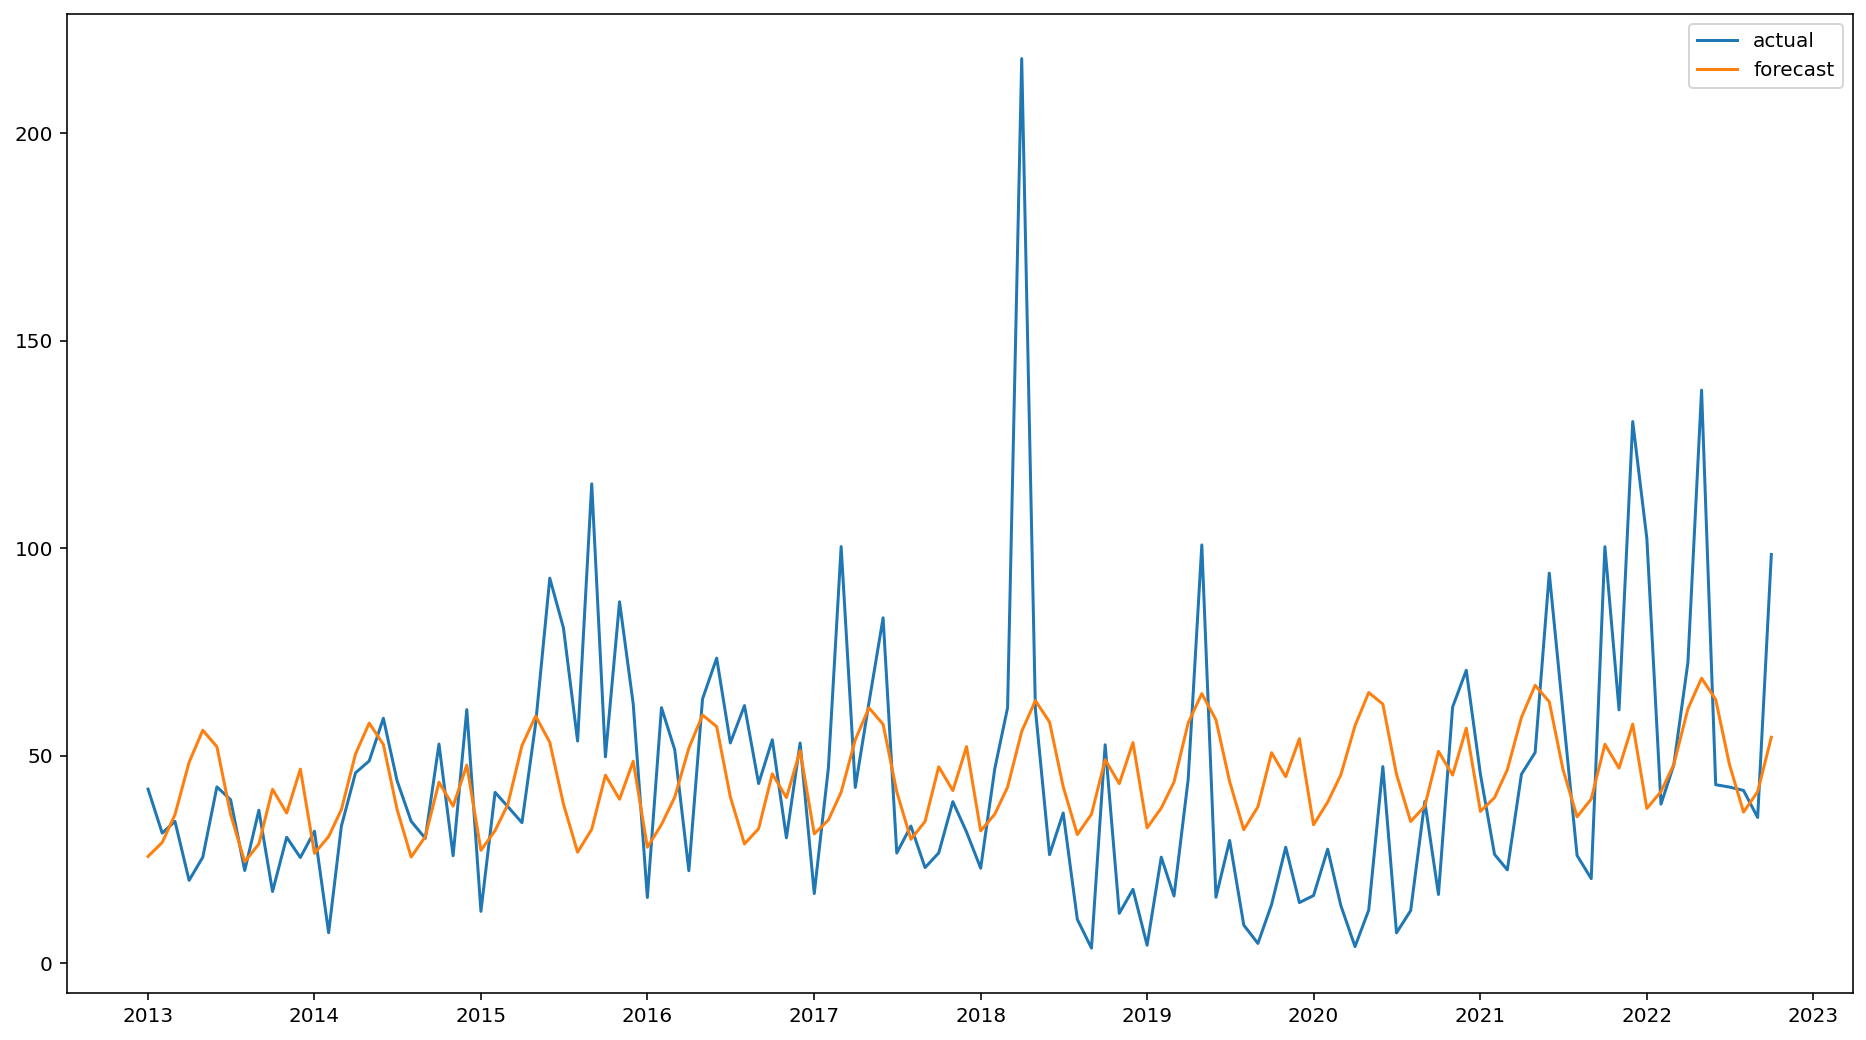

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.12143472901110464

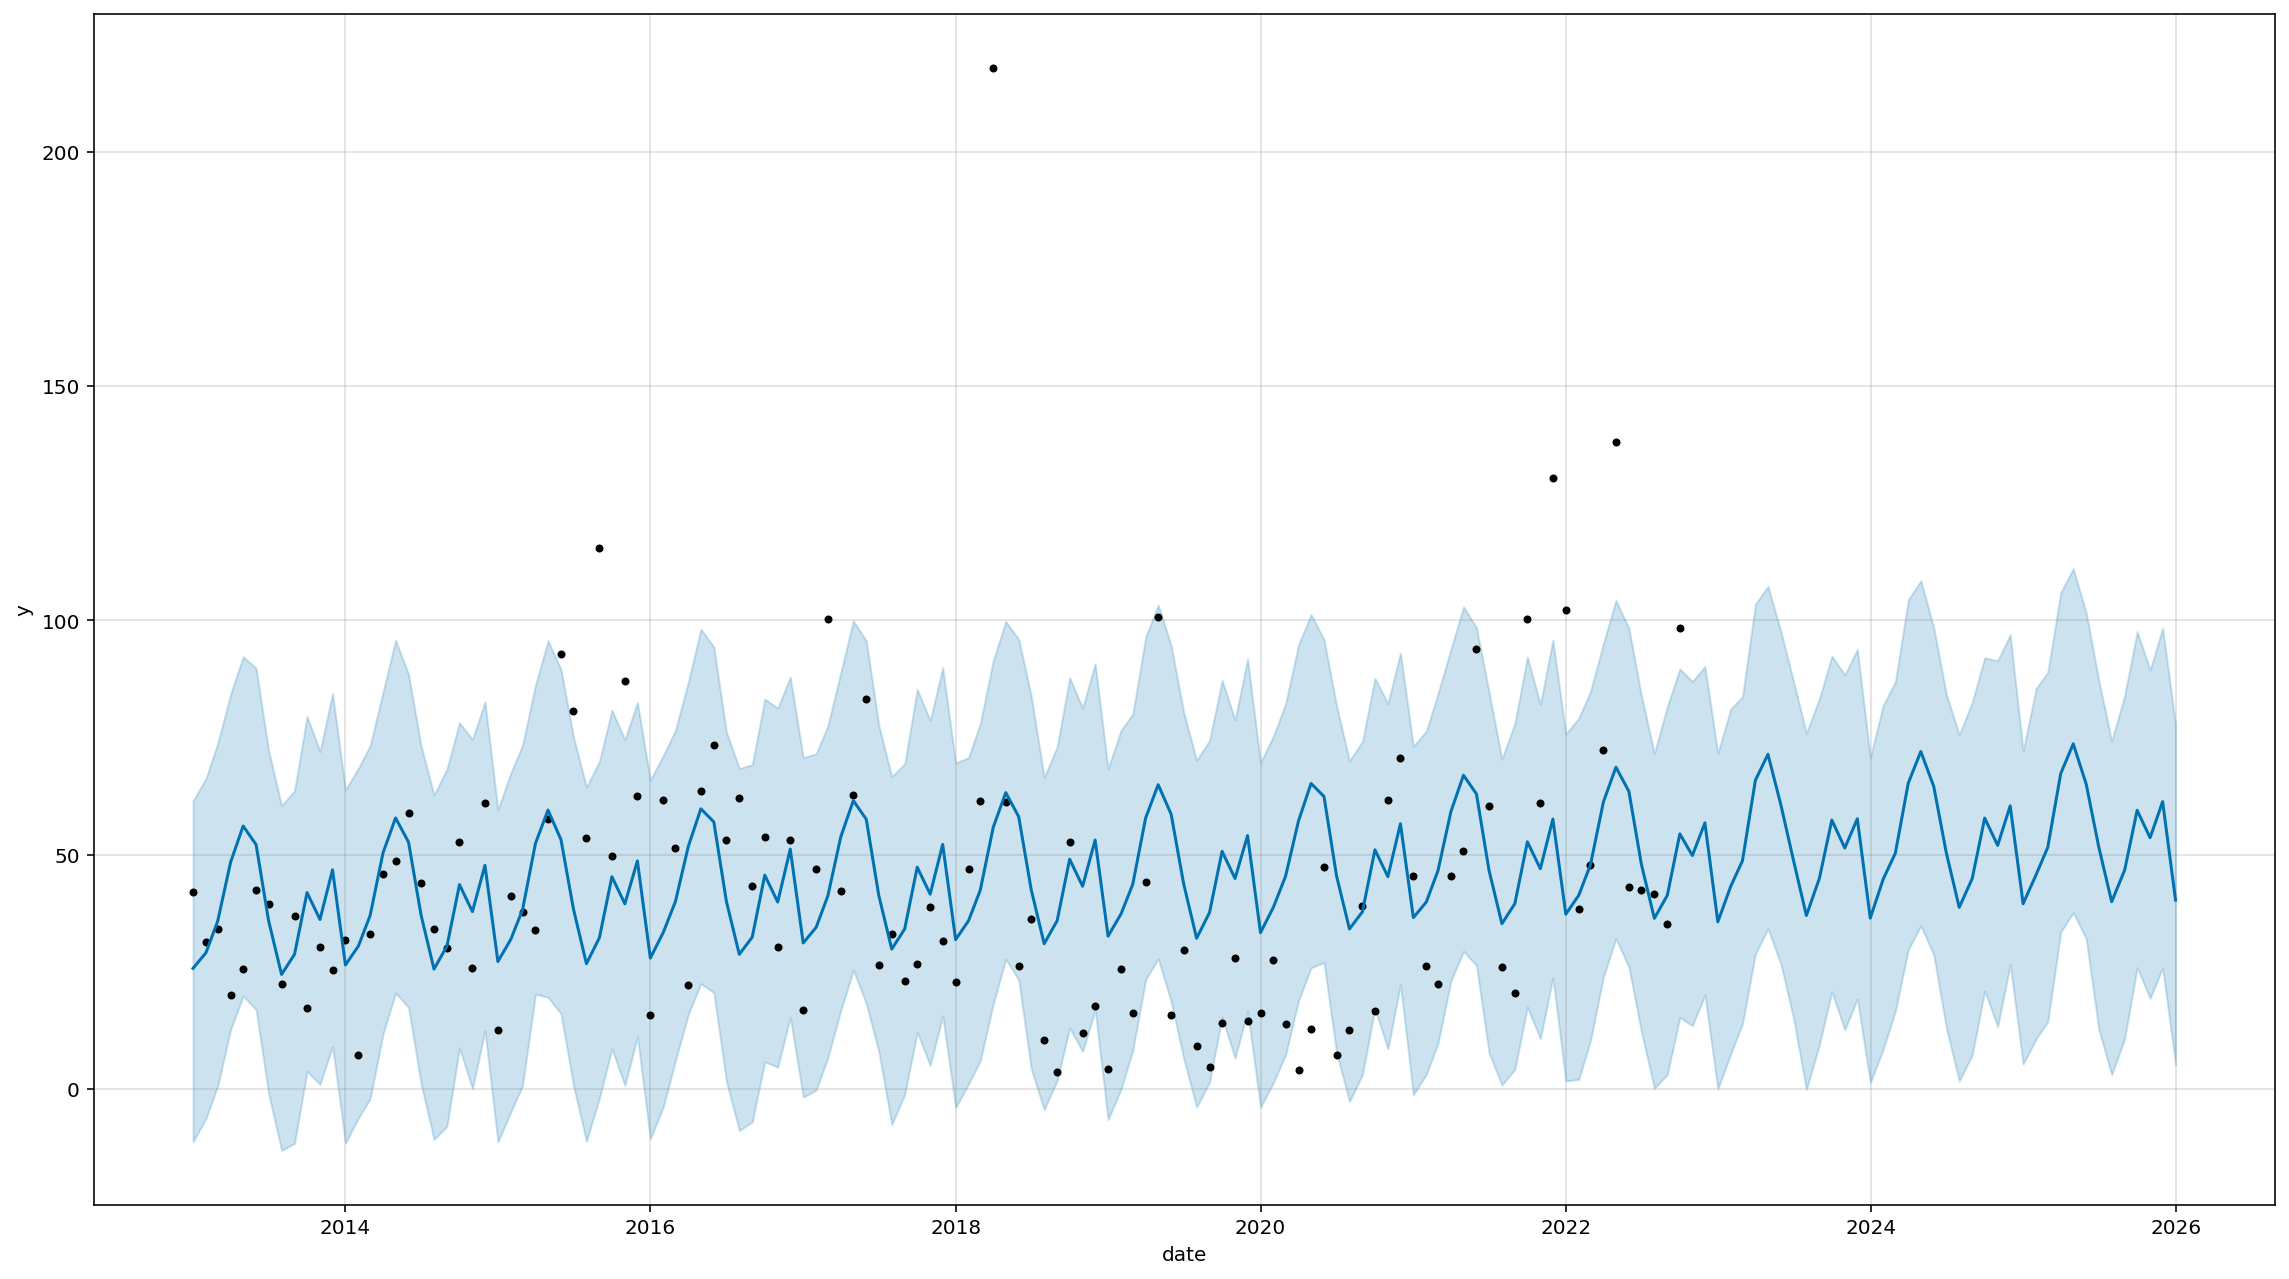

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

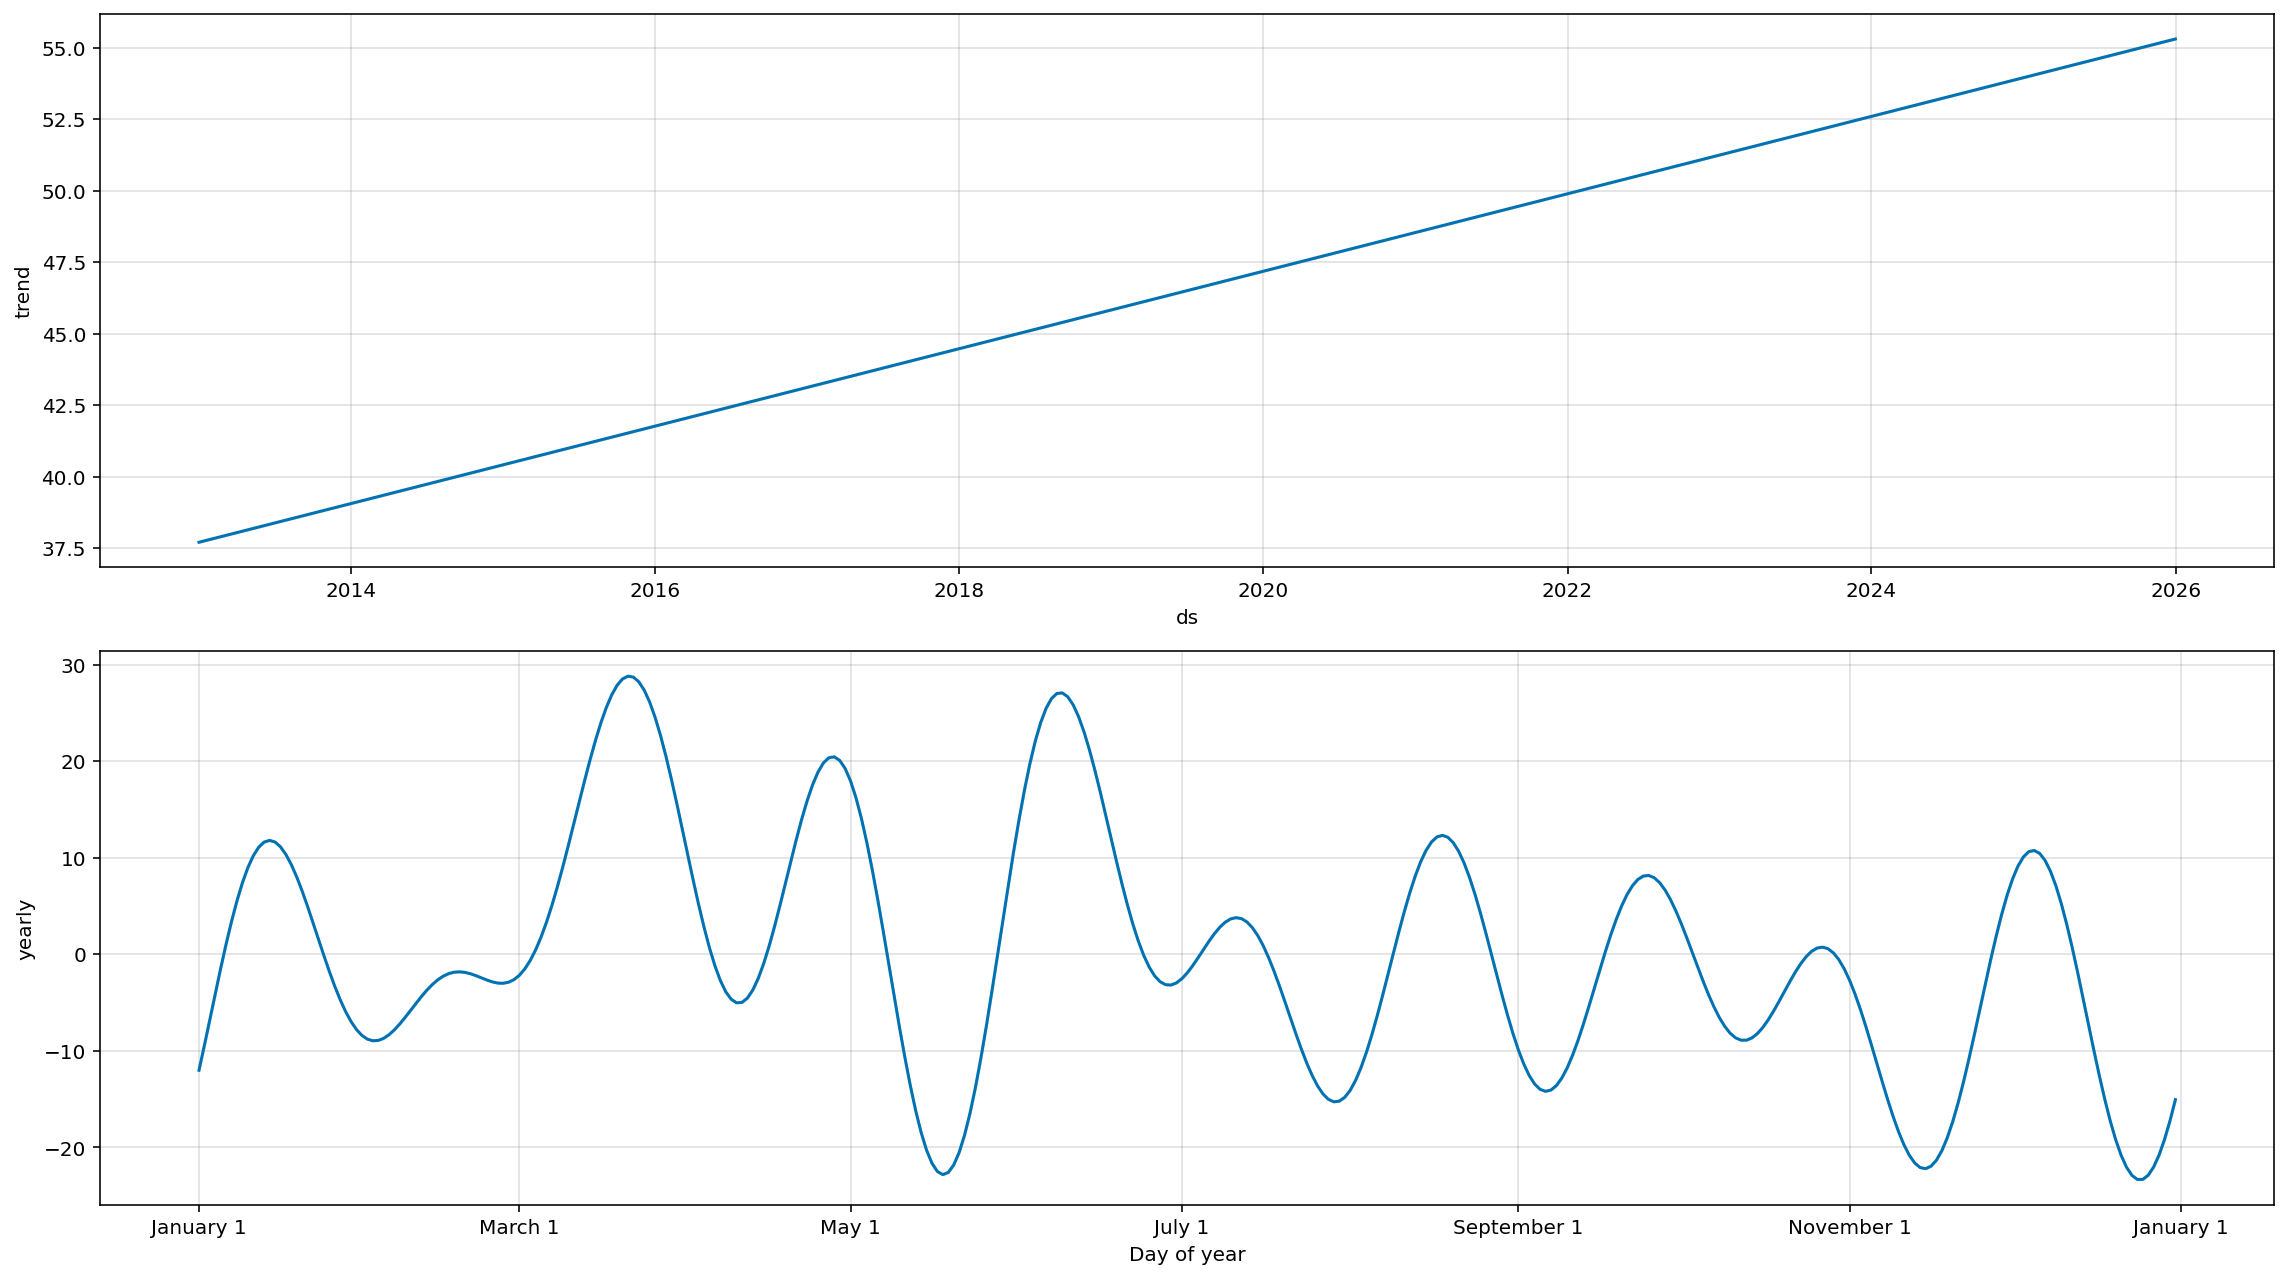

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

874.0985375578598

In [ ]:
RMSE = math.sqrt(mse)
RMSE

29.56515749252589

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

20.723201639467394

# South Africa

In [ ]:
data = pd.read_csv('export data south africa.csv')
data.head()

ปี  เดือน  มูลค่า(ล้านบาท)
0  2013      1             7.01
1  2013      2             7.23
2  2013      3            12.79
3  2013      4            14.02
4  2013      5            12.65

In [ ]:
data['วัน']= 1

In [ ]:
t1= data[['วัน','เดือน','ปี','มูลค่า(ล้านบาท)']]
t1.head()

วัน  เดือน    ปี  มูลค่า(ล้านบาท)
0    1      1  2013             7.01
1    1      2  2013             7.23
2    1      3  2013            12.79
3    1      4  2013            14.02
4    1      5  2013            12.65

In [ ]:
t1.rename(columns={'วัน' : 'day', 'เดือน' : 'month', 'ปี' : 'year', 'มูลค่า(ล้านบาท)' : 'value(MBAHT)'}, inplace=True)
t1.head()

day  month  year  value(MBAHT)
0    1      1  2013          7.01
1    1      2  2013          7.23
2    1      3  2013         12.79
3    1      4  2013         14.02
4    1      5  2013         12.65

In [ ]:
t1['date']=pd.to_datetime(t1[['year', 'month', 'day']])

In [ ]:
t2=t1[['date','value(MBAHT)']] 
t2.head()

date  value(MBAHT)
0 2013-01-01          7.01
1 2013-02-01          7.23
2 2013-03-01         12.79
3 2013-04-01         14.02
4 2013-05-01         12.65

In [ ]:
t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)
t2.head()

<ipython-input-187-b1a4d88f2650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['value(MBAHT)']=t2['value(MBAHT)'].replace('[,]','',regex=True).astype(float)


date  value(MBAHT)
0 2013-01-01          7.01
1 2013-02-01          7.23
2 2013-03-01         12.79
3 2013-04-01         14.02
4 2013-05-01         12.65

In [ ]:
t2.columns=['ds','y']
t2.head()

ds      y
0 2013-01-01   7.01
1 2013-02-01   7.23
2 2013-03-01  12.79
3 2013-04-01  14.02
4 2013-05-01  12.65

In [ ]:
t2.dropna(subset=['y'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
model = Prophet()
model.fit(t2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=39,freq='M')
future.head()

ds
0 2013-01-01
1 2013-02-01
2 2013-03-01
3 2013-04-01
4 2013-05-01

In [ ]:
future.tail()

ds
152 2025-08-31
153 2025-09-30
154 2025-10-31
155 2025-11-30
156 2025-12-31

In [ ]:
forecast=model.predict(future)
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2013-01-01  21.539624    1.399794   72.814704    21.539624    21.539624   
1   2013-02-01  21.443807    3.302243   79.813522    21.443807    21.443807   
2   2013-03-01  21.357263  -21.585316   52.201795    21.357263    21.357263   
3   2013-04-01  21.261446  -17.556882   55.042321    21.261446    21.261446   
4   2013-05-01  21.168720  -17.483455   56.447193    21.168720    21.168720   
..         ...        ...         ...         ...          ...          ...   
152 2025-08-31   5.691596  -32.989313   41.032244     5.645923     5.736715   
153 2025-09-30   5.587158  -36.602088   38.889929     5.539885     5.634077   
154 2025-10-31   5.479238  -33.672809   38.993666     5.429943     5.528315   
155 2025-11-30   5.374799  -35.329391   39.100369     5.323577     5.425578   
156 2025-12-31   5.266879  -14.087333   61.779789     5.213853     5.320191   

     additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0         15.232556             15.232556             15.232556  15.232556   
1         19.326880             19.326880             19.326880  19.326880   
2         -5.786586             -5.786586             -5.786586  -5.786586   
3         -3.484643             -3.484643             -3.484643  -3.484643   
4         -2.685901             -2.685901             -2.685901  -2.685901   
..              ...                   ...                   ...        ...   
152       -0.712520             -0.712520             -0.712520  -0.712520   
153       -3.066257             -3.066257             -3.066257  -3.066257   
154       -3.381389             -3.381389             -3.381389  -3.381389   
155       -3.788656             -3.788656             -3.788656  -3.788656   
156       18.529304             18.529304             18.529304  18.529304   

     yearly_lower  yearly_upper  multiplicative_terms  \
0       15.232556     15.232556                   0.0   
1       19.326880     19.326880                   0.0   
2       -5.786586     -5.786586                   0.0   
3       -3.484643     -3.484643                   0.0   
4       -2.685901     -2.685901                   0.0   
..            ...           ...                   ...   
152     -0.712520     -0.712520                   0.0   
153     -3.066257     -3.066257                   0.0   
154     -3.381389     -3.381389                   0.0   
155     -3.788656     -3.788656                   0.0   
156     18.529304     18.529304                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0  36.772180  
1                           0.0                         0.0  40.770687  
2                           0.0                         0.0  15.570677  
3                           0.0                         0.0  17.776803  
4                           0.0                         0.0  18.482819  
..                          ...                         ...        ...  
152                         0.0                         0.0   4.979076  
153                         0.0                         0.0   2.520900  
154                         0.0                         0.0   2.097849  
155                         0.0                         0.0   1.586143  
156                         0.0                         0.0  23.796183  

[157 rows x 16 columns]

In [ ]:
t2f=forecast[['ds','yhat','yhat_lower','yhat_upper']]
t2f

ds       yhat  yhat_lower  yhat_upper
0   2013-01-01  36.772180    1.399794   72.814704
1   2013-02-01  40.770687    3.302243   79.813522
2   2013-03-01  15.570677  -21.585316   52.201795
3   2013-04-01  17.776803  -17.556882   55.042321
4   2013-05-01  18.482819  -17.483455   56.447193
..         ...        ...         ...         ...
152 2025-08-31   4.979076  -32.989313   41.032244
153 2025-09-30   2.520900  -36.602088   38.889929
154 2025-10-31   2.097849  -33.672809   38.993666
155 2025-11-30   1.586143  -35.329391   39.100369
156 2025-12-31  23.796183  -14.087333   61.779789

[157 rows x 4 columns]

In [ ]:
t2.head()

ds      y
0 2013-01-01   7.01
1 2013-02-01   7.23
2 2013-03-01  12.79
3 2013-04-01  14.02
4 2013-05-01  12.65

In [ ]:
s=pd.merge(t2,t2f, left_on='ds', right_on='ds')
s.head()

ds      y       yhat  yhat_lower  yhat_upper
0 2013-01-01   7.01  36.772180    1.399794   72.814704
1 2013-02-01   7.23  40.770687    3.302243   79.813522
2 2013-03-01  12.79  15.570677  -21.585316   52.201795
3 2013-04-01  14.02  17.776803  -17.556882   55.042321
4 2013-05-01  12.65  18.482819  -17.483455   56.447193

In [ ]:
s.describe()

y        yhat  yhat_lower  yhat_upper
count  118.000000  118.000000  118.000000  118.000000
mean    15.585339   15.556320  -21.311431   52.500895
std     30.290036    9.089466    9.551552    9.205505
min      0.570000    4.028617  -34.448421   38.702513
25%      6.535000    9.483167  -27.861565   46.359917
50%     11.020000   13.183821  -24.062916   50.289129
75%     14.147500   17.167721  -19.128107   54.161103
max    268.560000   40.770687    4.344254   79.813522

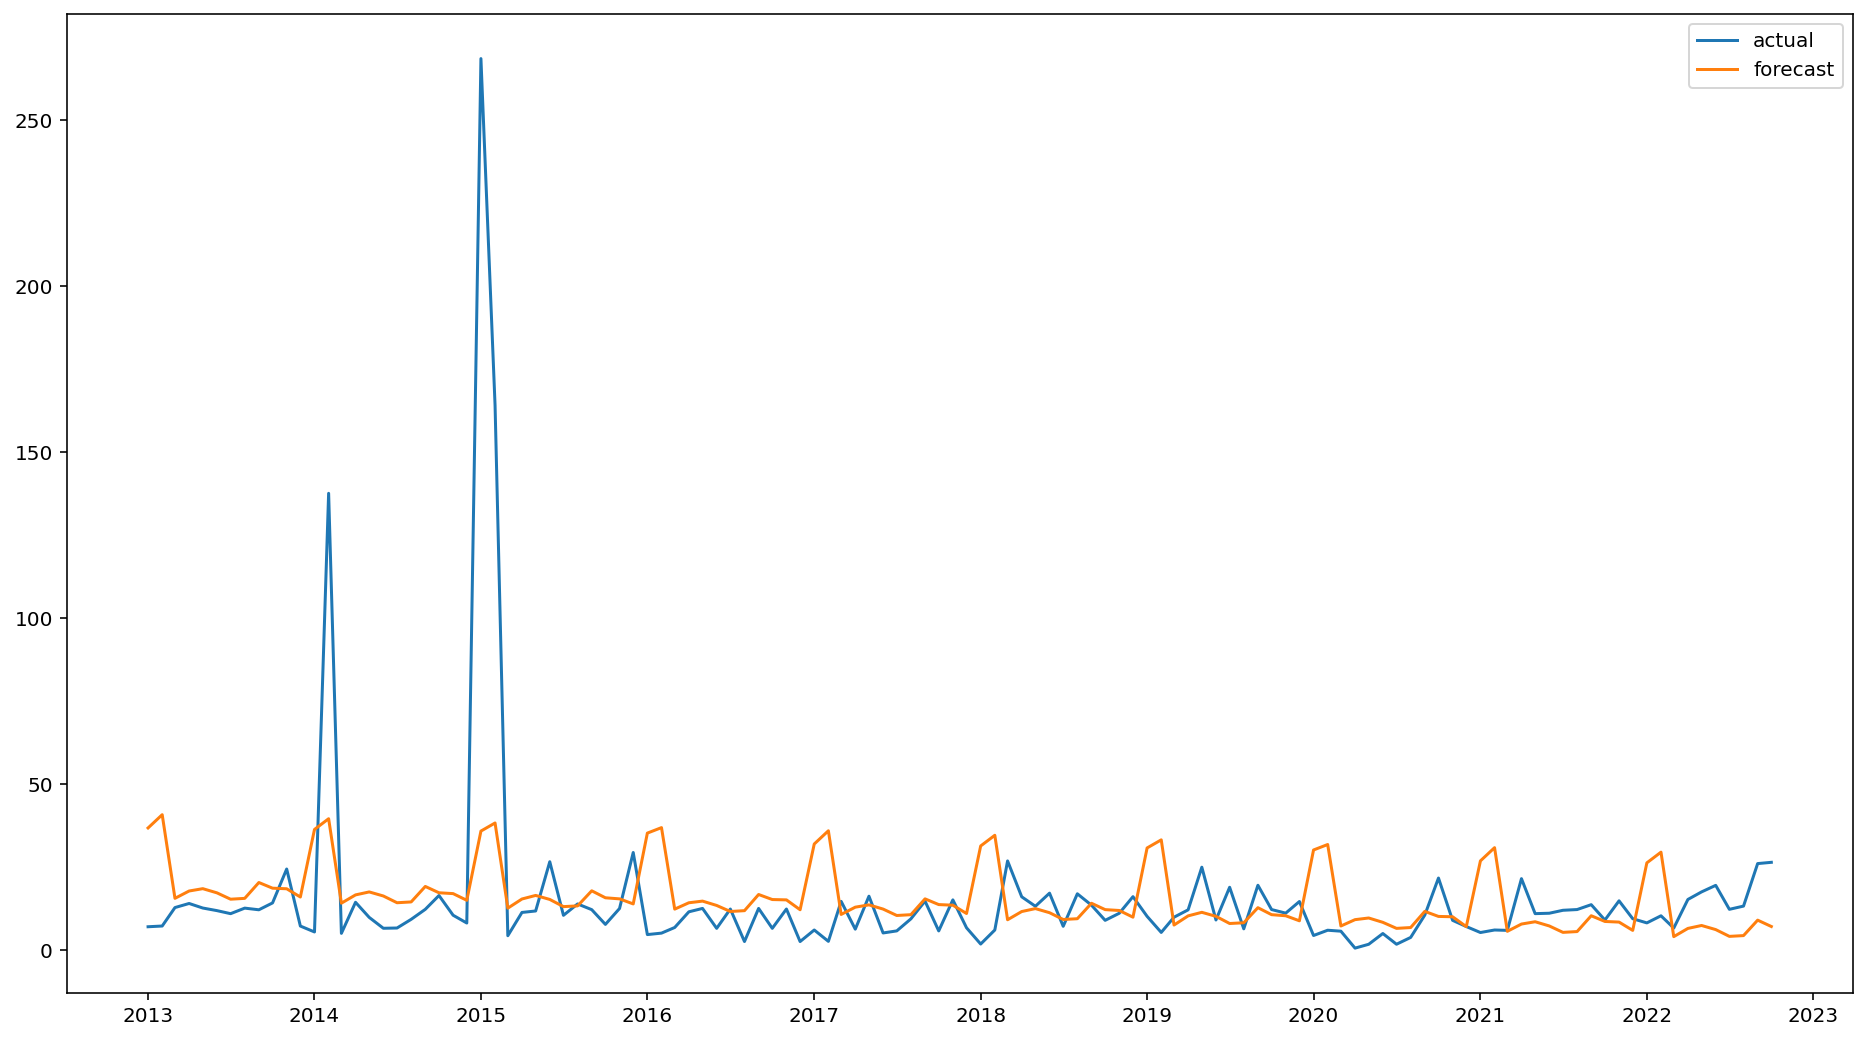

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(s['ds'],s['y'], label='actual')
plt.plot(s['ds'],s['yhat'], label='forecast')

plt.legend();

In [ ]:
from sklearn.metrics import r2_score

r2_score(s['y'].values,s['yhat'].values)

0.09652762104397428

In [ ]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date')

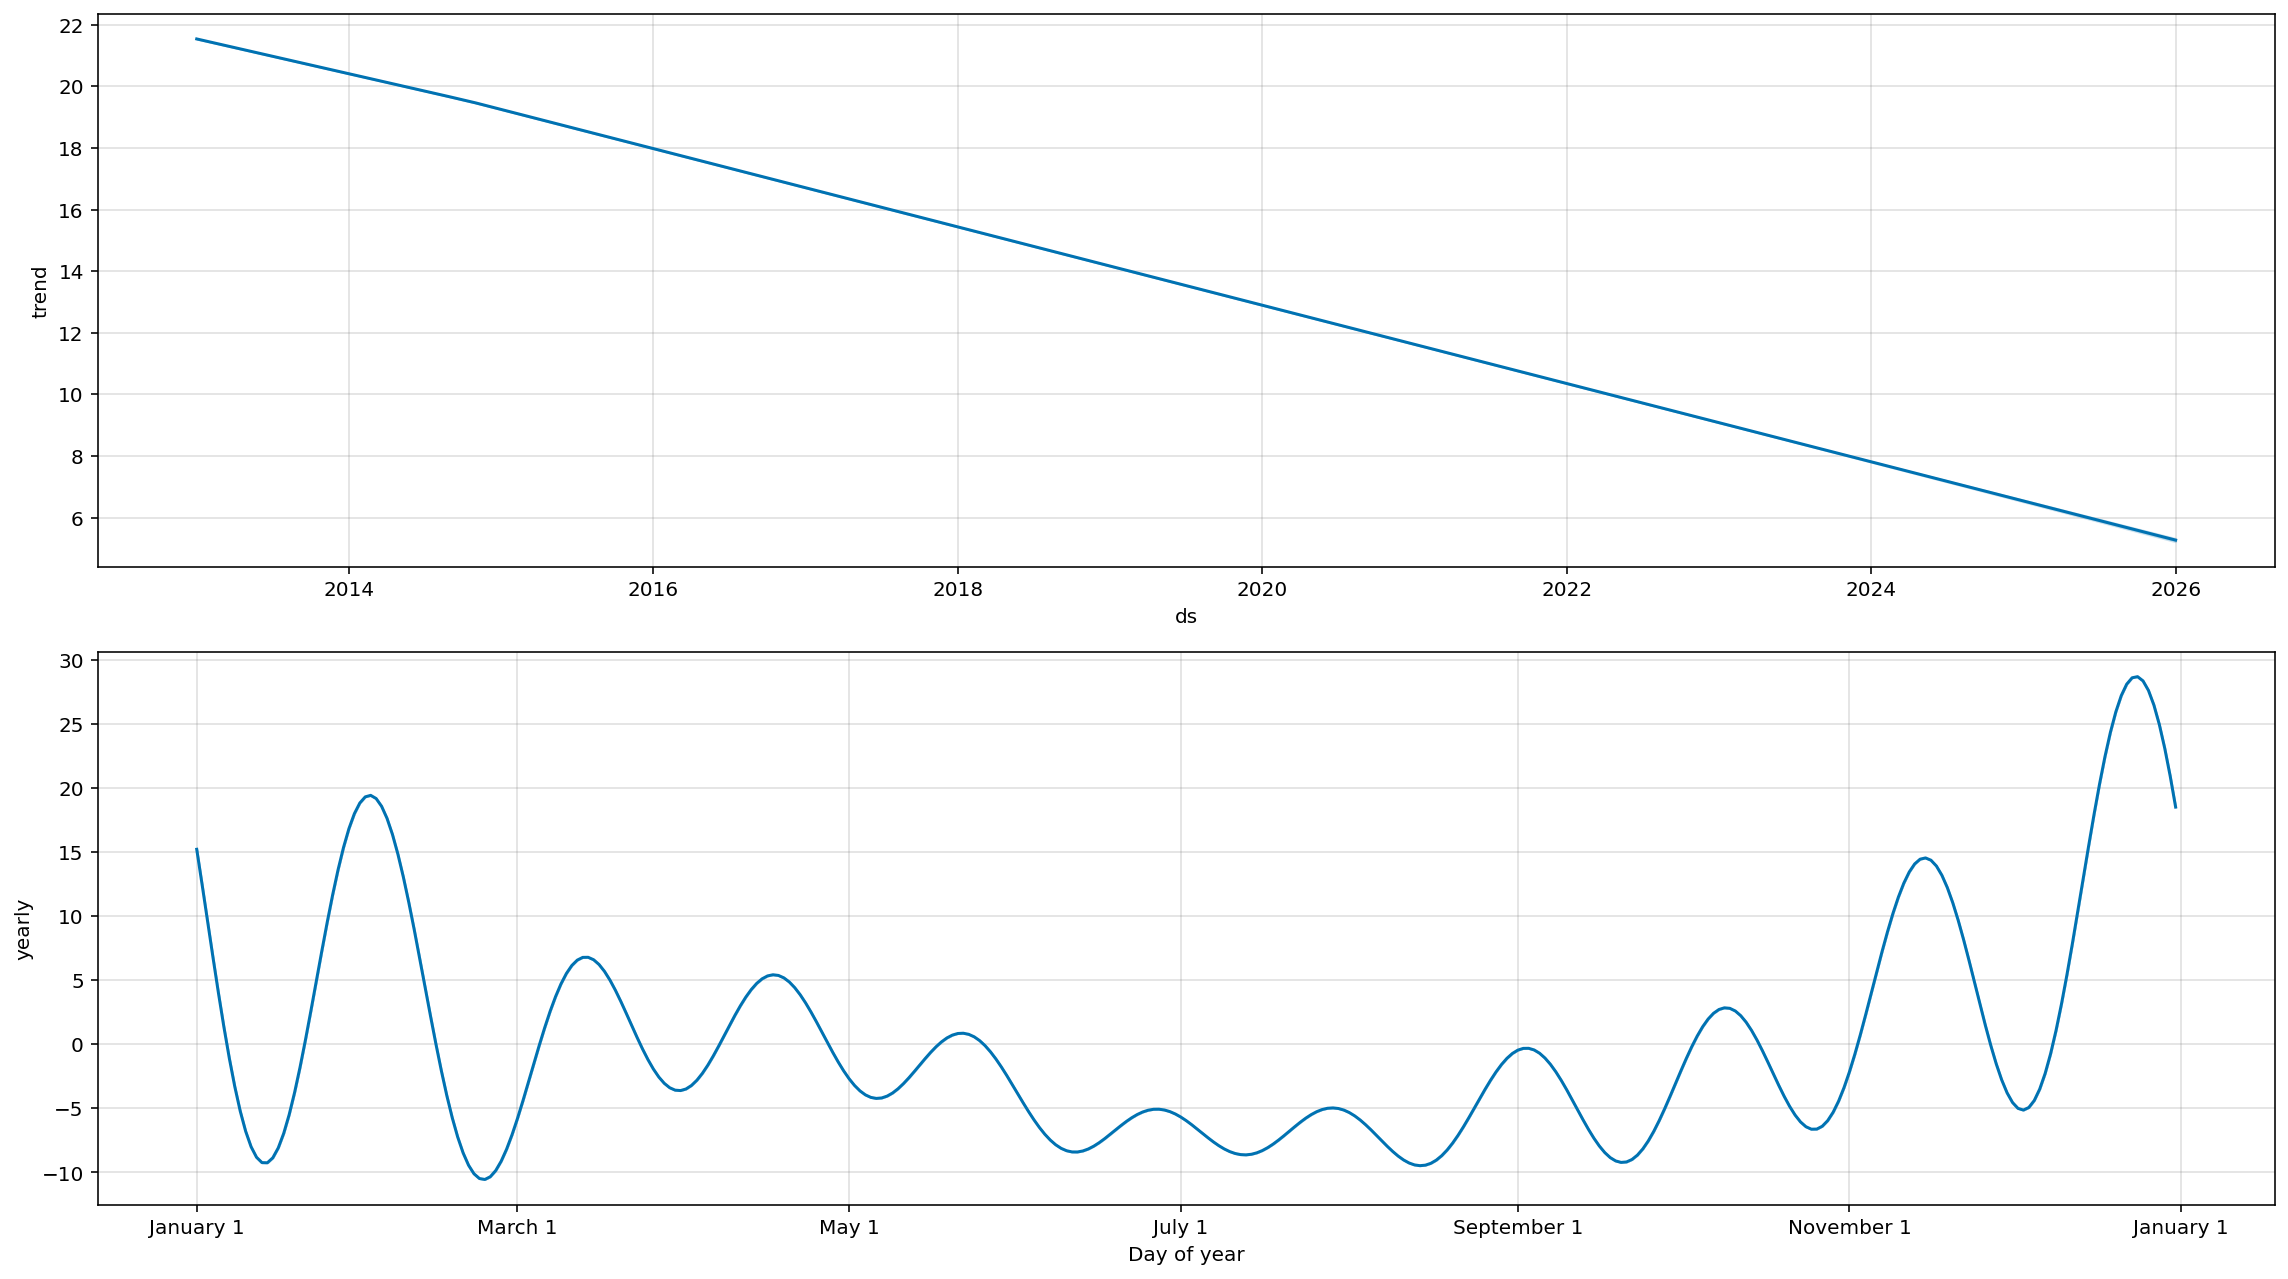

In [ ]:
fig=model.plot_components(forecast, figsize=(16, 9))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
mse =mean_squared_error(s['y'].values,s['yhat'].values)
mse

821.8987348135653

In [ ]:
RMSE = math.sqrt(mse)
RMSE

28.668776304780874

In [ ]:
mean_absolute_error(s['y'].values,s['yhat'].values)

12.37559504141105